<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/Again_Training_Exp04_200Epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README.MD
* Try Again, Fin...Fin...Fin...!!
* back to Original Kingma's VAE to Malimg
    * optimizer learning rate: 1e-3
    * optimizer params: sum
* Add 
    * plot train, test loss
        * save it every Epochs
    * plot latent vector per 10 Epoch
        * save it every 10 Epoch
    * save model's state dict per 10 Epoch
    * save latent vector per 10 Epoch

* ✅ Check Point
    * Just try it again...!
    * last exp result is not so good.
        * I think it is the limitation of linear combination...
    * Train again to get some results
    
* Final Trial
    * Train 200 Epoch
    * Keep Saving & Training
## Reference
* Reference repository: https://github.com/pytorch/examples/tree/master/vae

* Reference for Visualization: https://github.com/tayden/VAE-Latent-Space-Explorer/blob/master/scripts/VAE.ipynb


In [1]:
! nvidia-smi

Sat Jul  4 05:50:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# drive mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd drive/My\ Drive/InfoSec_Summer_part2
! pwd

/content/drive/My Drive/InfoSec_Summer_part2
/content/drive/My Drive/InfoSec_Summer_part2


## 01. Import Library

In [5]:
from PIL import Image
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
 
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
import seaborn as sns

# save single numpy array
# https://numpy.org/doc/stable/reference/generated/numpy.save.html#numpy.save
from tempfile import TemporaryFile
from sklearn.manifold import TSNE

import torch
import torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 02. Data Preprocessing
* Load dataset
* preprocess it
    * transforms
    * make custom dataset
    * train_test split: <code>torch.utils.data.random_split</code>
    * train_test_loader

### Work Flow
* transforms module 사용해서 image data compose 하기
    * size 조정, normalize, tensor 변환
* ImageFolder를 이용해 dataload
* dataset split: train dataset, test dataset
* DataLoader로 batch단위 dataset 불러오기

In [6]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),                # Change size of Image to (224, 224)
                                transforms.Grayscale(num_output_channels=1),  # Makes it 1-dimension channel
                                transforms.ToTensor(),                        # Convert a PIL Image or numpy.ndarray to tensor.
                                                                              # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
                                                                              # In the other cases, tensors are returned without scaling.
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                
                                ])

# make custom dataset
trainset = torchvision.datasets.ImageFolder(root='../InformationSecurity_Summer/malimg',
                                            transform=transforms)  # make custom dataset

In [7]:
trainset

Dataset ImageFolder
    Number of datapoints: 9339
    Root location: ../InformationSecurity_Summer/malimg
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [8]:
# classes = trainset.classes
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [9]:
full_dataset = trainset
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
print(train_size, test_size)

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

7471 1868


In [10]:
'''
for idx, (data, _) in enumerate(test_dataset):
    if idx == 5: 
        break
    else:
        print(data, _)
'''

'\nfor idx, (data, _) in enumerate(test_dataset):\n    if idx == 5: \n        break\n    else:\n        print(data, _)\n'

In [11]:
train_loader = DataLoader(train_dataset,
                         batch_size=16,
                         shuffle=True,
                         pin_memory=True) 
test_loader = DataLoader(test_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)  # Instead, we recommend using automatic memory pinning (i.e., setting pin_memory=True)
                                          #  which enables fast data transfer to CUDA-enabled GPUs

# First, insert all test dataset
# test_loader_10: testloader for latent vector visualization
test_loader_10 = DataLoader(test_dataset,
                        batch_size=1868,
                        shuffle=True,
                        pin_memory=True)

In [12]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Convert (C, W, H) to (W, H, C)

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)  # transposed shape 

In [13]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)

tensor([23,  9,  2, 22, 24, 22,  1,  2,  3, 11, 11,  3,  3,  2,  8, 13])


torch.Size([16, 1, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 1, 224, 224])
torch.Size([3, 454, 1810])
Wintrim.BX Dontovo.A Allaple.A VB.AT Yuner.A VB.AT Agent.FYI Allaple.A Allaple.L Instantaccess Instantaccess Allaple.L Allaple.L Allaple.A Dialplatform.B Lolyda.AA2 


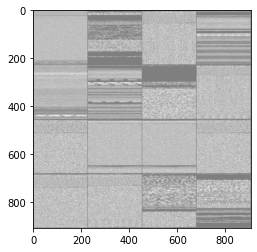

In [14]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

## 03. Define VAE Class
* Initialize
    * (224, 224) input 이미지를 통해 1차원 100개의 latent vector를 생성하는 Encoder네트워크 정의
    * 100개의 latent vector로부터 X_hat을 복원하는 Decoder Network 정의
* encode
* reparameterize
* decode
* forward

In [15]:
device = torch.device("cuda")  # device = torch.device("cuda")

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(224*224, 1000)
        self.fc21 = nn.Linear(1000, 100)
        self.fc22 = nn.Linear(1000, 100)
        self.fc3 = nn.Linear(100, 1000)
        self.fc4 = nn.Linear(1000, 224*224)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))
# loss값이 안줄면 sigmoid함수를 제거하고 BCE with Logits Loss를 사용해볼까?
# https://nuguziii.github.io/dev/dev-002/

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 224*224))
        z = self.reparameterize(mu, logvar)  # z's shape => (batch_size, 100)
        return self.decode(z), mu, logvar, z

In [16]:
model = VAE().to(device)
print(model)

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)


In [17]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [18]:
get_n_params(model)  

100704376

*Note*<br>
1-milion params.... it is so huge...

In [19]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [20]:
# track and save train, test loss through Dictionary
# 
Epoch_Loss = {'train_epoch':[],
              'train_loss':[],
              'test_epoch':[],
              'test_loss':[]}

# Save & Loading Model for Inference
# Reference: https://pytorch.org/tutorials/beginner/saving_loading_models.html

# PATH = '/Again_original_Exp01_200-Epoch.pth'

PATH = 'Epochs.pth'
# latent_vector = np.zeros((16, 100))
color_palette = np.zeros((1868))


In [21]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 224*224), reduction='sum')  # (input, target, ... reduction)

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

def train(epoch):
    model.train()
    train_loss = 0
    # latent_vector = np.zeros(())
    # latent_label = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar, z= model(data)
    
       
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    
    Epoch_Loss['train_epoch'].append(epoch)
    Epoch_Loss['train_loss'].append(train_loss / len(train_loader.dataset))
   
def test(epoch):
    # 10 Epoch 단위로 작업
    # model.state_dict() 저장 및 latent_vector 저장
    # plot latent vector
    if epoch % 10 == 0:  # Epoch이 10의 배수일때
     # save model.state_dict() per 10 Epochs
        torch.save(model.state_dict(), ('./Exp04_results/model_save_' + str(epoch) + PATH))  # Epoch 단위 parameter 저장

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for i, (data, _) in enumerate(test_loader):
                data = data.to(device)
                recon_batch, mu, logvar, z = model(data)
                # z vector는 torch type
                # latent_vector = z.detach().cpu().clone().numpy()
                test_loss += loss_function(recon_batch, data, mu, logvar).item()
                if i == 0:
                    n = min(data.size(0), 8)
                    comparison = torch.cat([data[:n],
                                        recon_batch.view(16, 1, 224, 224)[:n]])
                    save_image(comparison.cpu(),
                            './Exp04_results/recon_sampling/reconstruction_' + str(epoch) + '.png', nrow=n)
        test_loss /= len(test_loader.dataset)
        print('====> Test set loss: {:.4f}'.format(test_loss))
        Epoch_Loss['test_epoch'].append(epoch)
        Epoch_Loss['test_loss'].append(test_loss)

        # save latent vector's every 10 Epoch's
        # load_whole test_data 
        for i, (data, _) in enumerate(test_loader_10):  # load_whole test_data
            data = data.to(device)
            recon_batch, mu, logvar, z = model(data)
        # save latent_vector per 10 Epochs
            latent_vector = z.detach().cpu().clone().numpy()  # change tensor type data to cpu().numpy()
                                                              # latent_vector_size: (num_of_data, 100)
            color_palette = _.detach().cpu().clone().numpy()
            with open(('./Exp04_results/'+str(epoch)+'Epoch_z_vector.npy'), 'wb') as f:
                np.save(f, latent_vector)  # but latent vector size is (16, 100).... just 16...
                                           # 10 Epoch 단위로 latent vector를 저장한다
                                           # 이 떄, latent vector의 size는 test_dataset의 크기가 되어야 한다
                                           # 결과값이 좋은 vector는 좋은 feature로 사용할 수 있다.
        # plot latent vector Every 10 Epochs
        # t-SNE for Dimensionality reduction
        Z_embedded = TSNE(n_components=2).fit_transform(latent_vector)
        
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # setup the plot

        x = Z_embedded[:, 0]
        y = Z_embedded[:, 1]
        label = color_palette
        # label[10:12] = 0  # make sure there are some 0 values to show up as grey
        print("=="*20, "params", "=="*20)
        print("Z_embedded.shape:", Z_embedded.shape)
        print("label.shape:", label.shape)
        # tsne_data = np.vstack((Z_embedded, label))
        tsne_data = np.c_[Z_embedded, label]
        tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
        sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
        plt.savefig('./Exp04_results/plot_latent_vector/' + str(epoch) + '_t_SNE.png', dpi=300)
        plt.show()

    elif epoch % 10 !=0:
        model.eval()
        test_loss = 0
        with torch.no_grad():
            for i, (data, _) in enumerate(test_loader):
                data = data.to(device)
                recon_batch, mu, logvar, z = model(data)
                # z vector는 torch type
                # latent_vector = z.detach().cpu().clone().numpy()
                test_loss += loss_function(recon_batch, data, mu, logvar).item()
                if i == 0:
                    n = min(data.size(0), 8)
                    comparison = torch.cat([data[:n],
                                        recon_batch.view(16, 1, 224, 224)[:n]])
                    save_image(comparison.cpu(),
                            './Exp04_results/recon_sampling/reconstruction_' + str(epoch) + '.png', nrow=n)
        test_loss /= len(test_loader.dataset)
        print('====> Test set loss: {:.4f}'.format(test_loss))
        Epoch_Loss['test_epoch'].append(epoch)
        Epoch_Loss['test_loss'].append(test_loss)

*Notice*<br>
Train Again!<br>
Change BCE loss param_reduction to 'sum'

1
Train Epoch: 1 [0/7471 (0%)]	Loss: 35157.015625
Train Epoch: 1 [160/7471 (2%)]	Loss: 37102.984375
Train Epoch: 1 [320/7471 (4%)]	Loss: 36454.105469
Train Epoch: 1 [480/7471 (6%)]	Loss: 35901.082031
Train Epoch: 1 [640/7471 (9%)]	Loss: 41542.148438
Train Epoch: 1 [800/7471 (11%)]	Loss: 38373.953125
Train Epoch: 1 [960/7471 (13%)]	Loss: 39101.000000
Train Epoch: 1 [1120/7471 (15%)]	Loss: 37235.308594
Train Epoch: 1 [1280/7471 (17%)]	Loss: 37003.121094
Train Epoch: 1 [1440/7471 (19%)]	Loss: 36821.687500
Train Epoch: 1 [1600/7471 (21%)]	Loss: 42548.976562
Train Epoch: 1 [1760/7471 (24%)]	Loss: 38212.214844
Train Epoch: 1 [1920/7471 (26%)]	Loss: 37257.027344
Train Epoch: 1 [2080/7471 (28%)]	Loss: 37742.488281
Train Epoch: 1 [2240/7471 (30%)]	Loss: 37612.378906
Train Epoch: 1 [2400/7471 (32%)]	Loss: 36691.851562
Train Epoch: 1 [2560/7471 (34%)]	Loss: 36922.515625
Train Epoch: 1 [2720/7471 (36%)]	Loss: 36866.914062
Train Epoch: 1 [2880/7471 (39%)]	Loss: 40749.320312
Train Epoch: 1 [3040/747

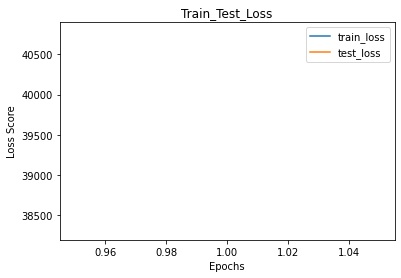

2
Train Epoch: 2 [0/7471 (0%)]	Loss: 38493.273438
Train Epoch: 2 [160/7471 (2%)]	Loss: 36044.367188
Train Epoch: 2 [320/7471 (4%)]	Loss: 35866.480469
Train Epoch: 2 [480/7471 (6%)]	Loss: 36952.082031
Train Epoch: 2 [640/7471 (9%)]	Loss: 35706.093750
Train Epoch: 2 [800/7471 (11%)]	Loss: 35970.003906
Train Epoch: 2 [960/7471 (13%)]	Loss: 36352.261719
Train Epoch: 2 [1120/7471 (15%)]	Loss: 56845.328125
Train Epoch: 2 [1280/7471 (17%)]	Loss: 52514.554688
Train Epoch: 2 [1440/7471 (19%)]	Loss: 42153.468750
Train Epoch: 2 [1600/7471 (21%)]	Loss: 38865.339844
Train Epoch: 2 [1760/7471 (24%)]	Loss: 37472.460938
Train Epoch: 2 [1920/7471 (26%)]	Loss: 37352.714844
Train Epoch: 2 [2080/7471 (28%)]	Loss: 40638.402344
Train Epoch: 2 [2240/7471 (30%)]	Loss: 75056.875000
Train Epoch: 2 [2400/7471 (32%)]	Loss: 119006.703125
Train Epoch: 2 [2560/7471 (34%)]	Loss: 126467.796875
Train Epoch: 2 [2720/7471 (36%)]	Loss: 48840.527344
Train Epoch: 2 [2880/7471 (39%)]	Loss: 44318.429688
Train Epoch: 2 [3040/7

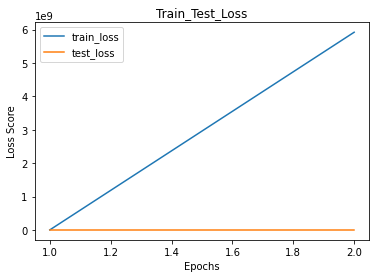

3
Train Epoch: 3 [0/7471 (0%)]	Loss: 38350.390625
Train Epoch: 3 [160/7471 (2%)]	Loss: 38304.476562
Train Epoch: 3 [320/7471 (4%)]	Loss: 36589.144531
Train Epoch: 3 [480/7471 (6%)]	Loss: 38386.050781
Train Epoch: 3 [640/7471 (9%)]	Loss: 38575.562500
Train Epoch: 3 [800/7471 (11%)]	Loss: 38030.171875
Train Epoch: 3 [960/7471 (13%)]	Loss: 37795.148438
Train Epoch: 3 [1120/7471 (15%)]	Loss: 38308.316406
Train Epoch: 3 [1280/7471 (17%)]	Loss: 37223.296875
Train Epoch: 3 [1440/7471 (19%)]	Loss: 38293.843750
Train Epoch: 3 [1600/7471 (21%)]	Loss: 38766.761719
Train Epoch: 3 [1760/7471 (24%)]	Loss: 38534.417969
Train Epoch: 3 [1920/7471 (26%)]	Loss: 37803.445312
Train Epoch: 3 [2080/7471 (28%)]	Loss: 37769.074219
Train Epoch: 3 [2240/7471 (30%)]	Loss: 38928.398438
Train Epoch: 3 [2400/7471 (32%)]	Loss: 38354.734375
Train Epoch: 3 [2560/7471 (34%)]	Loss: 38404.964844
Train Epoch: 3 [2720/7471 (36%)]	Loss: 39793.230469
Train Epoch: 3 [2880/7471 (39%)]	Loss: 37914.777344
Train Epoch: 3 [3040/747

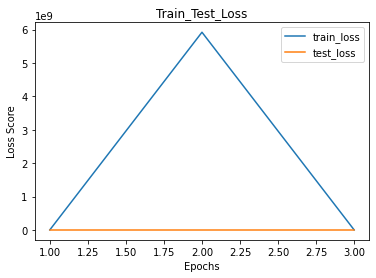

4
Train Epoch: 4 [0/7471 (0%)]	Loss: 38935.132812
Train Epoch: 4 [160/7471 (2%)]	Loss: 37895.769531
Train Epoch: 4 [320/7471 (4%)]	Loss: 37972.390625
Train Epoch: 4 [480/7471 (6%)]	Loss: 38267.746094
Train Epoch: 4 [640/7471 (9%)]	Loss: 37783.988281
Train Epoch: 4 [800/7471 (11%)]	Loss: 38402.386719
Train Epoch: 4 [960/7471 (13%)]	Loss: 36822.468750
Train Epoch: 4 [1120/7471 (15%)]	Loss: 37926.859375
Train Epoch: 4 [1280/7471 (17%)]	Loss: 38040.394531
Train Epoch: 4 [1440/7471 (19%)]	Loss: 37789.183594
Train Epoch: 4 [1600/7471 (21%)]	Loss: 38950.453125
Train Epoch: 4 [1760/7471 (24%)]	Loss: 38677.812500
Train Epoch: 4 [1920/7471 (26%)]	Loss: 39253.089844
Train Epoch: 4 [2080/7471 (28%)]	Loss: 38478.753906
Train Epoch: 4 [2240/7471 (30%)]	Loss: 37462.011719
Train Epoch: 4 [2400/7471 (32%)]	Loss: 39049.386719
Train Epoch: 4 [2560/7471 (34%)]	Loss: 38786.953125
Train Epoch: 4 [2720/7471 (36%)]	Loss: 37463.007812
Train Epoch: 4 [2880/7471 (39%)]	Loss: 38775.601562
Train Epoch: 4 [3040/747

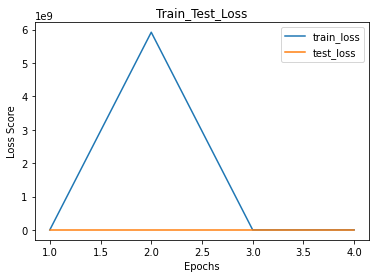

5
Train Epoch: 5 [0/7471 (0%)]	Loss: 38839.906250
Train Epoch: 5 [160/7471 (2%)]	Loss: 39533.167969
Train Epoch: 5 [320/7471 (4%)]	Loss: 38714.269531
Train Epoch: 5 [480/7471 (6%)]	Loss: 37636.332031
Train Epoch: 5 [640/7471 (9%)]	Loss: 37361.546875
Train Epoch: 5 [800/7471 (11%)]	Loss: 38209.066406
Train Epoch: 5 [960/7471 (13%)]	Loss: 38362.929688
Train Epoch: 5 [1120/7471 (15%)]	Loss: 50737.351562
Train Epoch: 5 [1280/7471 (17%)]	Loss: 48427.007812
Train Epoch: 5 [1440/7471 (19%)]	Loss: 39258.593750
Train Epoch: 5 [1600/7471 (21%)]	Loss: 43366.734375
Train Epoch: 5 [1760/7471 (24%)]	Loss: 40053.054688
Train Epoch: 5 [1920/7471 (26%)]	Loss: 39026.257812
Train Epoch: 5 [2080/7471 (28%)]	Loss: 68617.000000
Train Epoch: 5 [2240/7471 (30%)]	Loss: 51105.343750
Train Epoch: 5 [2400/7471 (32%)]	Loss: 39339.382812
Train Epoch: 5 [2560/7471 (34%)]	Loss: 38801.968750
Train Epoch: 5 [2720/7471 (36%)]	Loss: 39985.230469
Train Epoch: 5 [2880/7471 (39%)]	Loss: 38551.933594
Train Epoch: 5 [3040/747

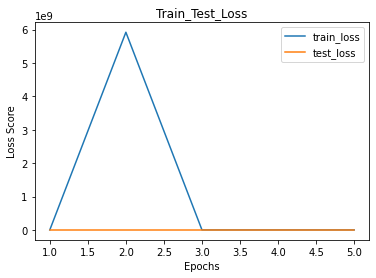

6
Train Epoch: 6 [0/7471 (0%)]	Loss: 37555.335938
Train Epoch: 6 [160/7471 (2%)]	Loss: 37808.328125
Train Epoch: 6 [320/7471 (4%)]	Loss: 38285.921875
Train Epoch: 6 [480/7471 (6%)]	Loss: 38667.183594
Train Epoch: 6 [640/7471 (9%)]	Loss: 38026.007812
Train Epoch: 6 [800/7471 (11%)]	Loss: 48976.664062
Train Epoch: 6 [960/7471 (13%)]	Loss: 42148.558594
Train Epoch: 6 [1120/7471 (15%)]	Loss: 38790.613281
Train Epoch: 6 [1280/7471 (17%)]	Loss: 38681.500000
Train Epoch: 6 [1440/7471 (19%)]	Loss: 39015.964844
Train Epoch: 6 [1600/7471 (21%)]	Loss: 36744.914062
Train Epoch: 6 [1760/7471 (24%)]	Loss: 38669.984375
Train Epoch: 6 [1920/7471 (26%)]	Loss: 50605.203125
Train Epoch: 6 [2080/7471 (28%)]	Loss: 44849.781250
Train Epoch: 6 [2240/7471 (30%)]	Loss: 50561.753906
Train Epoch: 6 [2400/7471 (32%)]	Loss: 89147.609375
Train Epoch: 6 [2560/7471 (34%)]	Loss: 62352.757812
Train Epoch: 6 [2720/7471 (36%)]	Loss: 40797.500000
Train Epoch: 6 [2880/7471 (39%)]	Loss: 40844.167969
Train Epoch: 6 [3040/747

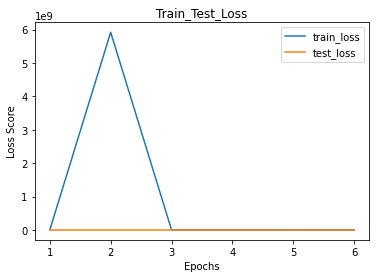

7
Train Epoch: 7 [0/7471 (0%)]	Loss: 38102.472656
Train Epoch: 7 [160/7471 (2%)]	Loss: 37320.671875
Train Epoch: 7 [320/7471 (4%)]	Loss: 36409.980469
Train Epoch: 7 [480/7471 (6%)]	Loss: 36523.273438
Train Epoch: 7 [640/7471 (9%)]	Loss: 37328.523438
Train Epoch: 7 [800/7471 (11%)]	Loss: 36769.882812
Train Epoch: 7 [960/7471 (13%)]	Loss: 36363.183594
Train Epoch: 7 [1120/7471 (15%)]	Loss: 36246.003906
Train Epoch: 7 [1280/7471 (17%)]	Loss: 36364.289062
Train Epoch: 7 [1440/7471 (19%)]	Loss: 37600.761719
Train Epoch: 7 [1600/7471 (21%)]	Loss: 36089.531250
Train Epoch: 7 [1760/7471 (24%)]	Loss: 37729.058594
Train Epoch: 7 [1920/7471 (26%)]	Loss: 35987.562500
Train Epoch: 7 [2080/7471 (28%)]	Loss: 37874.945312
Train Epoch: 7 [2240/7471 (30%)]	Loss: 37362.085938
Train Epoch: 7 [2400/7471 (32%)]	Loss: 37865.550781
Train Epoch: 7 [2560/7471 (34%)]	Loss: 37767.332031
Train Epoch: 7 [2720/7471 (36%)]	Loss: 37971.917969
Train Epoch: 7 [2880/7471 (39%)]	Loss: 46120.414062
Train Epoch: 7 [3040/747

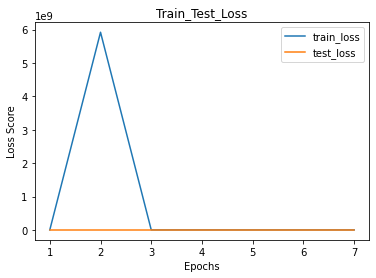

8
Train Epoch: 8 [0/7471 (0%)]	Loss: 35991.343750
Train Epoch: 8 [160/7471 (2%)]	Loss: 37036.078125
Train Epoch: 8 [320/7471 (4%)]	Loss: 34734.140625
Train Epoch: 8 [480/7471 (6%)]	Loss: 36455.015625
Train Epoch: 8 [640/7471 (9%)]	Loss: 34341.582031
Train Epoch: 8 [800/7471 (11%)]	Loss: 36693.710938
Train Epoch: 8 [960/7471 (13%)]	Loss: 35812.058594
Train Epoch: 8 [1120/7471 (15%)]	Loss: 37230.664062
Train Epoch: 8 [1280/7471 (17%)]	Loss: 36278.503906
Train Epoch: 8 [1440/7471 (19%)]	Loss: 36438.433594
Train Epoch: 8 [1600/7471 (21%)]	Loss: 38307.394531
Train Epoch: 8 [1760/7471 (24%)]	Loss: 36419.367188
Train Epoch: 8 [1920/7471 (26%)]	Loss: 36752.855469
Train Epoch: 8 [2080/7471 (28%)]	Loss: 35861.468750
Train Epoch: 8 [2240/7471 (30%)]	Loss: 36987.800781
Train Epoch: 8 [2400/7471 (32%)]	Loss: 37454.820312
Train Epoch: 8 [2560/7471 (34%)]	Loss: 60325.820312
Train Epoch: 8 [2720/7471 (36%)]	Loss: 56580.031250
Train Epoch: 8 [2880/7471 (39%)]	Loss: 38591.386719
Train Epoch: 8 [3040/747

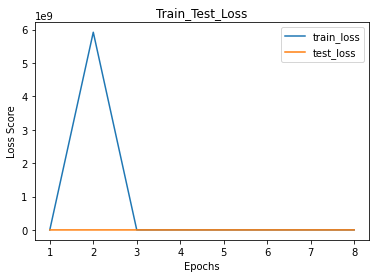

9
Train Epoch: 9 [0/7471 (0%)]	Loss: 67209.289062
Train Epoch: 9 [160/7471 (2%)]	Loss: 52543.738281
Train Epoch: 9 [320/7471 (4%)]	Loss: 39700.453125
Train Epoch: 9 [480/7471 (6%)]	Loss: 37784.957031
Train Epoch: 9 [640/7471 (9%)]	Loss: 38278.671875
Train Epoch: 9 [800/7471 (11%)]	Loss: 38526.769531
Train Epoch: 9 [960/7471 (13%)]	Loss: 36720.667969
Train Epoch: 9 [1120/7471 (15%)]	Loss: 36354.761719
Train Epoch: 9 [1280/7471 (17%)]	Loss: 36005.535156
Train Epoch: 9 [1440/7471 (19%)]	Loss: 37407.609375
Train Epoch: 9 [1600/7471 (21%)]	Loss: 37340.027344
Train Epoch: 9 [1760/7471 (24%)]	Loss: 36962.761719
Train Epoch: 9 [1920/7471 (26%)]	Loss: 36981.484375
Train Epoch: 9 [2080/7471 (28%)]	Loss: 36054.960938
Train Epoch: 9 [2240/7471 (30%)]	Loss: 37522.660156
Train Epoch: 9 [2400/7471 (32%)]	Loss: 38604.605469
Train Epoch: 9 [2560/7471 (34%)]	Loss: 37474.351562
Train Epoch: 9 [2720/7471 (36%)]	Loss: 37077.492188
Train Epoch: 9 [2880/7471 (39%)]	Loss: 36562.273438
Train Epoch: 9 [3040/747

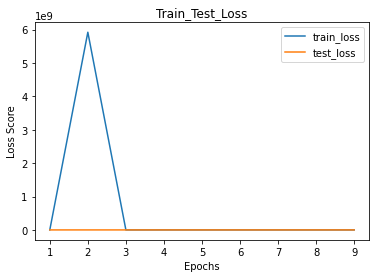

10
Train Epoch: 10 [0/7471 (0%)]	Loss: 37436.230469
Train Epoch: 10 [160/7471 (2%)]	Loss: 36862.191406
Train Epoch: 10 [320/7471 (4%)]	Loss: 37078.085938
Train Epoch: 10 [480/7471 (6%)]	Loss: 37093.488281
Train Epoch: 10 [640/7471 (9%)]	Loss: 68119.242188
Train Epoch: 10 [800/7471 (11%)]	Loss: 54266.746094
Train Epoch: 10 [960/7471 (13%)]	Loss: 41308.128906
Train Epoch: 10 [1120/7471 (15%)]	Loss: 37099.343750
Train Epoch: 10 [1280/7471 (17%)]	Loss: 59799.718750
Train Epoch: 10 [1440/7471 (19%)]	Loss: 50438.304688
Train Epoch: 10 [1600/7471 (21%)]	Loss: 39645.820312
Train Epoch: 10 [1760/7471 (24%)]	Loss: 40961.757812
Train Epoch: 10 [1920/7471 (26%)]	Loss: 54051.585938
Train Epoch: 10 [2080/7471 (28%)]	Loss: 48113.773438
Train Epoch: 10 [2240/7471 (30%)]	Loss: 39488.437500
Train Epoch: 10 [2400/7471 (32%)]	Loss: 42133.652344
Train Epoch: 10 [2560/7471 (34%)]	Loss: 43564.574219
Train Epoch: 10 [2720/7471 (36%)]	Loss: 39383.246094
Train Epoch: 10 [2880/7471 (39%)]	Loss: 37460.027344
Trai

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


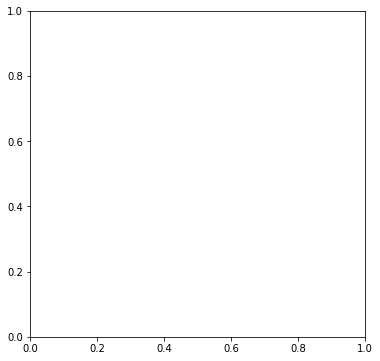

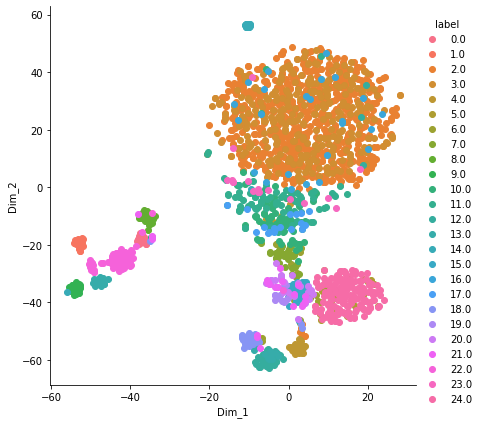

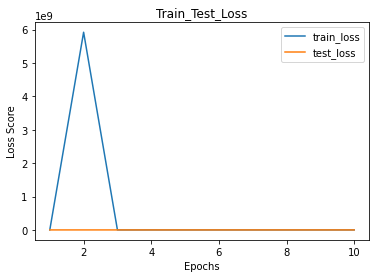

11
Train Epoch: 11 [0/7471 (0%)]	Loss: 39342.917969
Train Epoch: 11 [160/7471 (2%)]	Loss: 37263.074219
Train Epoch: 11 [320/7471 (4%)]	Loss: 36530.363281
Train Epoch: 11 [480/7471 (6%)]	Loss: 37631.625000
Train Epoch: 11 [640/7471 (9%)]	Loss: 9812682.000000
Train Epoch: 11 [800/7471 (11%)]	Loss: 55807.828125
Train Epoch: 11 [960/7471 (13%)]	Loss: 49814.468750
Train Epoch: 11 [1120/7471 (15%)]	Loss: 42464.511719
Train Epoch: 11 [1280/7471 (17%)]	Loss: 467673.218750
Train Epoch: 11 [1440/7471 (19%)]	Loss: 265105.531250
Train Epoch: 11 [1600/7471 (21%)]	Loss: 148651.218750
Train Epoch: 11 [1760/7471 (24%)]	Loss: 75938.281250
Train Epoch: 11 [1920/7471 (26%)]	Loss: 53622.421875
Train Epoch: 11 [2080/7471 (28%)]	Loss: 45137.714844
Train Epoch: 11 [2240/7471 (30%)]	Loss: 44203.210938
Train Epoch: 11 [2400/7471 (32%)]	Loss: 43778.265625
Train Epoch: 11 [2560/7471 (34%)]	Loss: 43818.511719
Train Epoch: 11 [2720/7471 (36%)]	Loss: 42446.296875
Train Epoch: 11 [2880/7471 (39%)]	Loss: 44333.847656

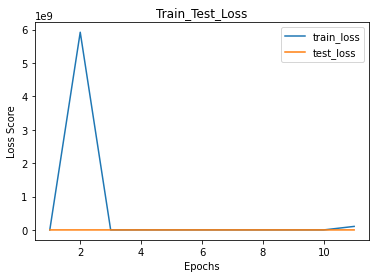

12
Train Epoch: 12 [0/7471 (0%)]	Loss: 62422.707031
Train Epoch: 12 [160/7471 (2%)]	Loss: 48184.574219
Train Epoch: 12 [320/7471 (4%)]	Loss: 44507.417969
Train Epoch: 12 [480/7471 (6%)]	Loss: 43394.664062
Train Epoch: 12 [640/7471 (9%)]	Loss: 42823.152344
Train Epoch: 12 [800/7471 (11%)]	Loss: 43081.953125
Train Epoch: 12 [960/7471 (13%)]	Loss: 42691.816406
Train Epoch: 12 [1120/7471 (15%)]	Loss: 43189.449219
Train Epoch: 12 [1280/7471 (17%)]	Loss: 44040.308594
Train Epoch: 12 [1440/7471 (19%)]	Loss: 41945.320312
Train Epoch: 12 [1600/7471 (21%)]	Loss: 41574.128906
Train Epoch: 12 [1760/7471 (24%)]	Loss: 42026.671875
Train Epoch: 12 [1920/7471 (26%)]	Loss: 41636.753906
Train Epoch: 12 [2080/7471 (28%)]	Loss: 42815.707031
Train Epoch: 12 [2240/7471 (30%)]	Loss: 42465.855469
Train Epoch: 12 [2400/7471 (32%)]	Loss: 41003.113281
Train Epoch: 12 [2560/7471 (34%)]	Loss: 43641.550781
Train Epoch: 12 [2720/7471 (36%)]	Loss: 42806.812500
Train Epoch: 12 [2880/7471 (39%)]	Loss: 42117.242188
Trai

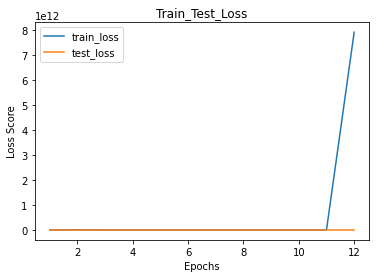

13
Train Epoch: 13 [0/7471 (0%)]	Loss: 43466.929688
Train Epoch: 13 [160/7471 (2%)]	Loss: 48147.765625
Train Epoch: 13 [320/7471 (4%)]	Loss: 47563.539062
Train Epoch: 13 [480/7471 (6%)]	Loss: 96703.062500
Train Epoch: 13 [640/7471 (9%)]	Loss: 102452.257812
Train Epoch: 13 [800/7471 (11%)]	Loss: 65423.902344
Train Epoch: 13 [960/7471 (13%)]	Loss: 56015.562500
Train Epoch: 13 [1120/7471 (15%)]	Loss: 50882.089844
Train Epoch: 13 [1280/7471 (17%)]	Loss: 51197.804688
Train Epoch: 13 [1440/7471 (19%)]	Loss: 48950.863281
Train Epoch: 13 [1600/7471 (21%)]	Loss: 54370.382812
Train Epoch: 13 [1760/7471 (24%)]	Loss: 50369.988281
Train Epoch: 13 [1920/7471 (26%)]	Loss: 49677.500000
Train Epoch: 13 [2080/7471 (28%)]	Loss: 44447.695312
Train Epoch: 13 [2240/7471 (30%)]	Loss: 90211.921875
Train Epoch: 13 [2400/7471 (32%)]	Loss: 81502.132812
Train Epoch: 13 [2560/7471 (34%)]	Loss: 58499.687500
Train Epoch: 13 [2720/7471 (36%)]	Loss: 51066.867188
Train Epoch: 13 [2880/7471 (39%)]	Loss: 50720.281250
Tra

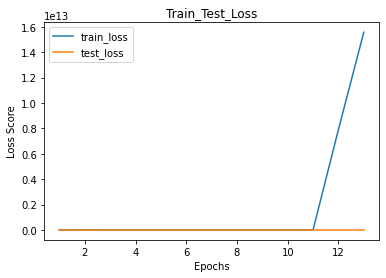

14
Train Epoch: 14 [0/7471 (0%)]	Loss: 53243.445312
Train Epoch: 14 [160/7471 (2%)]	Loss: 48603.777344
Train Epoch: 14 [320/7471 (4%)]	Loss: 47979.878906
Train Epoch: 14 [480/7471 (6%)]	Loss: 46487.812500
Train Epoch: 14 [640/7471 (9%)]	Loss: 48210.675781
Train Epoch: 14 [800/7471 (11%)]	Loss: 50419.250000
Train Epoch: 14 [960/7471 (13%)]	Loss: 49348.089844
Train Epoch: 14 [1120/7471 (15%)]	Loss: 45411.367188
Train Epoch: 14 [1280/7471 (17%)]	Loss: 48025.828125
Train Epoch: 14 [1440/7471 (19%)]	Loss: 47557.441406
Train Epoch: 14 [1600/7471 (21%)]	Loss: 48387.308594
Train Epoch: 14 [1760/7471 (24%)]	Loss: 44976.625000
Train Epoch: 14 [1920/7471 (26%)]	Loss: 93829.359375
Train Epoch: 14 [2080/7471 (28%)]	Loss: 66195.570312
Train Epoch: 14 [2240/7471 (30%)]	Loss: 50298.281250
Train Epoch: 14 [2400/7471 (32%)]	Loss: 62464.078125
Train Epoch: 14 [2560/7471 (34%)]	Loss: 71645.906250
Train Epoch: 14 [2720/7471 (36%)]	Loss: 52690.687500
Train Epoch: 14 [2880/7471 (39%)]	Loss: 50959.382812
Trai

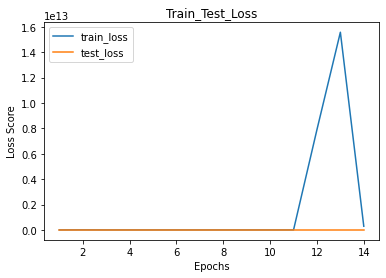

15
Train Epoch: 15 [0/7471 (0%)]	Loss: 49211.062500
Train Epoch: 15 [160/7471 (2%)]	Loss: 50516.945312
Train Epoch: 15 [320/7471 (4%)]	Loss: 68720.601562
Train Epoch: 15 [480/7471 (6%)]	Loss: 57359.054688
Train Epoch: 15 [640/7471 (9%)]	Loss: 50280.214844
Train Epoch: 15 [800/7471 (11%)]	Loss: 47311.265625
Train Epoch: 15 [960/7471 (13%)]	Loss: 48013.914062
Train Epoch: 15 [1120/7471 (15%)]	Loss: 47088.828125
Train Epoch: 15 [1280/7471 (17%)]	Loss: 48577.910156
Train Epoch: 15 [1440/7471 (19%)]	Loss: 46377.664062
Train Epoch: 15 [1600/7471 (21%)]	Loss: 49790.882812
Train Epoch: 15 [1760/7471 (24%)]	Loss: 48947.722656
Train Epoch: 15 [1920/7471 (26%)]	Loss: 49040.414062
Train Epoch: 15 [2080/7471 (28%)]	Loss: 48705.511719
Train Epoch: 15 [2240/7471 (30%)]	Loss: 48008.125000
Train Epoch: 15 [2400/7471 (32%)]	Loss: 45187.410156
Train Epoch: 15 [2560/7471 (34%)]	Loss: 46985.066406
Train Epoch: 15 [2720/7471 (36%)]	Loss: 48876.027344
Train Epoch: 15 [2880/7471 (39%)]	Loss: 326734.437500
Tra

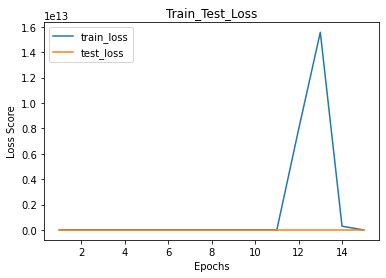

16
Train Epoch: 16 [0/7471 (0%)]	Loss: 48312.132812
Train Epoch: 16 [160/7471 (2%)]	Loss: 48697.140625
Train Epoch: 16 [320/7471 (4%)]	Loss: 46949.429688
Train Epoch: 16 [480/7471 (6%)]	Loss: 189976.687500
Train Epoch: 16 [640/7471 (9%)]	Loss: 120165.812500
Train Epoch: 16 [800/7471 (11%)]	Loss: 82708.031250
Train Epoch: 16 [960/7471 (13%)]	Loss: 57079.093750
Train Epoch: 16 [1120/7471 (15%)]	Loss: 52254.023438
Train Epoch: 16 [1280/7471 (17%)]	Loss: 50541.882812
Train Epoch: 16 [1440/7471 (19%)]	Loss: 49850.828125
Train Epoch: 16 [1600/7471 (21%)]	Loss: 47526.421875
Train Epoch: 16 [1760/7471 (24%)]	Loss: 48875.527344
Train Epoch: 16 [1920/7471 (26%)]	Loss: 48037.132812
Train Epoch: 16 [2080/7471 (28%)]	Loss: 47972.367188
Train Epoch: 16 [2240/7471 (30%)]	Loss: 47439.996094
Train Epoch: 16 [2400/7471 (32%)]	Loss: 47260.453125
Train Epoch: 16 [2560/7471 (34%)]	Loss: 48165.593750
Train Epoch: 16 [2720/7471 (36%)]	Loss: 47814.851562
Train Epoch: 16 [2880/7471 (39%)]	Loss: 47223.601562
Tr

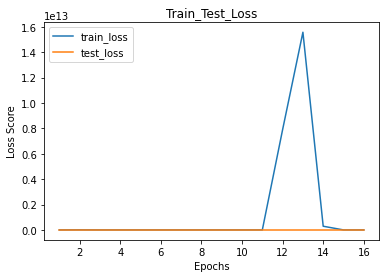

17
Train Epoch: 17 [0/7471 (0%)]	Loss: 47865.867188
Train Epoch: 17 [160/7471 (2%)]	Loss: 54427.378906
Train Epoch: 17 [320/7471 (4%)]	Loss: 49561.617188
Train Epoch: 17 [480/7471 (6%)]	Loss: 47886.867188
Train Epoch: 17 [640/7471 (9%)]	Loss: 50237.613281
Train Epoch: 17 [800/7471 (11%)]	Loss: 45894.109375
Train Epoch: 17 [960/7471 (13%)]	Loss: 47045.734375
Train Epoch: 17 [1120/7471 (15%)]	Loss: 47580.039062
Train Epoch: 17 [1280/7471 (17%)]	Loss: 46836.617188
Train Epoch: 17 [1440/7471 (19%)]	Loss: 45952.242188
Train Epoch: 17 [1600/7471 (21%)]	Loss: 46461.367188
Train Epoch: 17 [1760/7471 (24%)]	Loss: 53060.945312
Train Epoch: 17 [1920/7471 (26%)]	Loss: 49850.511719
Train Epoch: 17 [2080/7471 (28%)]	Loss: 49280.500000
Train Epoch: 17 [2240/7471 (30%)]	Loss: 49453.453125
Train Epoch: 17 [2400/7471 (32%)]	Loss: 77660.046875
Train Epoch: 17 [2560/7471 (34%)]	Loss: 75428.242188
Train Epoch: 17 [2720/7471 (36%)]	Loss: 56002.703125
Train Epoch: 17 [2880/7471 (39%)]	Loss: 51109.585938
Trai

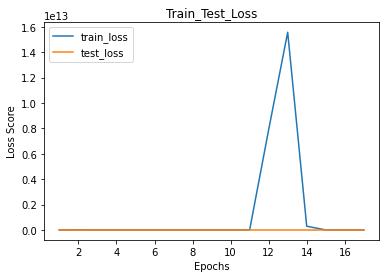

18
Train Epoch: 18 [0/7471 (0%)]	Loss: 47866.890625
Train Epoch: 18 [160/7471 (2%)]	Loss: 50612.148438
Train Epoch: 18 [320/7471 (4%)]	Loss: 46997.628906
Train Epoch: 18 [480/7471 (6%)]	Loss: 543119.062500
Train Epoch: 18 [640/7471 (9%)]	Loss: 208854.015625
Train Epoch: 18 [800/7471 (11%)]	Loss: 102045.007812
Train Epoch: 18 [960/7471 (13%)]	Loss: 58624.710938
Train Epoch: 18 [1120/7471 (15%)]	Loss: 50247.484375
Train Epoch: 18 [1280/7471 (17%)]	Loss: 50699.464844
Train Epoch: 18 [1440/7471 (19%)]	Loss: 48857.906250
Train Epoch: 18 [1600/7471 (21%)]	Loss: 54850.039062
Train Epoch: 18 [1760/7471 (24%)]	Loss: 50974.914062
Train Epoch: 18 [1920/7471 (26%)]	Loss: 47164.437500
Train Epoch: 18 [2080/7471 (28%)]	Loss: 46803.589844
Train Epoch: 18 [2240/7471 (30%)]	Loss: 45675.242188
Train Epoch: 18 [2400/7471 (32%)]	Loss: 46666.718750
Train Epoch: 18 [2560/7471 (34%)]	Loss: 51315.976562
Train Epoch: 18 [2720/7471 (36%)]	Loss: 50744.062500
Train Epoch: 18 [2880/7471 (39%)]	Loss: 49406.515625
T

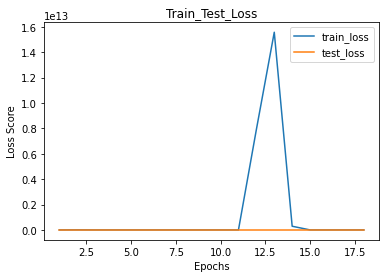

19
Train Epoch: 19 [0/7471 (0%)]	Loss: 47488.496094
Train Epoch: 19 [160/7471 (2%)]	Loss: 47311.750000
Train Epoch: 19 [320/7471 (4%)]	Loss: 46551.144531
Train Epoch: 19 [480/7471 (6%)]	Loss: 47835.144531
Train Epoch: 19 [640/7471 (9%)]	Loss: 46434.171875
Train Epoch: 19 [800/7471 (11%)]	Loss: 47841.503906
Train Epoch: 19 [960/7471 (13%)]	Loss: 43096.773438
Train Epoch: 19 [1120/7471 (15%)]	Loss: 46535.101562
Train Epoch: 19 [1280/7471 (17%)]	Loss: 47727.445312
Train Epoch: 19 [1440/7471 (19%)]	Loss: 44879.289062
Train Epoch: 19 [1600/7471 (21%)]	Loss: 47950.015625
Train Epoch: 19 [1760/7471 (24%)]	Loss: 47699.265625
Train Epoch: 19 [1920/7471 (26%)]	Loss: 44856.976562
Train Epoch: 19 [2080/7471 (28%)]	Loss: 46637.265625
Train Epoch: 19 [2240/7471 (30%)]	Loss: 47533.859375
Train Epoch: 19 [2400/7471 (32%)]	Loss: 45329.000000
Train Epoch: 19 [2560/7471 (34%)]	Loss: 46727.078125
Train Epoch: 19 [2720/7471 (36%)]	Loss: 46312.187500
Train Epoch: 19 [2880/7471 (39%)]	Loss: 46966.007812
Trai

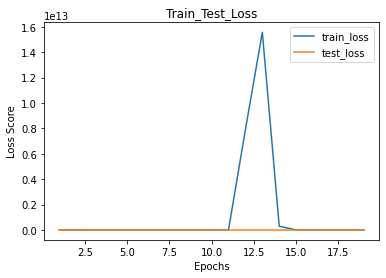

20
Train Epoch: 20 [0/7471 (0%)]	Loss: 51003.152344
Train Epoch: 20 [160/7471 (2%)]	Loss: 47892.296875
Train Epoch: 20 [320/7471 (4%)]	Loss: 53757.718750
Train Epoch: 20 [480/7471 (6%)]	Loss: 50423.144531
Train Epoch: 20 [640/7471 (9%)]	Loss: 50362.140625
Train Epoch: 20 [800/7471 (11%)]	Loss: 48982.597656
Train Epoch: 20 [960/7471 (13%)]	Loss: 52605.148438
Train Epoch: 20 [1120/7471 (15%)]	Loss: 76542.468750
Train Epoch: 20 [1280/7471 (17%)]	Loss: 51970.046875
Train Epoch: 20 [1440/7471 (19%)]	Loss: 49337.453125
Train Epoch: 20 [1600/7471 (21%)]	Loss: 46833.332031
Train Epoch: 20 [1760/7471 (24%)]	Loss: 48779.593750
Train Epoch: 20 [1920/7471 (26%)]	Loss: 46455.214844
Train Epoch: 20 [2080/7471 (28%)]	Loss: 47797.445312
Train Epoch: 20 [2240/7471 (30%)]	Loss: 47033.328125
Train Epoch: 20 [2400/7471 (32%)]	Loss: 47199.523438
Train Epoch: 20 [2560/7471 (34%)]	Loss: 49438.421875
Train Epoch: 20 [2720/7471 (36%)]	Loss: 47947.828125
Train Epoch: 20 [2880/7471 (39%)]	Loss: 47116.343750
Trai

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


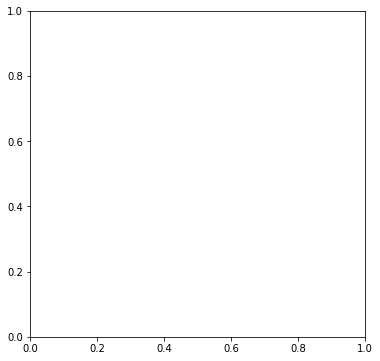

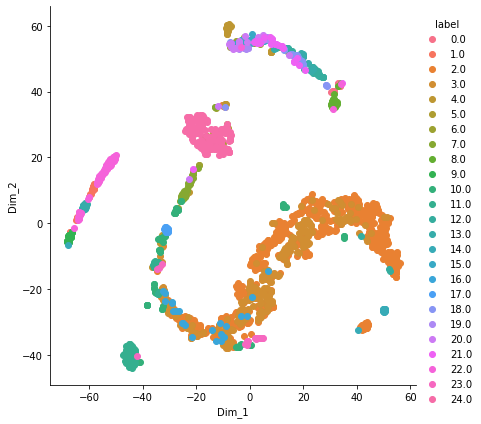

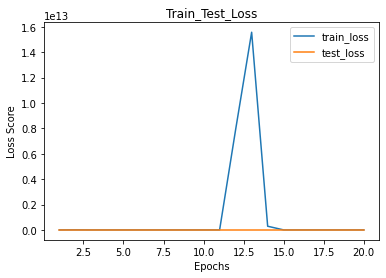

21
Train Epoch: 21 [0/7471 (0%)]	Loss: 281395.812500
Train Epoch: 21 [160/7471 (2%)]	Loss: 155429.312500
Train Epoch: 21 [320/7471 (4%)]	Loss: 81812.554688
Train Epoch: 21 [480/7471 (6%)]	Loss: 55514.335938
Train Epoch: 21 [640/7471 (9%)]	Loss: 48627.531250
Train Epoch: 21 [800/7471 (11%)]	Loss: 57356.640625
Train Epoch: 21 [960/7471 (13%)]	Loss: 49742.628906
Train Epoch: 21 [1120/7471 (15%)]	Loss: 49663.867188
Train Epoch: 21 [1280/7471 (17%)]	Loss: 48334.773438
Train Epoch: 21 [1440/7471 (19%)]	Loss: 43965.652344
Train Epoch: 21 [1600/7471 (21%)]	Loss: 45209.164062
Train Epoch: 21 [1760/7471 (24%)]	Loss: 45483.109375
Train Epoch: 21 [1920/7471 (26%)]	Loss: 47375.593750
Train Epoch: 21 [2080/7471 (28%)]	Loss: 46142.496094
Train Epoch: 21 [2240/7471 (30%)]	Loss: 47289.171875
Train Epoch: 21 [2400/7471 (32%)]	Loss: 48387.132812
Train Epoch: 21 [2560/7471 (34%)]	Loss: 46548.539062
Train Epoch: 21 [2720/7471 (36%)]	Loss: 46447.218750
Train Epoch: 21 [2880/7471 (39%)]	Loss: 48346.187500
Tr

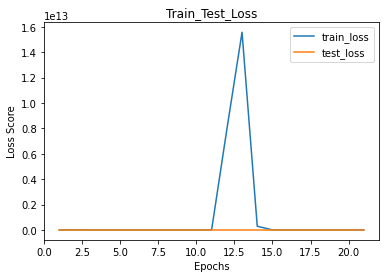

22
Train Epoch: 22 [0/7471 (0%)]	Loss: 45132.230469
Train Epoch: 22 [160/7471 (2%)]	Loss: 46079.648438
Train Epoch: 22 [320/7471 (4%)]	Loss: 45594.167969
Train Epoch: 22 [480/7471 (6%)]	Loss: 46369.003906
Train Epoch: 22 [640/7471 (9%)]	Loss: 46225.613281
Train Epoch: 22 [800/7471 (11%)]	Loss: 46203.234375
Train Epoch: 22 [960/7471 (13%)]	Loss: 47637.175781
Train Epoch: 22 [1120/7471 (15%)]	Loss: 46987.140625
Train Epoch: 22 [1280/7471 (17%)]	Loss: 47061.621094
Train Epoch: 22 [1440/7471 (19%)]	Loss: 46813.609375
Train Epoch: 22 [1600/7471 (21%)]	Loss: 46345.429688
Train Epoch: 22 [1760/7471 (24%)]	Loss: 45159.257812
Train Epoch: 22 [1920/7471 (26%)]	Loss: 44755.386719
Train Epoch: 22 [2080/7471 (28%)]	Loss: 47213.484375
Train Epoch: 22 [2240/7471 (30%)]	Loss: 45611.890625
Train Epoch: 22 [2400/7471 (32%)]	Loss: 47946.093750
Train Epoch: 22 [2560/7471 (34%)]	Loss: 46162.179688
Train Epoch: 22 [2720/7471 (36%)]	Loss: 45183.875000
Train Epoch: 22 [2880/7471 (39%)]	Loss: 43815.878906
Trai

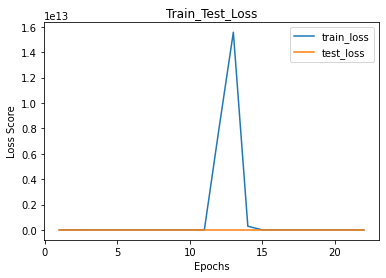

23
Train Epoch: 23 [0/7471 (0%)]	Loss: 47086.867188
Train Epoch: 23 [160/7471 (2%)]	Loss: 47147.175781
Train Epoch: 23 [320/7471 (4%)]	Loss: 45768.035156
Train Epoch: 23 [480/7471 (6%)]	Loss: 44994.492188
Train Epoch: 23 [640/7471 (9%)]	Loss: 45777.968750
Train Epoch: 23 [800/7471 (11%)]	Loss: 46250.562500
Train Epoch: 23 [960/7471 (13%)]	Loss: 45522.097656
Train Epoch: 23 [1120/7471 (15%)]	Loss: 46403.218750
Train Epoch: 23 [1280/7471 (17%)]	Loss: 47627.566406
Train Epoch: 23 [1440/7471 (19%)]	Loss: 47957.921875
Train Epoch: 23 [1600/7471 (21%)]	Loss: 45733.074219
Train Epoch: 23 [1760/7471 (24%)]	Loss: 45386.144531
Train Epoch: 23 [1920/7471 (26%)]	Loss: 46305.132812
Train Epoch: 23 [2080/7471 (28%)]	Loss: 45305.703125
Train Epoch: 23 [2240/7471 (30%)]	Loss: 54081.582031
Train Epoch: 23 [2400/7471 (32%)]	Loss: 49738.718750
Train Epoch: 23 [2560/7471 (34%)]	Loss: 47028.996094
Train Epoch: 23 [2720/7471 (36%)]	Loss: 45025.941406
Train Epoch: 23 [2880/7471 (39%)]	Loss: 44463.218750
Trai

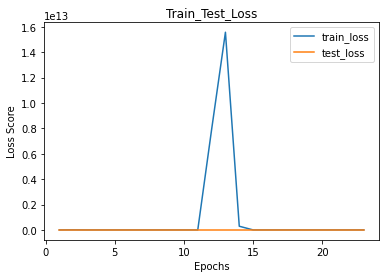

24
Train Epoch: 24 [0/7471 (0%)]	Loss: 47091.117188
Train Epoch: 24 [160/7471 (2%)]	Loss: 45344.718750
Train Epoch: 24 [320/7471 (4%)]	Loss: 44426.246094
Train Epoch: 24 [480/7471 (6%)]	Loss: 46788.343750
Train Epoch: 24 [640/7471 (9%)]	Loss: 55480.582031
Train Epoch: 24 [800/7471 (11%)]	Loss: 69899.000000
Train Epoch: 24 [960/7471 (13%)]	Loss: 54064.718750
Train Epoch: 24 [1120/7471 (15%)]	Loss: 44605.476562
Train Epoch: 24 [1280/7471 (17%)]	Loss: 48896.777344
Train Epoch: 24 [1440/7471 (19%)]	Loss: 47541.851562
Train Epoch: 24 [1600/7471 (21%)]	Loss: 45542.113281
Train Epoch: 24 [1760/7471 (24%)]	Loss: 47238.218750
Train Epoch: 24 [1920/7471 (26%)]	Loss: 90963.796875
Train Epoch: 24 [2080/7471 (28%)]	Loss: 60127.351562
Train Epoch: 24 [2240/7471 (30%)]	Loss: 54329.726562
Train Epoch: 24 [2400/7471 (32%)]	Loss: 46578.828125
Train Epoch: 24 [2560/7471 (34%)]	Loss: 48466.265625
Train Epoch: 24 [2720/7471 (36%)]	Loss: 45989.707031
Train Epoch: 24 [2880/7471 (39%)]	Loss: 47148.019531
Trai

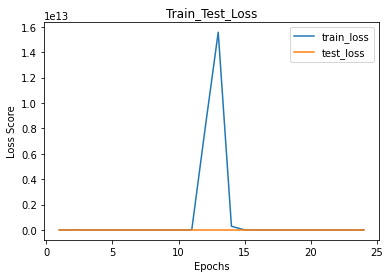

25
Train Epoch: 25 [0/7471 (0%)]	Loss: 48116.535156
Train Epoch: 25 [160/7471 (2%)]	Loss: 48069.710938
Train Epoch: 25 [320/7471 (4%)]	Loss: 48144.769531
Train Epoch: 25 [480/7471 (6%)]	Loss: 47117.828125
Train Epoch: 25 [640/7471 (9%)]	Loss: 47974.628906
Train Epoch: 25 [800/7471 (11%)]	Loss: 45989.789062
Train Epoch: 25 [960/7471 (13%)]	Loss: 48210.273438
Train Epoch: 25 [1120/7471 (15%)]	Loss: 45894.496094
Train Epoch: 25 [1280/7471 (17%)]	Loss: 45650.195312
Train Epoch: 25 [1440/7471 (19%)]	Loss: 47534.453125
Train Epoch: 25 [1600/7471 (21%)]	Loss: 47567.484375
Train Epoch: 25 [1760/7471 (24%)]	Loss: 46012.007812
Train Epoch: 25 [1920/7471 (26%)]	Loss: 47918.468750
Train Epoch: 25 [2080/7471 (28%)]	Loss: 48991.398438
Train Epoch: 25 [2240/7471 (30%)]	Loss: 48014.601562
Train Epoch: 25 [2400/7471 (32%)]	Loss: 46409.941406
Train Epoch: 25 [2560/7471 (34%)]	Loss: 93581.281250
Train Epoch: 25 [2720/7471 (36%)]	Loss: 63652.992188
Train Epoch: 25 [2880/7471 (39%)]	Loss: 56404.082031
Trai

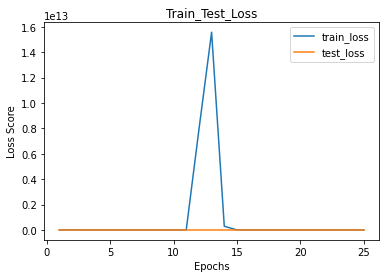

26
Train Epoch: 26 [0/7471 (0%)]	Loss: 44028.257812
Train Epoch: 26 [160/7471 (2%)]	Loss: 47540.367188
Train Epoch: 26 [320/7471 (4%)]	Loss: 44404.000000
Train Epoch: 26 [480/7471 (6%)]	Loss: 46185.792969
Train Epoch: 26 [640/7471 (9%)]	Loss: 48046.316406
Train Epoch: 26 [800/7471 (11%)]	Loss: 44725.617188
Train Epoch: 26 [960/7471 (13%)]	Loss: 44787.515625
Train Epoch: 26 [1120/7471 (15%)]	Loss: 46123.015625
Train Epoch: 26 [1280/7471 (17%)]	Loss: 48587.976562
Train Epoch: 26 [1440/7471 (19%)]	Loss: 54215.523438
Train Epoch: 26 [1600/7471 (21%)]	Loss: 48029.085938
Train Epoch: 26 [1760/7471 (24%)]	Loss: 47899.386719
Train Epoch: 26 [1920/7471 (26%)]	Loss: 46015.570312
Train Epoch: 26 [2080/7471 (28%)]	Loss: 46473.843750
Train Epoch: 26 [2240/7471 (30%)]	Loss: 45616.847656
Train Epoch: 26 [2400/7471 (32%)]	Loss: 48669.531250
Train Epoch: 26 [2560/7471 (34%)]	Loss: 46352.609375
Train Epoch: 26 [2720/7471 (36%)]	Loss: 45926.628906
Train Epoch: 26 [2880/7471 (39%)]	Loss: 46829.890625
Trai

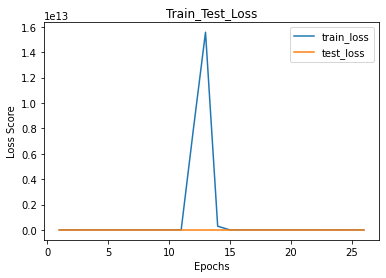

27
Train Epoch: 27 [0/7471 (0%)]	Loss: 46294.898438
Train Epoch: 27 [160/7471 (2%)]	Loss: 47359.980469
Train Epoch: 27 [320/7471 (4%)]	Loss: 46138.906250
Train Epoch: 27 [480/7471 (6%)]	Loss: 45884.808594
Train Epoch: 27 [640/7471 (9%)]	Loss: 57120.207031
Train Epoch: 27 [800/7471 (11%)]	Loss: 49006.437500
Train Epoch: 27 [960/7471 (13%)]	Loss: 48093.148438
Train Epoch: 27 [1120/7471 (15%)]	Loss: 44050.406250
Train Epoch: 27 [1280/7471 (17%)]	Loss: 46834.906250
Train Epoch: 27 [1440/7471 (19%)]	Loss: 45488.667969
Train Epoch: 27 [1600/7471 (21%)]	Loss: 45763.648438
Train Epoch: 27 [1760/7471 (24%)]	Loss: 47376.726562
Train Epoch: 27 [1920/7471 (26%)]	Loss: 80835.328125
Train Epoch: 27 [2080/7471 (28%)]	Loss: 65416.769531
Train Epoch: 27 [2240/7471 (30%)]	Loss: 53146.296875
Train Epoch: 27 [2400/7471 (32%)]	Loss: 46502.238281
Train Epoch: 27 [2560/7471 (34%)]	Loss: 70772.492188
Train Epoch: 27 [2720/7471 (36%)]	Loss: 51899.035156
Train Epoch: 27 [2880/7471 (39%)]	Loss: 49352.386719
Trai

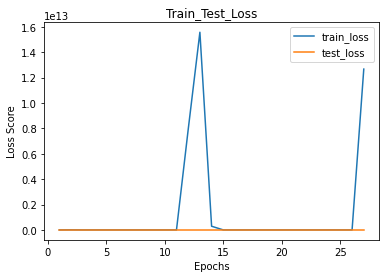

28
Train Epoch: 28 [0/7471 (0%)]	Loss: 49401.734375
Train Epoch: 28 [160/7471 (2%)]	Loss: 48675.476562
Train Epoch: 28 [320/7471 (4%)]	Loss: 47059.140625
Train Epoch: 28 [480/7471 (6%)]	Loss: 48479.113281
Train Epoch: 28 [640/7471 (9%)]	Loss: 48271.468750
Train Epoch: 28 [800/7471 (11%)]	Loss: 47386.839844
Train Epoch: 28 [960/7471 (13%)]	Loss: 46894.097656
Train Epoch: 28 [1120/7471 (15%)]	Loss: 48713.484375
Train Epoch: 28 [1280/7471 (17%)]	Loss: 53933.492188
Train Epoch: 28 [1440/7471 (19%)]	Loss: 149510.468750
Train Epoch: 28 [1600/7471 (21%)]	Loss: 86842.765625
Train Epoch: 28 [1760/7471 (24%)]	Loss: 58757.585938
Train Epoch: 28 [1920/7471 (26%)]	Loss: 55771.015625
Train Epoch: 28 [2080/7471 (28%)]	Loss: 52671.960938
Train Epoch: 28 [2240/7471 (30%)]	Loss: 51634.628906
Train Epoch: 28 [2400/7471 (32%)]	Loss: 51499.128906
Train Epoch: 28 [2560/7471 (34%)]	Loss: 52773.777344
Train Epoch: 28 [2720/7471 (36%)]	Loss: 68942.750000
Train Epoch: 28 [2880/7471 (39%)]	Loss: 60164.515625
Tra

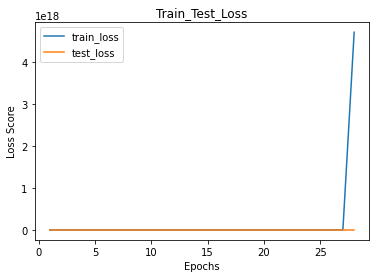

29
Train Epoch: 29 [0/7471 (0%)]	Loss: 74505.125000
Train Epoch: 29 [160/7471 (2%)]	Loss: 55174.835938
Train Epoch: 29 [320/7471 (4%)]	Loss: 57293.136719
Train Epoch: 29 [480/7471 (6%)]	Loss: 52811.070312
Train Epoch: 29 [640/7471 (9%)]	Loss: 52023.277344
Train Epoch: 29 [800/7471 (11%)]	Loss: 52425.214844
Train Epoch: 29 [960/7471 (13%)]	Loss: 52707.066406
Train Epoch: 29 [1120/7471 (15%)]	Loss: 50099.027344
Train Epoch: 29 [1280/7471 (17%)]	Loss: 51670.371094
Train Epoch: 29 [1440/7471 (19%)]	Loss: 50601.332031
Train Epoch: 29 [1600/7471 (21%)]	Loss: 51127.003906
Train Epoch: 29 [1760/7471 (24%)]	Loss: 68312.859375
Train Epoch: 29 [1920/7471 (26%)]	Loss: 55815.929688
Train Epoch: 29 [2080/7471 (28%)]	Loss: 53350.605469
Train Epoch: 29 [2240/7471 (30%)]	Loss: 47672.902344
Train Epoch: 29 [2400/7471 (32%)]	Loss: 52845.843750
Train Epoch: 29 [2560/7471 (34%)]	Loss: 52869.675781
Train Epoch: 29 [2720/7471 (36%)]	Loss: 51507.199219
Train Epoch: 29 [2880/7471 (39%)]	Loss: 50013.828125
Trai

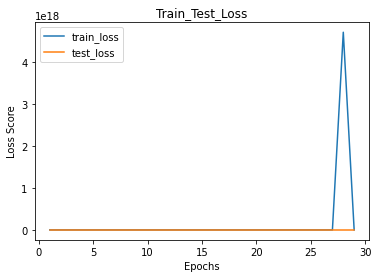

30
Train Epoch: 30 [0/7471 (0%)]	Loss: 50684.820312
Train Epoch: 30 [160/7471 (2%)]	Loss: 52188.773438
Train Epoch: 30 [320/7471 (4%)]	Loss: 49915.992188
Train Epoch: 30 [480/7471 (6%)]	Loss: 51742.687500
Train Epoch: 30 [640/7471 (9%)]	Loss: 48630.980469
Train Epoch: 30 [800/7471 (11%)]	Loss: 51336.558594
Train Epoch: 30 [960/7471 (13%)]	Loss: 50311.371094
Train Epoch: 30 [1120/7471 (15%)]	Loss: 51660.292969
Train Epoch: 30 [1280/7471 (17%)]	Loss: 51284.101562
Train Epoch: 30 [1440/7471 (19%)]	Loss: 52044.699219
Train Epoch: 30 [1600/7471 (21%)]	Loss: 52372.277344
Train Epoch: 30 [1760/7471 (24%)]	Loss: 49819.117188
Train Epoch: 30 [1920/7471 (26%)]	Loss: 50552.316406
Train Epoch: 30 [2080/7471 (28%)]	Loss: 50198.773438
Train Epoch: 30 [2240/7471 (30%)]	Loss: 50774.425781
Train Epoch: 30 [2400/7471 (32%)]	Loss: 52157.679688
Train Epoch: 30 [2560/7471 (34%)]	Loss: 82177.609375
Train Epoch: 30 [2720/7471 (36%)]	Loss: 70268.750000
Train Epoch: 30 [2880/7471 (39%)]	Loss: 57467.558594
Trai

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


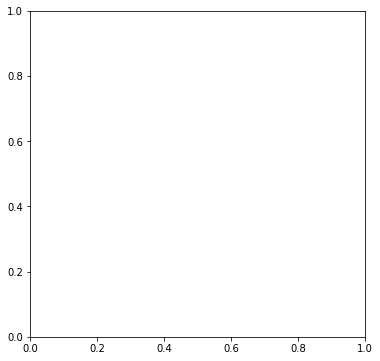

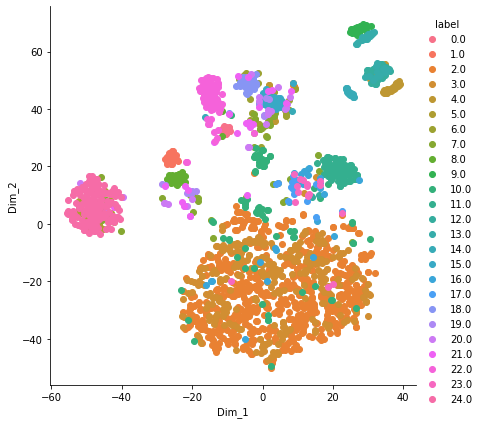

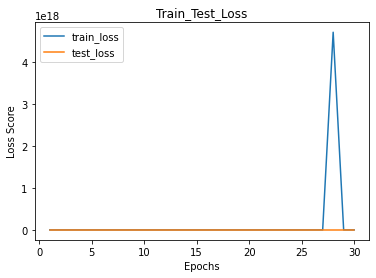

31
Train Epoch: 31 [0/7471 (0%)]	Loss: 48906.792969
Train Epoch: 31 [160/7471 (2%)]	Loss: 54099.328125
Train Epoch: 31 [320/7471 (4%)]	Loss: 49821.781250
Train Epoch: 31 [480/7471 (6%)]	Loss: 50828.355469
Train Epoch: 31 [640/7471 (9%)]	Loss: 50213.089844
Train Epoch: 31 [800/7471 (11%)]	Loss: 50790.308594
Train Epoch: 31 [960/7471 (13%)]	Loss: 50732.710938
Train Epoch: 31 [1120/7471 (15%)]	Loss: 49754.511719
Train Epoch: 31 [1280/7471 (17%)]	Loss: 50807.871094
Train Epoch: 31 [1440/7471 (19%)]	Loss: 49195.414062
Train Epoch: 31 [1600/7471 (21%)]	Loss: 50565.046875
Train Epoch: 31 [1760/7471 (24%)]	Loss: 51055.179688
Train Epoch: 31 [1920/7471 (26%)]	Loss: 52443.898438
Train Epoch: 31 [2080/7471 (28%)]	Loss: 50705.945312
Train Epoch: 31 [2240/7471 (30%)]	Loss: 47468.851562
Train Epoch: 31 [2400/7471 (32%)]	Loss: 47691.554688
Train Epoch: 31 [2560/7471 (34%)]	Loss: 51080.015625
Train Epoch: 31 [2720/7471 (36%)]	Loss: 49812.238281
Train Epoch: 31 [2880/7471 (39%)]	Loss: 49343.093750
Trai

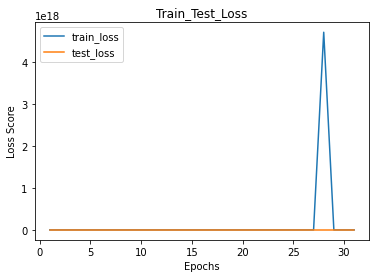

32
Train Epoch: 32 [0/7471 (0%)]	Loss: 65017.402344
Train Epoch: 32 [160/7471 (2%)]	Loss: 54112.785156
Train Epoch: 32 [320/7471 (4%)]	Loss: 51406.242188
Train Epoch: 32 [480/7471 (6%)]	Loss: 53293.347656
Train Epoch: 32 [640/7471 (9%)]	Loss: 51732.398438
Train Epoch: 32 [800/7471 (11%)]	Loss: 51627.082031
Train Epoch: 32 [960/7471 (13%)]	Loss: 49512.296875
Train Epoch: 32 [1120/7471 (15%)]	Loss: 51635.832031
Train Epoch: 32 [1280/7471 (17%)]	Loss: 51307.531250
Train Epoch: 32 [1440/7471 (19%)]	Loss: 49523.132812
Train Epoch: 32 [1600/7471 (21%)]	Loss: 51508.406250
Train Epoch: 32 [1760/7471 (24%)]	Loss: 54100.070312
Train Epoch: 32 [1920/7471 (26%)]	Loss: 50681.808594
Train Epoch: 32 [2080/7471 (28%)]	Loss: 51976.988281
Train Epoch: 32 [2240/7471 (30%)]	Loss: 52763.222656
Train Epoch: 32 [2400/7471 (32%)]	Loss: 51049.257812
Train Epoch: 32 [2560/7471 (34%)]	Loss: 51265.144531
Train Epoch: 32 [2720/7471 (36%)]	Loss: 52608.699219
Train Epoch: 32 [2880/7471 (39%)]	Loss: 50728.242188
Trai

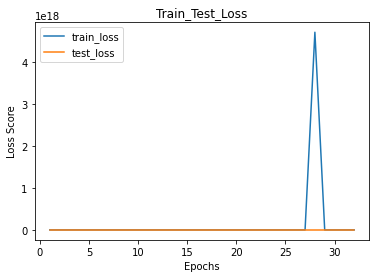

33
Train Epoch: 33 [0/7471 (0%)]	Loss: 202025.062500
Train Epoch: 33 [160/7471 (2%)]	Loss: 117879.789062
Train Epoch: 33 [320/7471 (4%)]	Loss: 105214.765625
Train Epoch: 33 [480/7471 (6%)]	Loss: 80103.046875
Train Epoch: 33 [640/7471 (9%)]	Loss: 70847.210938
Train Epoch: 33 [800/7471 (11%)]	Loss: 60998.554688
Train Epoch: 33 [960/7471 (13%)]	Loss: 59414.304688
Train Epoch: 33 [1120/7471 (15%)]	Loss: 56017.203125
Train Epoch: 33 [1280/7471 (17%)]	Loss: 50600.125000
Train Epoch: 33 [1440/7471 (19%)]	Loss: 52526.515625
Train Epoch: 33 [1600/7471 (21%)]	Loss: 50340.890625
Train Epoch: 33 [1760/7471 (24%)]	Loss: 50938.984375
Train Epoch: 33 [1920/7471 (26%)]	Loss: 52030.656250
Train Epoch: 33 [2080/7471 (28%)]	Loss: 49572.765625
Train Epoch: 33 [2240/7471 (30%)]	Loss: 52075.695312
Train Epoch: 33 [2400/7471 (32%)]	Loss: 49465.937500
Train Epoch: 33 [2560/7471 (34%)]	Loss: 48498.929688
Train Epoch: 33 [2720/7471 (36%)]	Loss: 49459.925781
Train Epoch: 33 [2880/7471 (39%)]	Loss: 50282.691406
T

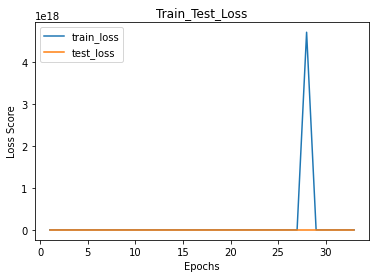

34
Train Epoch: 34 [0/7471 (0%)]	Loss: 50494.710938
Train Epoch: 34 [160/7471 (2%)]	Loss: 50443.527344
Train Epoch: 34 [320/7471 (4%)]	Loss: 49371.433594
Train Epoch: 34 [480/7471 (6%)]	Loss: 49927.484375
Train Epoch: 34 [640/7471 (9%)]	Loss: 49910.527344
Train Epoch: 34 [800/7471 (11%)]	Loss: 50214.039062
Train Epoch: 34 [960/7471 (13%)]	Loss: 47463.664062
Train Epoch: 34 [1120/7471 (15%)]	Loss: 48938.578125
Train Epoch: 34 [1280/7471 (17%)]	Loss: 48451.140625
Train Epoch: 34 [1440/7471 (19%)]	Loss: 49682.382812
Train Epoch: 34 [1600/7471 (21%)]	Loss: 49748.218750
Train Epoch: 34 [1760/7471 (24%)]	Loss: 48049.804688
Train Epoch: 34 [1920/7471 (26%)]	Loss: 50322.867188
Train Epoch: 34 [2080/7471 (28%)]	Loss: 51173.609375
Train Epoch: 34 [2240/7471 (30%)]	Loss: 51513.203125
Train Epoch: 34 [2400/7471 (32%)]	Loss: 50337.703125
Train Epoch: 34 [2560/7471 (34%)]	Loss: 50406.000000
Train Epoch: 34 [2720/7471 (36%)]	Loss: 49305.332031
Train Epoch: 34 [2880/7471 (39%)]	Loss: 46555.589844
Trai

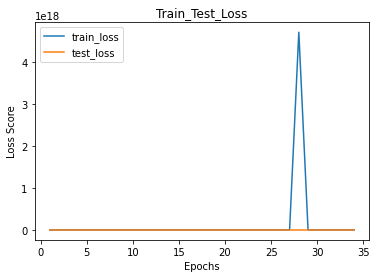

35
Train Epoch: 35 [0/7471 (0%)]	Loss: 49922.597656
Train Epoch: 35 [160/7471 (2%)]	Loss: 47327.945312
Train Epoch: 35 [320/7471 (4%)]	Loss: 49705.074219
Train Epoch: 35 [480/7471 (6%)]	Loss: 50088.324219
Train Epoch: 35 [640/7471 (9%)]	Loss: 47274.890625
Train Epoch: 35 [800/7471 (11%)]	Loss: 49556.015625
Train Epoch: 35 [960/7471 (13%)]	Loss: 49065.535156
Train Epoch: 35 [1120/7471 (15%)]	Loss: 48081.562500
Train Epoch: 35 [1280/7471 (17%)]	Loss: 49230.593750
Train Epoch: 35 [1440/7471 (19%)]	Loss: 49910.160156
Train Epoch: 35 [1600/7471 (21%)]	Loss: 49042.187500
Train Epoch: 35 [1760/7471 (24%)]	Loss: 47358.082031
Train Epoch: 35 [1920/7471 (26%)]	Loss: 50762.386719
Train Epoch: 35 [2080/7471 (28%)]	Loss: 48337.367188
Train Epoch: 35 [2240/7471 (30%)]	Loss: 49713.964844
Train Epoch: 35 [2400/7471 (32%)]	Loss: 48259.046875
Train Epoch: 35 [2560/7471 (34%)]	Loss: 49258.332031
Train Epoch: 35 [2720/7471 (36%)]	Loss: 44751.312500
Train Epoch: 35 [2880/7471 (39%)]	Loss: 49463.570312
Trai

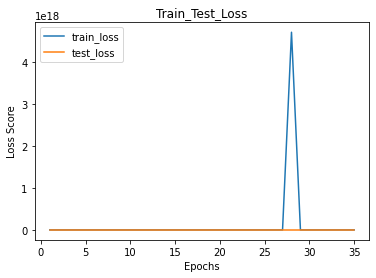

36
Train Epoch: 36 [0/7471 (0%)]	Loss: 47863.550781
Train Epoch: 36 [160/7471 (2%)]	Loss: 2509404023520980107264.000000
Train Epoch: 36 [320/7471 (4%)]	Loss: 86770270798348288.000000
Train Epoch: 36 [480/7471 (6%)]	Loss: 879962630389760.000000
Train Epoch: 36 [640/7471 (9%)]	Loss: 1096740.875000
Train Epoch: 36 [800/7471 (11%)]	Loss: 112419.257812
Train Epoch: 36 [960/7471 (13%)]	Loss: 29896140.000000
Train Epoch: 36 [1120/7471 (15%)]	Loss: 225531.390625
Train Epoch: 36 [1280/7471 (17%)]	Loss: 213244.031250
Train Epoch: 36 [1440/7471 (19%)]	Loss: 1556278.000000
Train Epoch: 36 [1600/7471 (21%)]	Loss: 412326.000000
Train Epoch: 36 [1760/7471 (24%)]	Loss: 88601.148438
Train Epoch: 36 [1920/7471 (26%)]	Loss: 455238.281250
Train Epoch: 36 [2080/7471 (28%)]	Loss: 940919.750000
Train Epoch: 36 [2240/7471 (30%)]	Loss: 95268.093750
Train Epoch: 36 [2400/7471 (32%)]	Loss: 27484928.000000
Train Epoch: 36 [2560/7471 (34%)]	Loss: 32232482.000000
Train Epoch: 36 [2720/7471 (36%)]	Loss: 767332733419

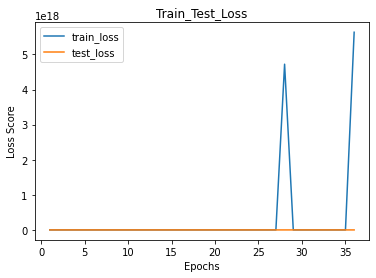

37
Train Epoch: 37 [0/7471 (0%)]	Loss: 383580.812500
Train Epoch: 37 [160/7471 (2%)]	Loss: 8062486708224.000000
Train Epoch: 37 [320/7471 (4%)]	Loss: 83022858682368.000000
Train Epoch: 37 [480/7471 (6%)]	Loss: 77370463617024.000000
Train Epoch: 37 [640/7471 (9%)]	Loss: 101536.164062
Train Epoch: 37 [800/7471 (11%)]	Loss: 111562192.000000
Train Epoch: 37 [960/7471 (13%)]	Loss: 251270384320512.000000
Train Epoch: 37 [1120/7471 (15%)]	Loss: 416875.937500
Train Epoch: 37 [1280/7471 (17%)]	Loss: 1385987825467392.000000
Train Epoch: 37 [1440/7471 (19%)]	Loss: 89813.593750
Train Epoch: 37 [1600/7471 (21%)]	Loss: 74478.921875
Train Epoch: 37 [1760/7471 (24%)]	Loss: 62862516.000000
Train Epoch: 37 [1920/7471 (26%)]	Loss: 3585358168064.000000
Train Epoch: 37 [2080/7471 (28%)]	Loss: 176331.187500
Train Epoch: 37 [2240/7471 (30%)]	Loss: 32249846.000000
Train Epoch: 37 [2400/7471 (32%)]	Loss: 72415.234375
Train Epoch: 37 [2560/7471 (34%)]	Loss: 219084.625000
Train Epoch: 37 [2720/7471 (36%)]	Loss: 

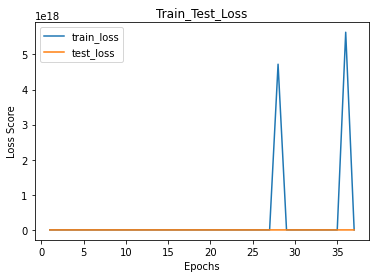

38
Train Epoch: 38 [0/7471 (0%)]	Loss: 90012.984375
Train Epoch: 38 [160/7471 (2%)]	Loss: 53492192.000000
Train Epoch: 38 [320/7471 (4%)]	Loss: 99027.640625
Train Epoch: 38 [480/7471 (6%)]	Loss: 89396.789062
Train Epoch: 38 [640/7471 (9%)]	Loss: 62543540.000000
Train Epoch: 38 [800/7471 (11%)]	Loss: 12938124460032.000000
Train Epoch: 38 [960/7471 (13%)]	Loss: 103548472.000000
Train Epoch: 38 [1120/7471 (15%)]	Loss: 57545720856576.000000
Train Epoch: 38 [1280/7471 (17%)]	Loss: 1153117.250000
Train Epoch: 38 [1440/7471 (19%)]	Loss: 663637.875000
Train Epoch: 38 [1600/7471 (21%)]	Loss: 78592.437500
Train Epoch: 38 [1760/7471 (24%)]	Loss: 518255.593750
Train Epoch: 38 [1920/7471 (26%)]	Loss: 517579.968750
Train Epoch: 38 [2080/7471 (28%)]	Loss: 8115715571712.000000
Train Epoch: 38 [2240/7471 (30%)]	Loss: 5390248443904.000000
Train Epoch: 38 [2400/7471 (32%)]	Loss: 401928.875000
Train Epoch: 38 [2560/7471 (34%)]	Loss: 51935224.000000
Train Epoch: 38 [2720/7471 (36%)]	Loss: 78299569061888.00

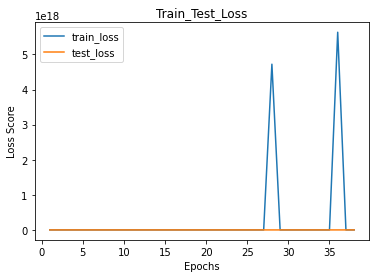

39
Train Epoch: 39 [0/7471 (0%)]	Loss: 306230497116160.000000
Train Epoch: 39 [160/7471 (2%)]	Loss: 60707224.000000
Train Epoch: 39 [320/7471 (4%)]	Loss: 74140080.000000
Train Epoch: 39 [480/7471 (6%)]	Loss: 147583.890625
Train Epoch: 39 [640/7471 (9%)]	Loss: 385394.437500
Train Epoch: 39 [800/7471 (11%)]	Loss: 550366.000000
Train Epoch: 39 [960/7471 (13%)]	Loss: 62772809302016.000000
Train Epoch: 39 [1120/7471 (15%)]	Loss: 776389.625000
Train Epoch: 39 [1280/7471 (17%)]	Loss: 83842.179688
Train Epoch: 39 [1440/7471 (19%)]	Loss: 3601202675712.000000
Train Epoch: 39 [1600/7471 (21%)]	Loss: 65513.378906
Train Epoch: 39 [1760/7471 (24%)]	Loss: 72789.531250
Train Epoch: 39 [1920/7471 (26%)]	Loss: 2604719.750000
Train Epoch: 39 [2080/7471 (28%)]	Loss: 1144307.375000
Train Epoch: 39 [2240/7471 (30%)]	Loss: 55056552427520.000000
Train Epoch: 39 [2400/7471 (32%)]	Loss: 69958848.000000
Train Epoch: 39 [2560/7471 (34%)]	Loss: 63328216.000000
Train Epoch: 39 [2720/7471 (36%)]	Loss: 238984.937500


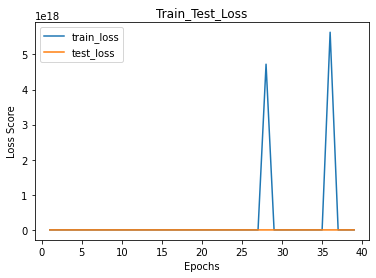

40
Train Epoch: 40 [0/7471 (0%)]	Loss: 844654.625000
Train Epoch: 40 [160/7471 (2%)]	Loss: 103206.046875
Train Epoch: 40 [320/7471 (4%)]	Loss: 86382.828125
Train Epoch: 40 [480/7471 (6%)]	Loss: 12914353242112.000000
Train Epoch: 40 [640/7471 (9%)]	Loss: 251192.578125
Train Epoch: 40 [800/7471 (11%)]	Loss: 75984883679232.000000
Train Epoch: 40 [960/7471 (13%)]	Loss: 54941003546624.000000
Train Epoch: 40 [1120/7471 (15%)]	Loss: 58920896.000000
Train Epoch: 40 [1280/7471 (17%)]	Loss: 46946864.000000
Train Epoch: 40 [1440/7471 (19%)]	Loss: 118767.453125
Train Epoch: 40 [1600/7471 (21%)]	Loss: 102660.468750
Train Epoch: 40 [1760/7471 (24%)]	Loss: 212197.812500
Train Epoch: 40 [1920/7471 (26%)]	Loss: 50752324.000000
Train Epoch: 40 [2080/7471 (28%)]	Loss: 33556136.000000
Train Epoch: 40 [2240/7471 (30%)]	Loss: 97926.078125
Train Epoch: 40 [2400/7471 (32%)]	Loss: 209952.828125
Train Epoch: 40 [2560/7471 (34%)]	Loss: 74295408.000000
Train Epoch: 40 [2720/7471 (36%)]	Loss: 3544323981312.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


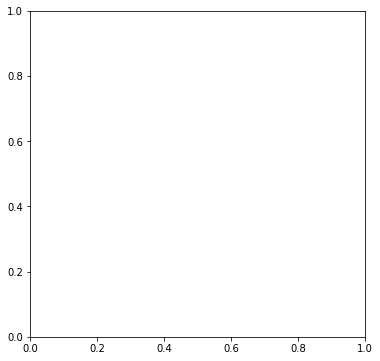

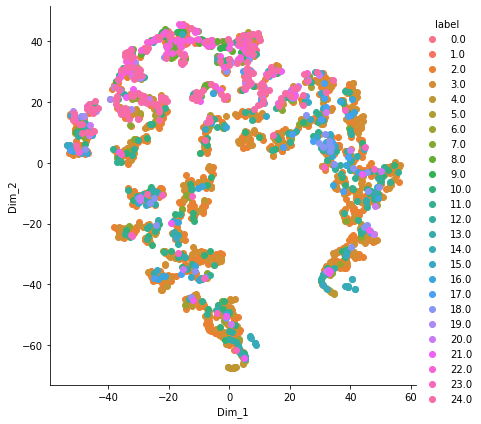

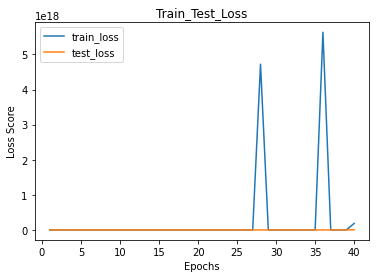

41
Train Epoch: 41 [0/7471 (0%)]	Loss: 35045560893308928.000000
Train Epoch: 41 [160/7471 (2%)]	Loss: 28959032.000000
Train Epoch: 41 [320/7471 (4%)]	Loss: 222763856.000000
Train Epoch: 41 [480/7471 (6%)]	Loss: 18190172.000000
Train Epoch: 41 [640/7471 (9%)]	Loss: 5499338.000000
Train Epoch: 41 [800/7471 (11%)]	Loss: 43355268.000000
Train Epoch: 41 [960/7471 (13%)]	Loss: 12390523.000000
Train Epoch: 41 [1120/7471 (15%)]	Loss: 21000238298824704.000000
Train Epoch: 41 [1280/7471 (17%)]	Loss: 17409364.000000
Train Epoch: 41 [1440/7471 (19%)]	Loss: 15095430.000000
Train Epoch: 41 [1600/7471 (21%)]	Loss: 12036930.000000
Train Epoch: 41 [1760/7471 (24%)]	Loss: 10768013.000000
Train Epoch: 41 [1920/7471 (26%)]	Loss: 1445933824.000000
Train Epoch: 41 [2080/7471 (28%)]	Loss: 34425981796089856.000000
Train Epoch: 41 [2240/7471 (30%)]	Loss: 1900220928.000000
Train Epoch: 41 [2400/7471 (32%)]	Loss: 17447476.000000
Train Epoch: 41 [2560/7471 (34%)]	Loss: 2092670848.000000
Train Epoch: 41 [2720/7471

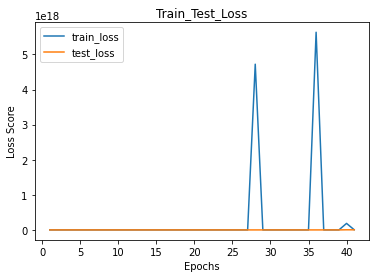

42
Train Epoch: 42 [0/7471 (0%)]	Loss: 20882778.000000
Train Epoch: 42 [160/7471 (2%)]	Loss: 26797484223234048.000000
Train Epoch: 42 [320/7471 (4%)]	Loss: 3163371.250000
Train Epoch: 42 [480/7471 (6%)]	Loss: 11832198.000000
Train Epoch: 42 [640/7471 (9%)]	Loss: 233541008.000000
Train Epoch: 42 [800/7471 (11%)]	Loss: 2018784.375000
Train Epoch: 42 [960/7471 (13%)]	Loss: 4516747.000000
Train Epoch: 42 [1120/7471 (15%)]	Loss: 3208085287993344.000000
Train Epoch: 42 [1280/7471 (17%)]	Loss: 818882088534016.000000
Train Epoch: 42 [1440/7471 (19%)]	Loss: 568288128008192.000000
Train Epoch: 42 [1600/7471 (21%)]	Loss: 2472100352.000000
Train Epoch: 42 [1760/7471 (24%)]	Loss: 1724884.625000
Train Epoch: 42 [1920/7471 (26%)]	Loss: 1367441.875000
Train Epoch: 42 [2080/7471 (28%)]	Loss: 3847663.500000
Train Epoch: 42 [2240/7471 (30%)]	Loss: 2983132.250000
Train Epoch: 42 [2400/7471 (32%)]	Loss: 5321200.000000
Train Epoch: 42 [2560/7471 (34%)]	Loss: 1862959.875000
Train Epoch: 42 [2720/7471 (36%)]	

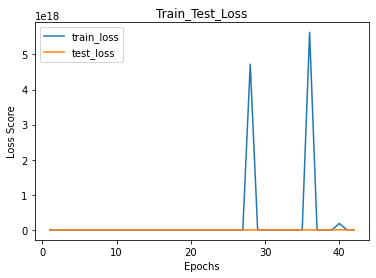

43
Train Epoch: 43 [0/7471 (0%)]	Loss: 1228153856.000000
Train Epoch: 43 [160/7471 (2%)]	Loss: 2184911616.000000
Train Epoch: 43 [320/7471 (4%)]	Loss: 480681.093750
Train Epoch: 43 [480/7471 (6%)]	Loss: 28008348.000000
Train Epoch: 43 [640/7471 (9%)]	Loss: 1741121536.000000
Train Epoch: 43 [800/7471 (11%)]	Loss: 576481.437500
Train Epoch: 43 [960/7471 (13%)]	Loss: 1470450.500000
Train Epoch: 43 [1120/7471 (15%)]	Loss: 343202.875000
Train Epoch: 43 [1280/7471 (17%)]	Loss: 2308162.250000
Train Epoch: 43 [1440/7471 (19%)]	Loss: 652149.812500
Train Epoch: 43 [1600/7471 (21%)]	Loss: 642176.875000
Train Epoch: 43 [1760/7471 (24%)]	Loss: 3534347264.000000
Train Epoch: 43 [1920/7471 (26%)]	Loss: 460024736.000000
Train Epoch: 43 [2080/7471 (28%)]	Loss: 1548752.625000
Train Epoch: 43 [2240/7471 (30%)]	Loss: 8344924.000000
Train Epoch: 43 [2400/7471 (32%)]	Loss: 1039853888.000000
Train Epoch: 43 [2560/7471 (34%)]	Loss: 2337790.500000
Train Epoch: 43 [2720/7471 (36%)]	Loss: 594897.562500
Train Epo

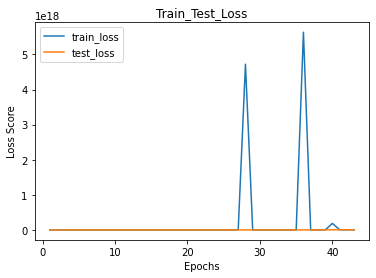

44
Train Epoch: 44 [0/7471 (0%)]	Loss: 414010.375000
Train Epoch: 44 [160/7471 (2%)]	Loss: 566747.562500
Train Epoch: 44 [320/7471 (4%)]	Loss: 1103930.250000
Train Epoch: 44 [480/7471 (6%)]	Loss: 2049644.500000
Train Epoch: 44 [640/7471 (9%)]	Loss: 589119.312500
Train Epoch: 44 [800/7471 (11%)]	Loss: 176936093483008.000000
Train Epoch: 44 [960/7471 (13%)]	Loss: 1432360318926848.000000
Train Epoch: 44 [1120/7471 (15%)]	Loss: 1278102.500000
Train Epoch: 44 [1280/7471 (17%)]	Loss: 15487439468494848.000000
Train Epoch: 44 [1440/7471 (19%)]	Loss: 411390.500000
Train Epoch: 44 [1600/7471 (21%)]	Loss: 1343329.125000
Train Epoch: 44 [1760/7471 (24%)]	Loss: 305160.781250
Train Epoch: 44 [1920/7471 (26%)]	Loss: 3112125.750000
Train Epoch: 44 [2080/7471 (28%)]	Loss: 1454195.500000
Train Epoch: 44 [2240/7471 (30%)]	Loss: 1366546048.000000
Train Epoch: 44 [2400/7471 (32%)]	Loss: 407204.375000
Train Epoch: 44 [2560/7471 (34%)]	Loss: 1327043694297088.000000
Train Epoch: 44 [2720/7471 (36%)]	Loss: 458

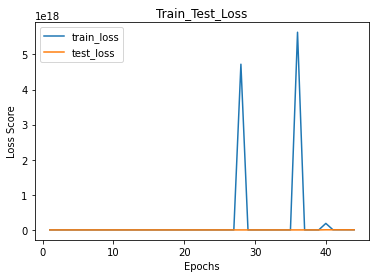

45
Train Epoch: 45 [0/7471 (0%)]	Loss: 1612469.125000
Train Epoch: 45 [160/7471 (2%)]	Loss: 119892887994368.000000
Train Epoch: 45 [320/7471 (4%)]	Loss: 125233.640625
Train Epoch: 45 [480/7471 (6%)]	Loss: 948818816.000000
Train Epoch: 45 [640/7471 (9%)]	Loss: 4338382.000000
Train Epoch: 45 [800/7471 (11%)]	Loss: 285844512.000000
Train Epoch: 45 [960/7471 (13%)]	Loss: 23161581806288896.000000
Train Epoch: 45 [1120/7471 (15%)]	Loss: 170487.312500
Train Epoch: 45 [1280/7471 (17%)]	Loss: 554112.625000
Train Epoch: 45 [1440/7471 (19%)]	Loss: 167109.718750
Train Epoch: 45 [1600/7471 (21%)]	Loss: 168103.953125
Train Epoch: 45 [1760/7471 (24%)]	Loss: 836859136.000000
Train Epoch: 45 [1920/7471 (26%)]	Loss: 2795706687422464.000000
Train Epoch: 45 [2080/7471 (28%)]	Loss: 260460608.000000
Train Epoch: 45 [2240/7471 (30%)]	Loss: 984040320.000000
Train Epoch: 45 [2400/7471 (32%)]	Loss: 59186834571264.000000
Train Epoch: 45 [2560/7471 (34%)]	Loss: 1919480.000000
Train Epoch: 45 [2720/7471 (36%)]	Los

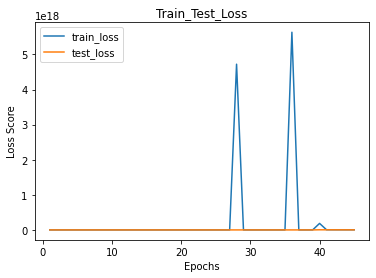

46
Train Epoch: 46 [0/7471 (0%)]	Loss: 433977728.000000
Train Epoch: 46 [160/7471 (2%)]	Loss: 829346.687500
Train Epoch: 46 [320/7471 (4%)]	Loss: 80272.617188
Train Epoch: 46 [480/7471 (6%)]	Loss: 311627968.000000
Train Epoch: 46 [640/7471 (9%)]	Loss: 1318526.375000
Train Epoch: 46 [800/7471 (11%)]	Loss: 38218594516992.000000
Train Epoch: 46 [960/7471 (13%)]	Loss: 566538.312500
Train Epoch: 46 [1120/7471 (15%)]	Loss: 162521.750000
Train Epoch: 46 [1280/7471 (17%)]	Loss: 1479407.250000
Train Epoch: 46 [1440/7471 (19%)]	Loss: 21509393786863616.000000
Train Epoch: 46 [1600/7471 (21%)]	Loss: 4732750.000000
Train Epoch: 46 [1760/7471 (24%)]	Loss: 86195.562500
Train Epoch: 46 [1920/7471 (26%)]	Loss: 82232.000000
Train Epoch: 46 [2080/7471 (28%)]	Loss: 354414656.000000
Train Epoch: 46 [2240/7471 (30%)]	Loss: 577415.750000
Train Epoch: 46 [2400/7471 (32%)]	Loss: 408538816.000000
Train Epoch: 46 [2560/7471 (34%)]	Loss: 158903.062500
Train Epoch: 46 [2720/7471 (36%)]	Loss: 97747.562500
Train Epo

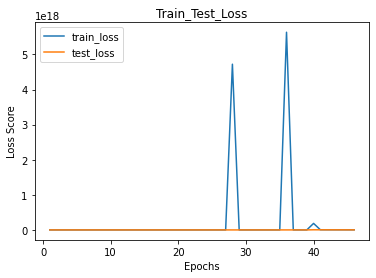

47
Train Epoch: 47 [0/7471 (0%)]	Loss: 1305852.125000
Train Epoch: 47 [160/7471 (2%)]	Loss: 68315.609375
Train Epoch: 47 [320/7471 (4%)]	Loss: 4016201.000000
Train Epoch: 47 [480/7471 (6%)]	Loss: 708634.125000
Train Epoch: 47 [640/7471 (9%)]	Loss: 71409.312500
Train Epoch: 47 [800/7471 (11%)]	Loss: 1376682.875000
Train Epoch: 47 [960/7471 (13%)]	Loss: 1468679936.000000
Train Epoch: 47 [1120/7471 (15%)]	Loss: 453246.968750
Train Epoch: 47 [1280/7471 (17%)]	Loss: 998648.312500
Train Epoch: 47 [1440/7471 (19%)]	Loss: 1735721.125000
Train Epoch: 47 [1600/7471 (21%)]	Loss: 537317888.000000
Train Epoch: 47 [1760/7471 (24%)]	Loss: 57879185439326208.000000
Train Epoch: 47 [1920/7471 (26%)]	Loss: 1487798.250000
Train Epoch: 47 [2080/7471 (28%)]	Loss: 124266.265625
Train Epoch: 47 [2240/7471 (30%)]	Loss: 2406448164241408.000000
Train Epoch: 47 [2400/7471 (32%)]	Loss: 67718.429688
Train Epoch: 47 [2560/7471 (34%)]	Loss: 177715.656250
Train Epoch: 47 [2720/7471 (36%)]	Loss: 53784996.000000
Train E

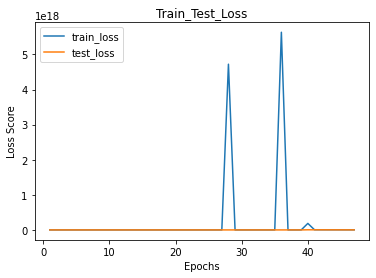

48
Train Epoch: 48 [0/7471 (0%)]	Loss: 1306634.750000
Train Epoch: 48 [160/7471 (2%)]	Loss: 53843108.000000
Train Epoch: 48 [320/7471 (4%)]	Loss: 361587232.000000
Train Epoch: 48 [480/7471 (6%)]	Loss: 272342528.000000
Train Epoch: 48 [640/7471 (9%)]	Loss: 665340.625000
Train Epoch: 48 [800/7471 (11%)]	Loss: 12632261132288.000000
Train Epoch: 48 [960/7471 (13%)]	Loss: 9171943462797312.000000
Train Epoch: 48 [1120/7471 (15%)]	Loss: 48478464.000000
Train Epoch: 48 [1280/7471 (17%)]	Loss: 3210838.250000
Train Epoch: 48 [1440/7471 (19%)]	Loss: 147544.437500
Train Epoch: 48 [1600/7471 (21%)]	Loss: 124563.781250
Train Epoch: 48 [1760/7471 (24%)]	Loss: 207029248.000000
Train Epoch: 48 [1920/7471 (26%)]	Loss: 221369712.000000
Train Epoch: 48 [2080/7471 (28%)]	Loss: 14801754390528.000000
Train Epoch: 48 [2240/7471 (30%)]	Loss: 1193414272.000000
Train Epoch: 48 [2400/7471 (32%)]	Loss: 471997440.000000
Train Epoch: 48 [2560/7471 (34%)]	Loss: 446443168.000000
Train Epoch: 48 [2720/7471 (36%)]	Loss:

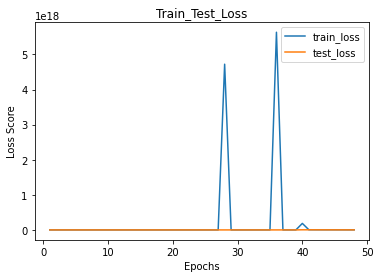

49
Train Epoch: 49 [0/7471 (0%)]	Loss: 77784488.000000
Train Epoch: 49 [160/7471 (2%)]	Loss: 222273.562500
Train Epoch: 49 [320/7471 (4%)]	Loss: 48652221297983488.000000
Train Epoch: 49 [480/7471 (6%)]	Loss: 480947072.000000
Train Epoch: 49 [640/7471 (9%)]	Loss: 176377472.000000
Train Epoch: 49 [800/7471 (11%)]	Loss: 159356.046875
Train Epoch: 49 [960/7471 (13%)]	Loss: 87993.976562
Train Epoch: 49 [1120/7471 (15%)]	Loss: 14021653029715968.000000
Train Epoch: 49 [1280/7471 (17%)]	Loss: 225858816.000000
Train Epoch: 49 [1440/7471 (19%)]	Loss: 61118.277344
Train Epoch: 49 [1600/7471 (21%)]	Loss: 925236.000000
Train Epoch: 49 [1760/7471 (24%)]	Loss: 235110.578125
Train Epoch: 49 [1920/7471 (26%)]	Loss: 223469.093750
Train Epoch: 49 [2080/7471 (28%)]	Loss: 147937866809344.000000
Train Epoch: 49 [2240/7471 (30%)]	Loss: 148366.468750
Train Epoch: 49 [2400/7471 (32%)]	Loss: 1544183.125000
Train Epoch: 49 [2560/7471 (34%)]	Loss: 348195.906250
Train Epoch: 49 [2720/7471 (36%)]	Loss: 525418046160

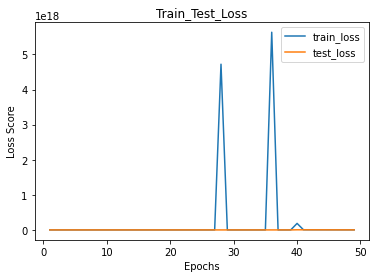

50
Train Epoch: 50 [0/7471 (0%)]	Loss: 71606.687500
Train Epoch: 50 [160/7471 (2%)]	Loss: 4209510187008.000000
Train Epoch: 50 [320/7471 (4%)]	Loss: 93741.625000
Train Epoch: 50 [480/7471 (6%)]	Loss: 83544.093750
Train Epoch: 50 [640/7471 (9%)]	Loss: 74520.632812
Train Epoch: 50 [800/7471 (11%)]	Loss: 963214.250000
Train Epoch: 50 [960/7471 (13%)]	Loss: 74397.281250
Train Epoch: 50 [1120/7471 (15%)]	Loss: 1215089197711360.000000
Train Epoch: 50 [1280/7471 (17%)]	Loss: 96391.390625
Train Epoch: 50 [1440/7471 (19%)]	Loss: 967283.250000
Train Epoch: 50 [1600/7471 (21%)]	Loss: 105215.414062
Train Epoch: 50 [1760/7471 (24%)]	Loss: 1097368.500000
Train Epoch: 50 [1920/7471 (26%)]	Loss: 4110577565696.000000
Train Epoch: 50 [2080/7471 (28%)]	Loss: 483866720.000000
Train Epoch: 50 [2240/7471 (30%)]	Loss: 89687.937500
Train Epoch: 50 [2400/7471 (32%)]	Loss: 4787493928960.000000
Train Epoch: 50 [2560/7471 (34%)]	Loss: 1538848.625000
Train Epoch: 50 [2720/7471 (36%)]	Loss: 24722690.000000
Train Ep

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


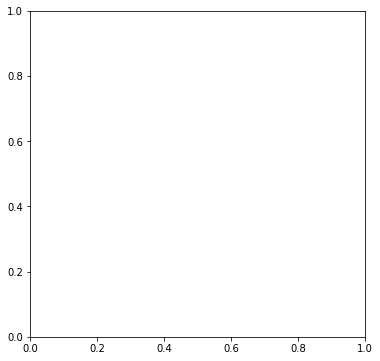

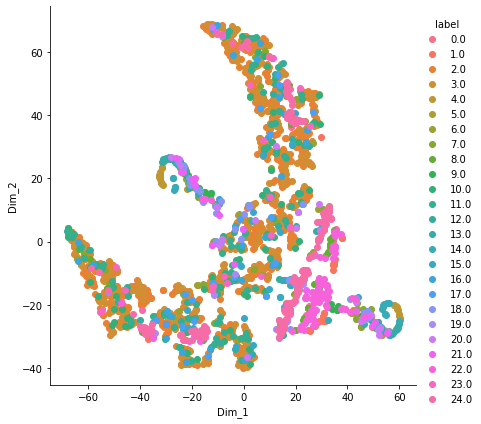

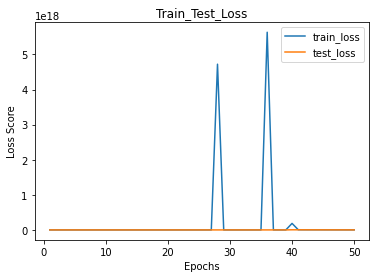

51
Train Epoch: 51 [0/7471 (0%)]	Loss: 129616.281250
Train Epoch: 51 [160/7471 (2%)]	Loss: 1129036.625000
Train Epoch: 51 [320/7471 (4%)]	Loss: 113662.421875
Train Epoch: 51 [480/7471 (6%)]	Loss: 538068.812500
Train Epoch: 51 [640/7471 (9%)]	Loss: 320212696039424.000000
Train Epoch: 51 [800/7471 (11%)]	Loss: 7290672625221632.000000
Train Epoch: 51 [960/7471 (13%)]	Loss: 147982.312500
Train Epoch: 51 [1120/7471 (15%)]	Loss: 135500.953125
Train Epoch: 51 [1280/7471 (17%)]	Loss: 112526.539062
Train Epoch: 51 [1440/7471 (19%)]	Loss: 100857.843750
Train Epoch: 51 [1600/7471 (21%)]	Loss: 447321.125000
Train Epoch: 51 [1760/7471 (24%)]	Loss: 3252429.250000
Train Epoch: 51 [1920/7471 (26%)]	Loss: 9177680465362944.000000
Train Epoch: 51 [2080/7471 (28%)]	Loss: 144583.687500
Train Epoch: 51 [2240/7471 (30%)]	Loss: 308787.812500
Train Epoch: 51 [2400/7471 (32%)]	Loss: 8426412302139392.000000
Train Epoch: 51 [2560/7471 (34%)]	Loss: 99845.984375
Train Epoch: 51 [2720/7471 (36%)]	Loss: 8882428844179

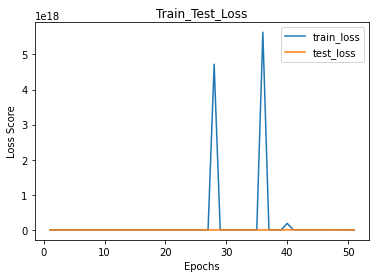

52
Train Epoch: 52 [0/7471 (0%)]	Loss: 402753536.000000
Train Epoch: 52 [160/7471 (2%)]	Loss: 1241474.125000
Train Epoch: 52 [320/7471 (4%)]	Loss: 258131.250000
Train Epoch: 52 [480/7471 (6%)]	Loss: 404165.312500
Train Epoch: 52 [640/7471 (9%)]	Loss: 226097.421875
Train Epoch: 52 [800/7471 (11%)]	Loss: 7767396278337536.000000
Train Epoch: 52 [960/7471 (13%)]	Loss: 342260.218750
Train Epoch: 52 [1120/7471 (15%)]	Loss: 291321600.000000
Train Epoch: 52 [1280/7471 (17%)]	Loss: 708228.062500
Train Epoch: 52 [1440/7471 (19%)]	Loss: 1510799.875000
Train Epoch: 52 [1600/7471 (21%)]	Loss: 1120083640320.000000
Train Epoch: 52 [1760/7471 (24%)]	Loss: 137954.500000
Train Epoch: 52 [1920/7471 (26%)]	Loss: 376839.781250
Train Epoch: 52 [2080/7471 (28%)]	Loss: 16822230016.000000
Train Epoch: 52 [2240/7471 (30%)]	Loss: 718425.437500
Train Epoch: 52 [2400/7471 (32%)]	Loss: 193279.015625
Train Epoch: 52 [2560/7471 (34%)]	Loss: 170251.765625
Train Epoch: 52 [2720/7471 (36%)]	Loss: 405753216.000000
Train 

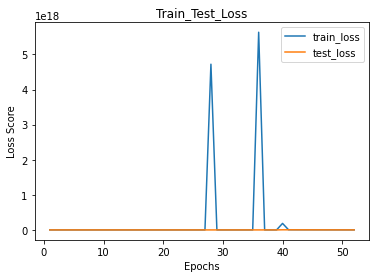

53
Train Epoch: 53 [0/7471 (0%)]	Loss: 433949152.000000
Train Epoch: 53 [160/7471 (2%)]	Loss: 67953693294592.000000
Train Epoch: 53 [320/7471 (4%)]	Loss: 223874.687500
Train Epoch: 53 [480/7471 (6%)]	Loss: 392195584.000000
Train Epoch: 53 [640/7471 (9%)]	Loss: 359601.000000
Train Epoch: 53 [800/7471 (11%)]	Loss: 66766852063232.000000
Train Epoch: 53 [960/7471 (13%)]	Loss: 246788.828125
Train Epoch: 53 [1120/7471 (15%)]	Loss: 271474.718750
Train Epoch: 53 [1280/7471 (17%)]	Loss: 244049.109375
Train Epoch: 53 [1440/7471 (19%)]	Loss: 209339.343750
Train Epoch: 53 [1600/7471 (21%)]	Loss: 213078.312500
Train Epoch: 53 [1760/7471 (24%)]	Loss: 555912.625000
Train Epoch: 53 [1920/7471 (26%)]	Loss: 6614471900397568.000000
Train Epoch: 53 [2080/7471 (28%)]	Loss: 347767.656250
Train Epoch: 53 [2240/7471 (30%)]	Loss: 480292.125000
Train Epoch: 53 [2400/7471 (32%)]	Loss: 343919.062500
Train Epoch: 53 [2560/7471 (34%)]	Loss: 993184.812500
Train Epoch: 53 [2720/7471 (36%)]	Loss: 984949.187500
Train E

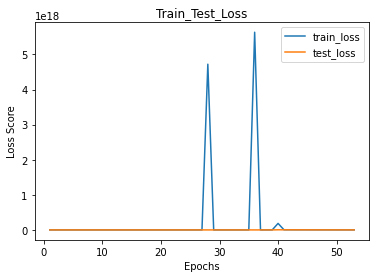

54
Train Epoch: 54 [0/7471 (0%)]	Loss: 50013744922624.000000
Train Epoch: 54 [160/7471 (2%)]	Loss: 455091.343750
Train Epoch: 54 [320/7471 (4%)]	Loss: 49124440.000000
Train Epoch: 54 [480/7471 (6%)]	Loss: 425957.562500
Train Epoch: 54 [640/7471 (9%)]	Loss: 3505851075657728.000000
Train Epoch: 54 [800/7471 (11%)]	Loss: 11997222.000000
Train Epoch: 54 [960/7471 (13%)]	Loss: 47908992.000000
Train Epoch: 54 [1120/7471 (15%)]	Loss: 466783840.000000
Train Epoch: 54 [1280/7471 (17%)]	Loss: 5929739.000000
Train Epoch: 54 [1440/7471 (19%)]	Loss: 1480881.500000
Train Epoch: 54 [1600/7471 (21%)]	Loss: 22528802.000000
Train Epoch: 54 [1760/7471 (24%)]	Loss: 1372767.750000
Train Epoch: 54 [1920/7471 (26%)]	Loss: 1527115.250000
Train Epoch: 54 [2080/7471 (28%)]	Loss: 675605.562500
Train Epoch: 54 [2240/7471 (30%)]	Loss: 572517.687500
Train Epoch: 54 [2400/7471 (32%)]	Loss: 301504495616.000000
Train Epoch: 54 [2560/7471 (34%)]	Loss: 1533981.125000
Train Epoch: 54 [2720/7471 (36%)]	Loss: 576976.625000

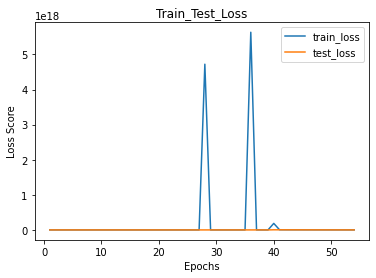

55
Train Epoch: 55 [0/7471 (0%)]	Loss: 733137.750000
Train Epoch: 55 [160/7471 (2%)]	Loss: 651524.562500
Train Epoch: 55 [320/7471 (4%)]	Loss: 1013895.312500
Train Epoch: 55 [480/7471 (6%)]	Loss: 1077762.500000
Train Epoch: 55 [640/7471 (9%)]	Loss: 628962.750000
Train Epoch: 55 [800/7471 (11%)]	Loss: 357048832.000000
Train Epoch: 55 [960/7471 (13%)]	Loss: 300401248.000000
Train Epoch: 55 [1120/7471 (15%)]	Loss: 732161.312500
Train Epoch: 55 [1280/7471 (17%)]	Loss: 196367568.000000
Train Epoch: 55 [1440/7471 (19%)]	Loss: 463619.906250
Train Epoch: 55 [1600/7471 (21%)]	Loss: 1032924.625000
Train Epoch: 55 [1760/7471 (24%)]	Loss: 4552301.000000
Train Epoch: 55 [1920/7471 (26%)]	Loss: 841070080.000000
Train Epoch: 55 [2080/7471 (28%)]	Loss: 32448452755456.000000
Train Epoch: 55 [2240/7471 (30%)]	Loss: 977617.562500
Train Epoch: 55 [2400/7471 (32%)]	Loss: 228312784.000000
Train Epoch: 55 [2560/7471 (34%)]	Loss: 745303.500000
Train Epoch: 55 [2720/7471 (36%)]	Loss: 2666431.000000
Train Epoch

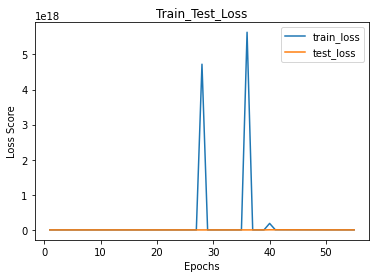

56
Train Epoch: 56 [0/7471 (0%)]	Loss: 77037680.000000
Train Epoch: 56 [160/7471 (2%)]	Loss: 995314.812500
Train Epoch: 56 [320/7471 (4%)]	Loss: 2498052.250000
Train Epoch: 56 [480/7471 (6%)]	Loss: 1371565.875000
Train Epoch: 56 [640/7471 (9%)]	Loss: 8824569200640.000000
Train Epoch: 56 [800/7471 (11%)]	Loss: 66783124.000000
Train Epoch: 56 [960/7471 (13%)]	Loss: 142565752832.000000
Train Epoch: 56 [1120/7471 (15%)]	Loss: 2180954328137728.000000
Train Epoch: 56 [1280/7471 (17%)]	Loss: 2194240272596992.000000
Train Epoch: 56 [1440/7471 (19%)]	Loss: 3303155462832128.000000
Train Epoch: 56 [1600/7471 (21%)]	Loss: 151185200.000000
Train Epoch: 56 [1760/7471 (24%)]	Loss: 2297908.000000
Train Epoch: 56 [1920/7471 (26%)]	Loss: 206770400.000000
Train Epoch: 56 [2080/7471 (28%)]	Loss: 3359271358038016.000000
Train Epoch: 56 [2240/7471 (30%)]	Loss: 2324477.750000
Train Epoch: 56 [2400/7471 (32%)]	Loss: 1515501.750000
Train Epoch: 56 [2560/7471 (34%)]	Loss: 2059181.625000
Train Epoch: 56 [2720/74

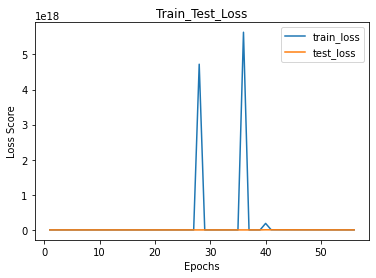

57
Train Epoch: 57 [0/7471 (0%)]	Loss: 3134611.500000
Train Epoch: 57 [160/7471 (2%)]	Loss: 82847824.000000
Train Epoch: 57 [320/7471 (4%)]	Loss: 92503605248.000000
Train Epoch: 57 [480/7471 (6%)]	Loss: 4518043.000000
Train Epoch: 57 [640/7471 (9%)]	Loss: 5816304.000000
Train Epoch: 57 [800/7471 (11%)]	Loss: 2433827.250000
Train Epoch: 57 [960/7471 (13%)]	Loss: 35789624.000000
Train Epoch: 57 [1120/7471 (15%)]	Loss: 3903914.750000
Train Epoch: 57 [1280/7471 (17%)]	Loss: 30345198.000000
Train Epoch: 57 [1440/7471 (19%)]	Loss: 4602232.500000
Train Epoch: 57 [1600/7471 (21%)]	Loss: 2527676300525568.000000
Train Epoch: 57 [1760/7471 (24%)]	Loss: 2437127.500000
Train Epoch: 57 [1920/7471 (26%)]	Loss: 3672427.250000
Train Epoch: 57 [2080/7471 (28%)]	Loss: 6583119.500000
Train Epoch: 57 [2240/7471 (30%)]	Loss: 3472567.750000
Train Epoch: 57 [2400/7471 (32%)]	Loss: 53532968.000000
Train Epoch: 57 [2560/7471 (34%)]	Loss: 14178277602099200.000000
Train Epoch: 57 [2720/7471 (36%)]	Loss: 3303839.0

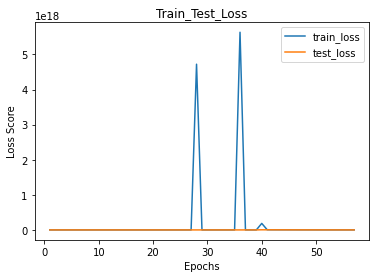

58
Train Epoch: 58 [0/7471 (0%)]	Loss: 7305020.500000
Train Epoch: 58 [160/7471 (2%)]	Loss: 8649922.000000
Train Epoch: 58 [320/7471 (4%)]	Loss: 58853257216.000000
Train Epoch: 58 [480/7471 (6%)]	Loss: 5659453.000000
Train Epoch: 58 [640/7471 (9%)]	Loss: 50298192.000000
Train Epoch: 58 [800/7471 (11%)]	Loss: 1906039779753984.000000
Train Epoch: 58 [960/7471 (13%)]	Loss: 336528640.000000
Train Epoch: 58 [1120/7471 (15%)]	Loss: 6810946.000000
Train Epoch: 58 [1280/7471 (17%)]	Loss: 8022185.000000
Train Epoch: 58 [1440/7471 (19%)]	Loss: 6150569.000000
Train Epoch: 58 [1600/7471 (21%)]	Loss: 27071063523328.000000
Train Epoch: 58 [1760/7471 (24%)]	Loss: 8756136.000000
Train Epoch: 58 [1920/7471 (26%)]	Loss: 14340589.000000
Train Epoch: 58 [2080/7471 (28%)]	Loss: 190330416.000000
Train Epoch: 58 [2240/7471 (30%)]	Loss: 9731123.000000
Train Epoch: 58 [2400/7471 (32%)]	Loss: 6319952.000000
Train Epoch: 58 [2560/7471 (34%)]	Loss: 107310152155136.000000
Train Epoch: 58 [2720/7471 (36%)]	Loss: 21

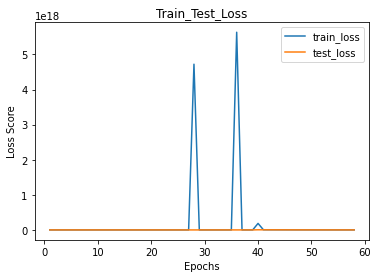

59
Train Epoch: 59 [0/7471 (0%)]	Loss: 11914733.000000
Train Epoch: 59 [160/7471 (2%)]	Loss: 13475293.000000
Train Epoch: 59 [320/7471 (4%)]	Loss: 12435959.000000
Train Epoch: 59 [480/7471 (6%)]	Loss: 56075540.000000
Train Epoch: 59 [640/7471 (9%)]	Loss: 191455984.000000
Train Epoch: 59 [800/7471 (11%)]	Loss: 12564785.000000
Train Epoch: 59 [960/7471 (13%)]	Loss: 20206274.000000
Train Epoch: 59 [1120/7471 (15%)]	Loss: 14860439.000000
Train Epoch: 59 [1280/7471 (17%)]	Loss: 19046464.000000
Train Epoch: 59 [1440/7471 (19%)]	Loss: 10393380.000000
Train Epoch: 59 [1600/7471 (21%)]	Loss: 11031704.000000
Train Epoch: 59 [1760/7471 (24%)]	Loss: 34010836.000000
Train Epoch: 59 [1920/7471 (26%)]	Loss: 8677963071488.000000
Train Epoch: 59 [2080/7471 (28%)]	Loss: 185217824.000000
Train Epoch: 59 [2240/7471 (30%)]	Loss: 15949947.000000
Train Epoch: 59 [2400/7471 (32%)]	Loss: 15191251.000000
Train Epoch: 59 [2560/7471 (34%)]	Loss: 16556710.000000
Train Epoch: 59 [2720/7471 (36%)]	Loss: 15923367.000

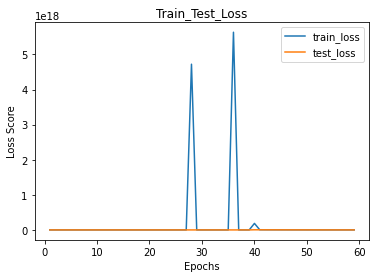

60
Train Epoch: 60 [0/7471 (0%)]	Loss: 44583996.000000
Train Epoch: 60 [160/7471 (2%)]	Loss: 15056890.000000
Train Epoch: 60 [320/7471 (4%)]	Loss: 29304790.000000
Train Epoch: 60 [480/7471 (6%)]	Loss: 1160082746245120.000000
Train Epoch: 60 [640/7471 (9%)]	Loss: 37220588.000000
Train Epoch: 60 [800/7471 (11%)]	Loss: 38441116.000000
Train Epoch: 60 [960/7471 (13%)]	Loss: 28789194.000000
Train Epoch: 60 [1120/7471 (15%)]	Loss: 51406475264.000000
Train Epoch: 60 [1280/7471 (17%)]	Loss: 1317779449839616.000000
Train Epoch: 60 [1440/7471 (19%)]	Loss: 38117552.000000
Train Epoch: 60 [1600/7471 (21%)]	Loss: 30602540.000000
Train Epoch: 60 [1760/7471 (24%)]	Loss: 174472096.000000
Train Epoch: 60 [1920/7471 (26%)]	Loss: 756898798239744.000000
Train Epoch: 60 [2080/7471 (28%)]	Loss: 6021071765504.000000
Train Epoch: 60 [2240/7471 (30%)]	Loss: 19215634.000000
Train Epoch: 60 [2400/7471 (32%)]	Loss: 48836487675904.000000
Train Epoch: 60 [2560/7471 (34%)]	Loss: 456769503494144.000000
Train Epoch: 6

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


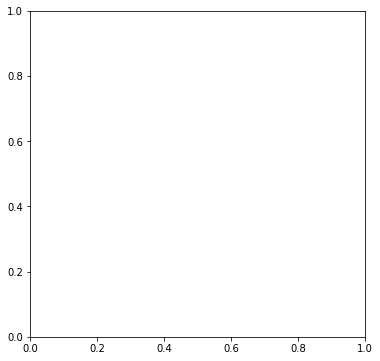

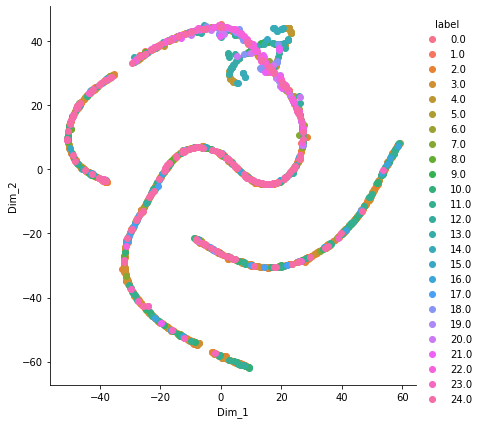

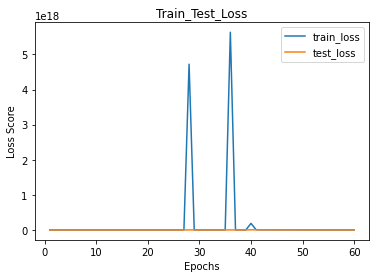

61
Train Epoch: 61 [0/7471 (0%)]	Loss: 74907408.000000
Train Epoch: 61 [160/7471 (2%)]	Loss: 1441854720.000000
Train Epoch: 61 [320/7471 (4%)]	Loss: 62602552.000000
Train Epoch: 61 [480/7471 (6%)]	Loss: 65073900.000000
Train Epoch: 61 [640/7471 (9%)]	Loss: 162878144.000000
Train Epoch: 61 [800/7471 (11%)]	Loss: 46682172.000000
Train Epoch: 61 [960/7471 (13%)]	Loss: 78274984.000000
Train Epoch: 61 [1120/7471 (15%)]	Loss: 255702176.000000
Train Epoch: 61 [1280/7471 (17%)]	Loss: 78608224.000000
Train Epoch: 61 [1440/7471 (19%)]	Loss: 54620324.000000
Train Epoch: 61 [1600/7471 (21%)]	Loss: 59848356.000000
Train Epoch: 61 [1760/7471 (24%)]	Loss: 79636480.000000
Train Epoch: 61 [1920/7471 (26%)]	Loss: 31133466624.000000
Train Epoch: 61 [2080/7471 (28%)]	Loss: 4231814709248.000000
Train Epoch: 61 [2240/7471 (30%)]	Loss: 72579496.000000
Train Epoch: 61 [2400/7471 (32%)]	Loss: 68694200.000000
Train Epoch: 61 [2560/7471 (34%)]	Loss: 11656378368.000000
Train Epoch: 61 [2720/7471 (36%)]	Loss: 1249

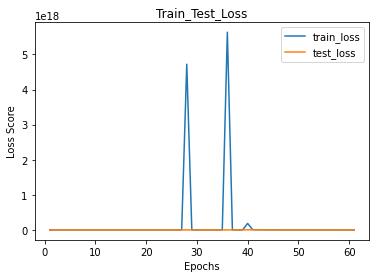

62
Train Epoch: 62 [0/7471 (0%)]	Loss: 112522296.000000
Train Epoch: 62 [160/7471 (2%)]	Loss: 265144496.000000
Train Epoch: 62 [320/7471 (4%)]	Loss: 135046688.000000
Train Epoch: 62 [480/7471 (6%)]	Loss: 3409351278592.000000
Train Epoch: 62 [640/7471 (9%)]	Loss: 13805429760.000000
Train Epoch: 62 [800/7471 (11%)]	Loss: 127561728.000000
Train Epoch: 62 [960/7471 (13%)]	Loss: 104482240.000000
Train Epoch: 62 [1120/7471 (15%)]	Loss: 27539869270016.000000
Train Epoch: 62 [1280/7471 (17%)]	Loss: 551642277609472.000000
Train Epoch: 62 [1440/7471 (19%)]	Loss: 151205216.000000
Train Epoch: 62 [1600/7471 (21%)]	Loss: 33988055924736.000000
Train Epoch: 62 [1760/7471 (24%)]	Loss: 209929248.000000
Train Epoch: 62 [1920/7471 (26%)]	Loss: 139771120.000000
Train Epoch: 62 [2080/7471 (28%)]	Loss: 138030944.000000
Train Epoch: 62 [2240/7471 (30%)]	Loss: 141344736.000000
Train Epoch: 62 [2400/7471 (32%)]	Loss: 148772048.000000
Train Epoch: 62 [2560/7471 (34%)]	Loss: 176960928.000000
Train Epoch: 62 [272

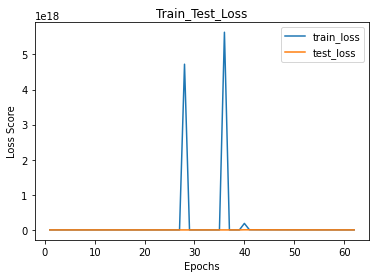

63
Train Epoch: 63 [0/7471 (0%)]	Loss: 244176000.000000
Train Epoch: 63 [160/7471 (2%)]	Loss: 289603264.000000
Train Epoch: 63 [320/7471 (4%)]	Loss: 255121920.000000
Train Epoch: 63 [480/7471 (6%)]	Loss: 2385963909120.000000
Train Epoch: 63 [640/7471 (9%)]	Loss: 2388437237760.000000
Train Epoch: 63 [800/7471 (11%)]	Loss: 255614064.000000
Train Epoch: 63 [960/7471 (13%)]	Loss: 327490528.000000
Train Epoch: 63 [1120/7471 (15%)]	Loss: 264283248.000000
Train Epoch: 63 [1280/7471 (17%)]	Loss: 314926720.000000
Train Epoch: 63 [1440/7471 (19%)]	Loss: 640337920.000000
Train Epoch: 63 [1600/7471 (21%)]	Loss: 373544512.000000
Train Epoch: 63 [1760/7471 (24%)]	Loss: 247359184.000000
Train Epoch: 63 [1920/7471 (26%)]	Loss: 346474176.000000
Train Epoch: 63 [2080/7471 (28%)]	Loss: 372298048.000000
Train Epoch: 63 [2240/7471 (30%)]	Loss: 183674944.000000
Train Epoch: 63 [2400/7471 (32%)]	Loss: 330925440.000000
Train Epoch: 63 [2560/7471 (34%)]	Loss: 236583152.000000
Train Epoch: 63 [2720/7471 (36%)]	

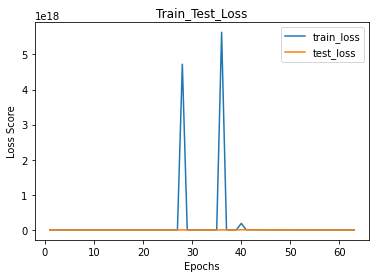

64
Train Epoch: 64 [0/7471 (0%)]	Loss: 489341536.000000
Train Epoch: 64 [160/7471 (2%)]	Loss: 915360832.000000
Train Epoch: 64 [320/7471 (4%)]	Loss: 449544328314880.000000
Train Epoch: 64 [480/7471 (6%)]	Loss: 551370176.000000
Train Epoch: 64 [640/7471 (9%)]	Loss: 1674578231296.000000
Train Epoch: 64 [800/7471 (11%)]	Loss: 613756352.000000
Train Epoch: 64 [960/7471 (13%)]	Loss: 3837602824192.000000
Train Epoch: 64 [1120/7471 (15%)]	Loss: 602395840.000000
Train Epoch: 64 [1280/7471 (17%)]	Loss: 913090688.000000
Train Epoch: 64 [1440/7471 (19%)]	Loss: 557706816.000000
Train Epoch: 64 [1600/7471 (21%)]	Loss: 368709654806528.000000
Train Epoch: 64 [1760/7471 (24%)]	Loss: 814388032.000000
Train Epoch: 64 [1920/7471 (26%)]	Loss: 578861376.000000
Train Epoch: 64 [2080/7471 (28%)]	Loss: 1049963072.000000
Train Epoch: 64 [2240/7471 (30%)]	Loss: 196494334361600.000000
Train Epoch: 64 [2400/7471 (32%)]	Loss: 5276596224.000000
Train Epoch: 64 [2560/7471 (34%)]	Loss: 1078267008.000000
Train Epoch: 

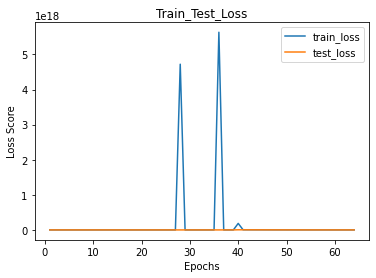

65
Train Epoch: 65 [0/7471 (0%)]	Loss: 1367730688.000000
Train Epoch: 65 [160/7471 (2%)]	Loss: 1321055104.000000
Train Epoch: 65 [320/7471 (4%)]	Loss: 1056526272.000000
Train Epoch: 65 [480/7471 (6%)]	Loss: 1104950016.000000
Train Epoch: 65 [640/7471 (9%)]	Loss: 1287394048.000000
Train Epoch: 65 [800/7471 (11%)]	Loss: 1088928512.000000
Train Epoch: 65 [960/7471 (13%)]	Loss: 1566481280.000000
Train Epoch: 65 [1120/7471 (15%)]	Loss: 1239513216.000000
Train Epoch: 65 [1280/7471 (17%)]	Loss: 207235577806848.000000
Train Epoch: 65 [1440/7471 (19%)]	Loss: 956569280.000000
Train Epoch: 65 [1600/7471 (21%)]	Loss: 8016144384.000000
Train Epoch: 65 [1760/7471 (24%)]	Loss: 9183904768.000000
Train Epoch: 65 [1920/7471 (26%)]	Loss: 931080832.000000
Train Epoch: 65 [2080/7471 (28%)]	Loss: 2979284863942656.000000
Train Epoch: 65 [2240/7471 (30%)]	Loss: 1934357888.000000
Train Epoch: 65 [2400/7471 (32%)]	Loss: 13040560898048.000000
Train Epoch: 65 [2560/7471 (34%)]	Loss: 1024915776.000000
Train Epoch:

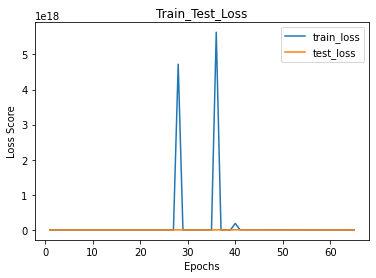

66
Train Epoch: 66 [0/7471 (0%)]	Loss: 1818213504.000000
Train Epoch: 66 [160/7471 (2%)]	Loss: 2246839296.000000
Train Epoch: 66 [320/7471 (4%)]	Loss: 4085316864.000000
Train Epoch: 66 [480/7471 (6%)]	Loss: 2797732864.000000
Train Epoch: 66 [640/7471 (9%)]	Loss: 1909887616.000000
Train Epoch: 66 [800/7471 (11%)]	Loss: 2042109231104.000000
Train Epoch: 66 [960/7471 (13%)]	Loss: 3028632832.000000
Train Epoch: 66 [1120/7471 (15%)]	Loss: 2466169600.000000
Train Epoch: 66 [1280/7471 (17%)]	Loss: 1690105216.000000
Train Epoch: 66 [1440/7471 (19%)]	Loss: 4007582720.000000
Train Epoch: 66 [1600/7471 (21%)]	Loss: 2273536512.000000
Train Epoch: 66 [1760/7471 (24%)]	Loss: 2962149632.000000
Train Epoch: 66 [1920/7471 (26%)]	Loss: 2443100416.000000
Train Epoch: 66 [2080/7471 (28%)]	Loss: 226282029711360.000000
Train Epoch: 66 [2240/7471 (30%)]	Loss: 3091650816.000000
Train Epoch: 66 [2400/7471 (32%)]	Loss: 3336043776.000000
Train Epoch: 66 [2560/7471 (34%)]	Loss: 2248011520.000000
Train Epoch: 66 [

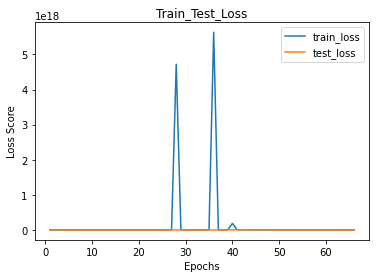

67
Train Epoch: 67 [0/7471 (0%)]	Loss: 4721015296.000000
Train Epoch: 67 [160/7471 (2%)]	Loss: 4877288448.000000
Train Epoch: 67 [320/7471 (4%)]	Loss: 3761151232.000000
Train Epoch: 67 [480/7471 (6%)]	Loss: 6002552320.000000
Train Epoch: 67 [640/7471 (9%)]	Loss: 4045165568.000000
Train Epoch: 67 [800/7471 (11%)]	Loss: 6783148544.000000
Train Epoch: 67 [960/7471 (13%)]	Loss: 4923640320.000000
Train Epoch: 67 [1120/7471 (15%)]	Loss: 5383020544.000000
Train Epoch: 67 [1280/7471 (17%)]	Loss: 4362072576.000000
Train Epoch: 67 [1440/7471 (19%)]	Loss: 7210045440.000000
Train Epoch: 67 [1600/7471 (21%)]	Loss: 2887129856.000000
Train Epoch: 67 [1760/7471 (24%)]	Loss: 3325004288.000000
Train Epoch: 67 [1920/7471 (26%)]	Loss: 6379472896.000000
Train Epoch: 67 [2080/7471 (28%)]	Loss: 3659453696.000000
Train Epoch: 67 [2240/7471 (30%)]	Loss: 5287354880.000000
Train Epoch: 67 [2400/7471 (32%)]	Loss: 5520271360.000000
Train Epoch: 67 [2560/7471 (34%)]	Loss: 5617549824.000000
Train Epoch: 67 [2720/747

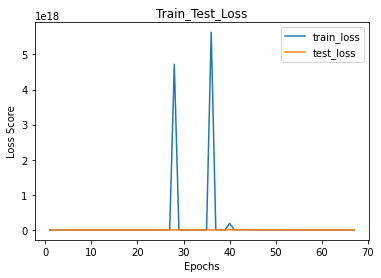

68
Train Epoch: 68 [0/7471 (0%)]	Loss: 8593236992.000000
Train Epoch: 68 [160/7471 (2%)]	Loss: 14395531264.000000
Train Epoch: 68 [320/7471 (4%)]	Loss: 5859695616.000000
Train Epoch: 68 [480/7471 (6%)]	Loss: 9544933376.000000
Train Epoch: 68 [640/7471 (9%)]	Loss: 10328157184.000000
Train Epoch: 68 [800/7471 (11%)]	Loss: 10278093824.000000
Train Epoch: 68 [960/7471 (13%)]	Loss: 13342168064.000000
Train Epoch: 68 [1120/7471 (15%)]	Loss: 9008500736.000000
Train Epoch: 68 [1280/7471 (17%)]	Loss: 13321008128.000000
Train Epoch: 68 [1440/7471 (19%)]	Loss: 9527600128.000000
Train Epoch: 68 [1600/7471 (21%)]	Loss: 10488210432.000000
Train Epoch: 68 [1760/7471 (24%)]	Loss: 425399615488.000000
Train Epoch: 68 [1920/7471 (26%)]	Loss: 8717681664.000000
Train Epoch: 68 [2080/7471 (28%)]	Loss: 10421460992.000000
Train Epoch: 68 [2240/7471 (30%)]	Loss: 7948665344.000000
Train Epoch: 68 [2400/7471 (32%)]	Loss: 11765599232.000000
Train Epoch: 68 [2560/7471 (34%)]	Loss: 14063989760.000000
Train Epoch: 6

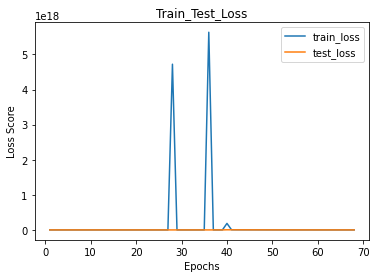

69
Train Epoch: 69 [0/7471 (0%)]	Loss: 13986523136.000000
Train Epoch: 69 [160/7471 (2%)]	Loss: 1175219208192.000000
Train Epoch: 69 [320/7471 (4%)]	Loss: 11820252160.000000
Train Epoch: 69 [480/7471 (6%)]	Loss: 17472751616.000000
Train Epoch: 69 [640/7471 (9%)]	Loss: 14280151040.000000
Train Epoch: 69 [800/7471 (11%)]	Loss: 15111684096.000000
Train Epoch: 69 [960/7471 (13%)]	Loss: 1350239873138688.000000
Train Epoch: 69 [1120/7471 (15%)]	Loss: 16590944256.000000
Train Epoch: 69 [1280/7471 (17%)]	Loss: 27246266368.000000
Train Epoch: 69 [1440/7471 (19%)]	Loss: 16766392320.000000
Train Epoch: 69 [1600/7471 (21%)]	Loss: 28059711488.000000
Train Epoch: 69 [1760/7471 (24%)]	Loss: 23047884800.000000
Train Epoch: 69 [1920/7471 (26%)]	Loss: 20241491968.000000
Train Epoch: 69 [2080/7471 (28%)]	Loss: 10989902848.000000
Train Epoch: 69 [2240/7471 (30%)]	Loss: 25279387648.000000
Train Epoch: 69 [2400/7471 (32%)]	Loss: 19681593344.000000
Train Epoch: 69 [2560/7471 (34%)]	Loss: 22520606720.000000
T

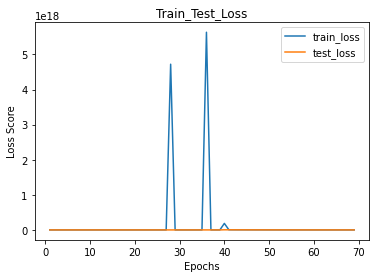

70
Train Epoch: 70 [0/7471 (0%)]	Loss: 23049943040.000000
Train Epoch: 70 [160/7471 (2%)]	Loss: 16642960384.000000
Train Epoch: 70 [320/7471 (4%)]	Loss: 21708638208.000000
Train Epoch: 70 [480/7471 (6%)]	Loss: 18555668480.000000
Train Epoch: 70 [640/7471 (9%)]	Loss: 23691012096.000000
Train Epoch: 70 [800/7471 (11%)]	Loss: 30172669952.000000
Train Epoch: 70 [960/7471 (13%)]	Loss: 51364392960.000000
Train Epoch: 70 [1120/7471 (15%)]	Loss: 29395015680.000000
Train Epoch: 70 [1280/7471 (17%)]	Loss: 18117617664.000000
Train Epoch: 70 [1440/7471 (19%)]	Loss: 3287862214656.000000
Train Epoch: 70 [1600/7471 (21%)]	Loss: 23573391360.000000
Train Epoch: 70 [1760/7471 (24%)]	Loss: 16418975744.000000
Train Epoch: 70 [1920/7471 (26%)]	Loss: 24441001984.000000
Train Epoch: 70 [2080/7471 (28%)]	Loss: 35700051968.000000
Train Epoch: 70 [2240/7471 (30%)]	Loss: 24133525504.000000
Train Epoch: 70 [2400/7471 (32%)]	Loss: 16321511424.000000
Train Epoch: 70 [2560/7471 (34%)]	Loss: 24622530560.000000
Train 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


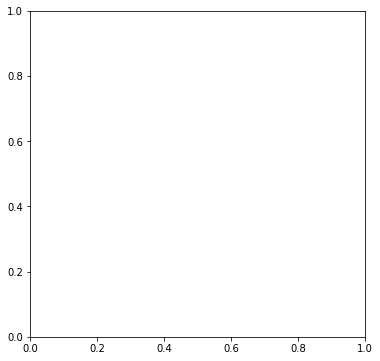

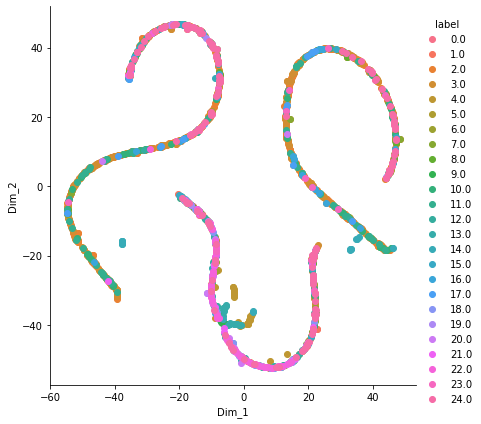

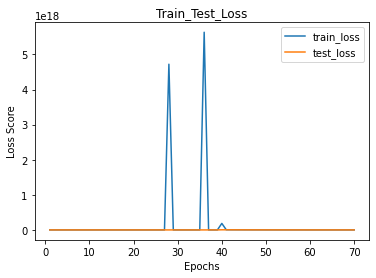

71
Train Epoch: 71 [0/7471 (0%)]	Loss: 62123845615616.000000
Train Epoch: 71 [160/7471 (2%)]	Loss: 17177090048.000000
Train Epoch: 71 [320/7471 (4%)]	Loss: 18147491840.000000
Train Epoch: 71 [480/7471 (6%)]	Loss: 27886213120.000000
Train Epoch: 71 [640/7471 (9%)]	Loss: 27375851520.000000
Train Epoch: 71 [800/7471 (11%)]	Loss: 31841280000.000000
Train Epoch: 71 [960/7471 (13%)]	Loss: 28983519232.000000
Train Epoch: 71 [1120/7471 (15%)]	Loss: 17711898624.000000
Train Epoch: 71 [1280/7471 (17%)]	Loss: 56531496206336.000000
Train Epoch: 71 [1440/7471 (19%)]	Loss: 18783762432.000000
Train Epoch: 71 [1600/7471 (21%)]	Loss: 30791518208.000000
Train Epoch: 71 [1760/7471 (24%)]	Loss: 14046881792.000000
Train Epoch: 71 [1920/7471 (26%)]	Loss: 33624214732800.000000
Train Epoch: 71 [2080/7471 (28%)]	Loss: 24420009984.000000
Train Epoch: 71 [2240/7471 (30%)]	Loss: 28325736448.000000
Train Epoch: 71 [2400/7471 (32%)]	Loss: 61214872829952.000000
Train Epoch: 71 [2560/7471 (34%)]	Loss: 37123915776.000

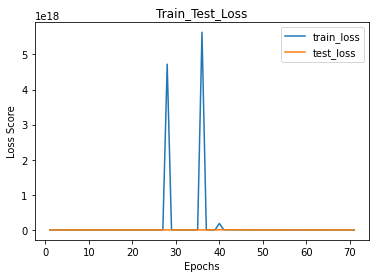

72
Train Epoch: 72 [0/7471 (0%)]	Loss: 40779548459008.000000
Train Epoch: 72 [160/7471 (2%)]	Loss: 30388101120.000000
Train Epoch: 72 [320/7471 (4%)]	Loss: 12977363968.000000
Train Epoch: 72 [480/7471 (6%)]	Loss: 11674959872.000000
Train Epoch: 72 [640/7471 (9%)]	Loss: 109393903616.000000
Train Epoch: 72 [800/7471 (11%)]	Loss: 31958409216.000000
Train Epoch: 72 [960/7471 (13%)]	Loss: 21085272064.000000
Train Epoch: 72 [1120/7471 (15%)]	Loss: 21645068288.000000
Train Epoch: 72 [1280/7471 (17%)]	Loss: 15061085184.000000
Train Epoch: 72 [1440/7471 (19%)]	Loss: 11461437440.000000
Train Epoch: 72 [1600/7471 (21%)]	Loss: 18198923264.000000
Train Epoch: 72 [1760/7471 (24%)]	Loss: 35306553344.000000
Train Epoch: 72 [1920/7471 (26%)]	Loss: 12895864832.000000
Train Epoch: 72 [2080/7471 (28%)]	Loss: 14307236864.000000
Train Epoch: 72 [2240/7471 (30%)]	Loss: 16868025344.000000
Train Epoch: 72 [2400/7471 (32%)]	Loss: 155492204544.000000
Train Epoch: 72 [2560/7471 (34%)]	Loss: 161732804608.000000
Tr

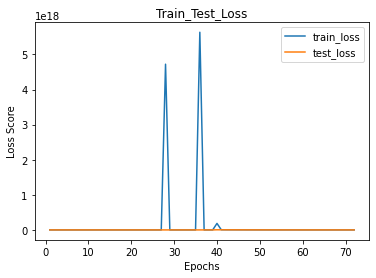

73
Train Epoch: 73 [0/7471 (0%)]	Loss: 38008889344.000000
Train Epoch: 73 [160/7471 (2%)]	Loss: 33132429312.000000
Train Epoch: 73 [320/7471 (4%)]	Loss: 14283593728.000000
Train Epoch: 73 [480/7471 (6%)]	Loss: 11319074816.000000
Train Epoch: 73 [640/7471 (9%)]	Loss: 22606428160.000000
Train Epoch: 73 [800/7471 (11%)]	Loss: 579978827661312.000000
Train Epoch: 73 [960/7471 (13%)]	Loss: 31384629248.000000
Train Epoch: 73 [1120/7471 (15%)]	Loss: 13570570240.000000
Train Epoch: 73 [1280/7471 (17%)]	Loss: 27093862400.000000
Train Epoch: 73 [1440/7471 (19%)]	Loss: 30239313920.000000
Train Epoch: 73 [1600/7471 (21%)]	Loss: 11018541056.000000
Train Epoch: 73 [1760/7471 (24%)]	Loss: 15239017472.000000
Train Epoch: 73 [1920/7471 (26%)]	Loss: 10751427584.000000
Train Epoch: 73 [2080/7471 (28%)]	Loss: 16542135296.000000
Train Epoch: 73 [2240/7471 (30%)]	Loss: 567686362824704.000000
Train Epoch: 73 [2400/7471 (32%)]	Loss: 21013106688.000000
Train Epoch: 73 [2560/7471 (34%)]	Loss: 13128915968.000000


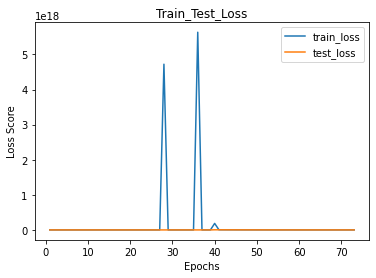

74
Train Epoch: 74 [0/7471 (0%)]	Loss: 13652807680.000000
Train Epoch: 74 [160/7471 (2%)]	Loss: 17193740288.000000
Train Epoch: 74 [320/7471 (4%)]	Loss: 2163777470464.000000
Train Epoch: 74 [480/7471 (6%)]	Loss: 21723889664.000000
Train Epoch: 74 [640/7471 (9%)]	Loss: 31003288535040.000000
Train Epoch: 74 [800/7471 (11%)]	Loss: 5512222208.000000
Train Epoch: 74 [960/7471 (13%)]	Loss: 10429143040.000000
Train Epoch: 74 [1120/7471 (15%)]	Loss: 20506763264.000000
Train Epoch: 74 [1280/7471 (17%)]	Loss: 25670516211712.000000
Train Epoch: 74 [1440/7471 (19%)]	Loss: 17641189376.000000
Train Epoch: 74 [1600/7471 (21%)]	Loss: 8316706304.000000
Train Epoch: 74 [1760/7471 (24%)]	Loss: 9318354944.000000
Train Epoch: 74 [1920/7471 (26%)]	Loss: 1530303741952.000000
Train Epoch: 74 [2080/7471 (28%)]	Loss: 24132958208.000000
Train Epoch: 74 [2240/7471 (30%)]	Loss: 7470739968.000000
Train Epoch: 74 [2400/7471 (32%)]	Loss: 18667712512.000000
Train Epoch: 74 [2560/7471 (34%)]	Loss: 14554993000448.000000

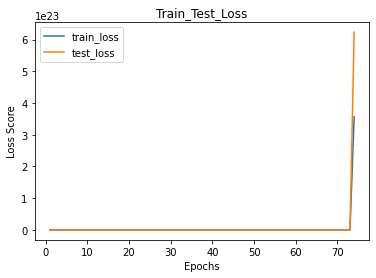

75
Train Epoch: 75 [0/7471 (0%)]	Loss: 4324247994368.000000
Train Epoch: 75 [160/7471 (2%)]	Loss: 114483536068608.000000
Train Epoch: 75 [320/7471 (4%)]	Loss: 4426398957568.000000
Train Epoch: 75 [480/7471 (6%)]	Loss: 52042039033856.000000
Train Epoch: 75 [640/7471 (9%)]	Loss: 14996916404224.000000
Train Epoch: 75 [800/7471 (11%)]	Loss: 987563161347857645043712.000000
Train Epoch: 75 [960/7471 (13%)]	Loss: 901145821184.000000
Train Epoch: 75 [1120/7471 (15%)]	Loss: 725154529280.000000
Train Epoch: 75 [1280/7471 (17%)]	Loss: 1111449927680.000000
Train Epoch: 75 [1440/7471 (19%)]	Loss: 75451997356032.000000
Train Epoch: 75 [1600/7471 (21%)]	Loss: 26869858566144.000000
Train Epoch: 75 [1760/7471 (24%)]	Loss: 2047879151616.000000
Train Epoch: 75 [1920/7471 (26%)]	Loss: 9539400503404063239438336.000000
Train Epoch: 75 [2080/7471 (28%)]	Loss: 3918914650112.000000
Train Epoch: 75 [2240/7471 (30%)]	Loss: 75493232567661929431040.000000
Train Epoch: 75 [2400/7471 (32%)]	Loss: 2224775794785865349

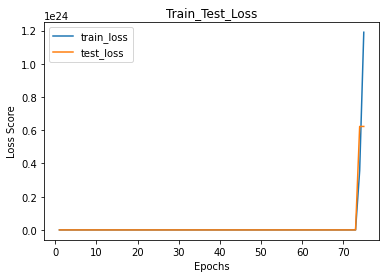

76
Train Epoch: 76 [0/7471 (0%)]	Loss: 32870596835551422864949248.000000
Train Epoch: 76 [160/7471 (2%)]	Loss: 2576559898624.000000
Train Epoch: 76 [320/7471 (4%)]	Loss: 1389210370048.000000
Train Epoch: 76 [480/7471 (6%)]	Loss: 19713683881984.000000
Train Epoch: 76 [640/7471 (9%)]	Loss: 9577466512721667506044928.000000
Train Epoch: 76 [800/7471 (11%)]	Loss: 22869208003114845366910976.000000
Train Epoch: 76 [960/7471 (13%)]	Loss: 125809423548416.000000
Train Epoch: 76 [1120/7471 (15%)]	Loss: 986892881608116839383040.000000
Train Epoch: 76 [1280/7471 (17%)]	Loss: 6181351325696.000000
Train Epoch: 76 [1440/7471 (19%)]	Loss: 1051968077824.000000
Train Epoch: 76 [1600/7471 (21%)]	Loss: 1952900423090176.000000
Train Epoch: 76 [1760/7471 (24%)]	Loss: 2254631337984.000000
Train Epoch: 76 [1920/7471 (26%)]	Loss: 900389928960.000000
Train Epoch: 76 [2080/7471 (28%)]	Loss: 8524407504896.000000
Train Epoch: 76 [2240/7471 (30%)]	Loss: 935786512384.000000
Train Epoch: 76 [2400/7471 (32%)]	Loss: 162

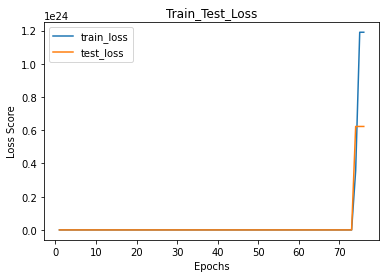

77
Train Epoch: 77 [0/7471 (0%)]	Loss: 1345301250048.000000
Train Epoch: 77 [160/7471 (2%)]	Loss: 1142769451008.000000
Train Epoch: 77 [320/7471 (4%)]	Loss: 67003893153792.000000
Train Epoch: 77 [480/7471 (6%)]	Loss: 576466583552.000000
Train Epoch: 77 [640/7471 (9%)]	Loss: 4943546679296.000000
Train Epoch: 77 [800/7471 (11%)]	Loss: 4117630287872.000000
Train Epoch: 77 [960/7471 (13%)]	Loss: 5184030264498612644872192.000000
Train Epoch: 77 [1120/7471 (15%)]	Loss: 6336161513472.000000
Train Epoch: 77 [1280/7471 (17%)]	Loss: 1455020965888.000000
Train Epoch: 77 [1440/7471 (19%)]	Loss: 759939268608.000000
Train Epoch: 77 [1600/7471 (21%)]	Loss: 1459139117056.000000
Train Epoch: 77 [1760/7471 (24%)]	Loss: 1336715116544.000000
Train Epoch: 77 [1920/7471 (26%)]	Loss: 516938792960.000000
Train Epoch: 77 [2080/7471 (28%)]	Loss: 13790943903744.000000
Train Epoch: 77 [2240/7471 (30%)]	Loss: 1000928692120388670324736.000000
Train Epoch: 77 [2400/7471 (32%)]	Loss: 30562345549824.000000
Train Epoch

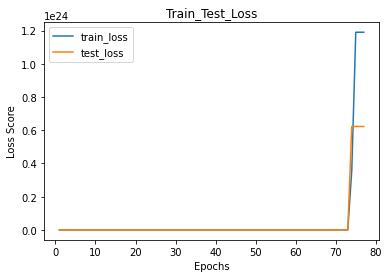

78
Train Epoch: 78 [0/7471 (0%)]	Loss: 108833397538816.000000
Train Epoch: 78 [160/7471 (2%)]	Loss: 1551607267328.000000
Train Epoch: 78 [320/7471 (4%)]	Loss: 919890558976.000000
Train Epoch: 78 [480/7471 (6%)]	Loss: 647147028480.000000
Train Epoch: 78 [640/7471 (9%)]	Loss: 820694351872.000000
Train Epoch: 78 [800/7471 (11%)]	Loss: 10233112219804498458050560.000000
Train Epoch: 78 [960/7471 (13%)]	Loss: 108031861472603702034432.000000
Train Epoch: 78 [1120/7471 (15%)]	Loss: 80671909347328.000000
Train Epoch: 78 [1280/7471 (17%)]	Loss: 905340618691781328896000.000000
Train Epoch: 78 [1440/7471 (19%)]	Loss: 10523686485375075921952768.000000
Train Epoch: 78 [1600/7471 (21%)]	Loss: 930741551104.000000
Train Epoch: 78 [1760/7471 (24%)]	Loss: 1411910991872.000000
Train Epoch: 78 [1920/7471 (26%)]	Loss: 38563815096320.000000
Train Epoch: 78 [2080/7471 (28%)]	Loss: 12578643247104.000000
Train Epoch: 78 [2240/7471 (30%)]	Loss: 129548066750464.000000
Train Epoch: 78 [2400/7471 (32%)]	Loss: 65693

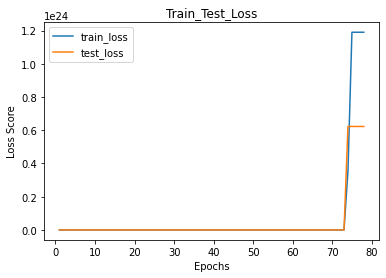

79
Train Epoch: 79 [0/7471 (0%)]	Loss: 709983862784.000000
Train Epoch: 79 [160/7471 (2%)]	Loss: 13133494091776.000000
Train Epoch: 79 [320/7471 (4%)]	Loss: 102051426074624.000000
Train Epoch: 79 [480/7471 (6%)]	Loss: 6555718647808.000000
Train Epoch: 79 [640/7471 (9%)]	Loss: 94371387015168.000000
Train Epoch: 79 [800/7471 (11%)]	Loss: 840685780992.000000
Train Epoch: 79 [960/7471 (13%)]	Loss: 48192833978368.000000
Train Epoch: 79 [1120/7471 (15%)]	Loss: 1204061470720.000000
Train Epoch: 79 [1280/7471 (17%)]	Loss: 966984597504.000000
Train Epoch: 79 [1440/7471 (19%)]	Loss: 966105497600.000000
Train Epoch: 79 [1600/7471 (21%)]	Loss: 584148582400.000000
Train Epoch: 79 [1760/7471 (24%)]	Loss: 190327616962560.000000
Train Epoch: 79 [1920/7471 (26%)]	Loss: 2408425455616.000000
Train Epoch: 79 [2080/7471 (28%)]	Loss: 23759383691264.000000
Train Epoch: 79 [2240/7471 (30%)]	Loss: 859031797760.000000
Train Epoch: 79 [2400/7471 (32%)]	Loss: 4105887547392.000000
Train Epoch: 79 [2560/7471 (34%)]

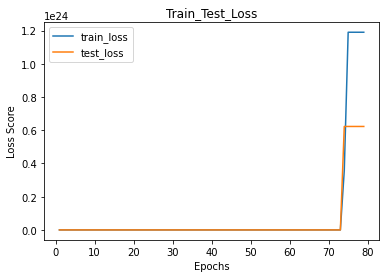

80
Train Epoch: 80 [0/7471 (0%)]	Loss: 884173242368.000000
Train Epoch: 80 [160/7471 (2%)]	Loss: 717968637952.000000
Train Epoch: 80 [320/7471 (4%)]	Loss: 929800060928.000000
Train Epoch: 80 [480/7471 (6%)]	Loss: 994869379072.000000
Train Epoch: 80 [640/7471 (9%)]	Loss: 952729403392.000000
Train Epoch: 80 [800/7471 (11%)]	Loss: 1021129750378545615470592.000000
Train Epoch: 80 [960/7471 (13%)]	Loss: 1561902972928.000000
Train Epoch: 80 [1120/7471 (15%)]	Loss: 1674857283584.000000
Train Epoch: 80 [1280/7471 (17%)]	Loss: 963148906496.000000
Train Epoch: 80 [1440/7471 (19%)]	Loss: 3167411765248.000000
Train Epoch: 80 [1600/7471 (21%)]	Loss: 1390553989120.000000
Train Epoch: 80 [1760/7471 (24%)]	Loss: 1255802929152.000000
Train Epoch: 80 [1920/7471 (26%)]	Loss: 544676052992.000000
Train Epoch: 80 [2080/7471 (28%)]	Loss: 759382933504.000000
Train Epoch: 80 [2240/7471 (30%)]	Loss: 1951448724144128.000000
Train Epoch: 80 [2400/7471 (32%)]	Loss: 1797239078912.000000
Train Epoch: 80 [2560/7471 (

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


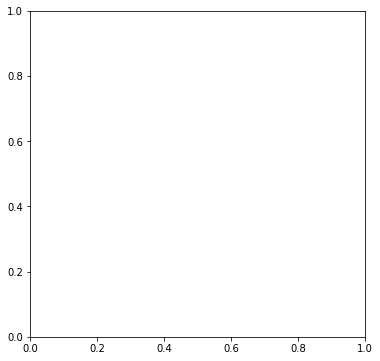

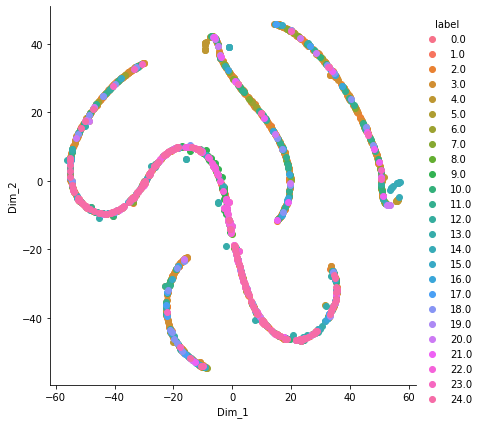

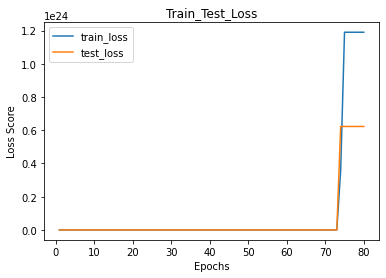

81
Train Epoch: 81 [0/7471 (0%)]	Loss: 22396095134484379641839616.000000
Train Epoch: 81 [160/7471 (2%)]	Loss: 99264285900800.000000
Train Epoch: 81 [320/7471 (4%)]	Loss: 86323457163264.000000
Train Epoch: 81 [480/7471 (6%)]	Loss: 591492022272.000000
Train Epoch: 81 [640/7471 (9%)]	Loss: 2781798989824.000000
Train Epoch: 81 [800/7471 (11%)]	Loss: 63735217520640.000000
Train Epoch: 81 [960/7471 (13%)]	Loss: 28708578525184.000000
Train Epoch: 81 [1120/7471 (15%)]	Loss: 710651740160.000000
Train Epoch: 81 [1280/7471 (17%)]	Loss: 860585918464.000000
Train Epoch: 81 [1440/7471 (19%)]	Loss: 34775328882688.000000
Train Epoch: 81 [1600/7471 (21%)]	Loss: 695587110912.000000
Train Epoch: 81 [1760/7471 (24%)]	Loss: 1416833307461886496735232.000000
Train Epoch: 81 [1920/7471 (26%)]	Loss: 396506562560.000000
Train Epoch: 81 [2080/7471 (28%)]	Loss: 881833279488.000000
Train Epoch: 81 [2240/7471 (30%)]	Loss: 1056585744384.000000
Train Epoch: 81 [2400/7471 (32%)]	Loss: 41295103918080.000000
Train Epoc

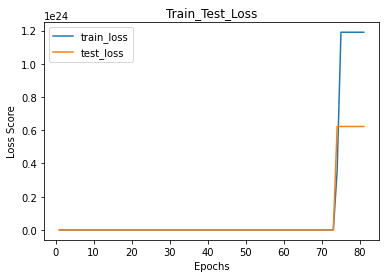

82
Train Epoch: 82 [0/7471 (0%)]	Loss: 548108763136.000000
Train Epoch: 82 [160/7471 (2%)]	Loss: 1045275803648.000000
Train Epoch: 82 [320/7471 (4%)]	Loss: 15418472267776.000000
Train Epoch: 82 [480/7471 (6%)]	Loss: 602662502400.000000
Train Epoch: 82 [640/7471 (9%)]	Loss: 798698045440.000000
Train Epoch: 82 [800/7471 (11%)]	Loss: 528607248384.000000
Train Epoch: 82 [960/7471 (13%)]	Loss: 611684712448.000000
Train Epoch: 82 [1120/7471 (15%)]	Loss: 8698045399040.000000
Train Epoch: 82 [1280/7471 (17%)]	Loss: 1418678501376.000000
Train Epoch: 82 [1440/7471 (19%)]	Loss: 22415499329536.000000
Train Epoch: 82 [1600/7471 (21%)]	Loss: 28954819821568.000000
Train Epoch: 82 [1760/7471 (24%)]	Loss: 1034580852736.000000
Train Epoch: 82 [1920/7471 (26%)]	Loss: 6291589693440.000000
Train Epoch: 82 [2080/7471 (28%)]	Loss: 2281550905344.000000
Train Epoch: 82 [2240/7471 (30%)]	Loss: 84137142648832.000000
Train Epoch: 82 [2400/7471 (32%)]	Loss: 10286417545569996027985920.000000
Train Epoch: 82 [2560/7

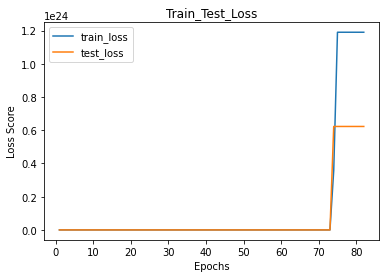

83
Train Epoch: 83 [0/7471 (0%)]	Loss: 9806160022375481672204288.000000
Train Epoch: 83 [160/7471 (2%)]	Loss: 48065759150080.000000
Train Epoch: 83 [320/7471 (4%)]	Loss: 8450599304736678361432064.000000
Train Epoch: 83 [480/7471 (6%)]	Loss: 1835857608704.000000
Train Epoch: 83 [640/7471 (9%)]	Loss: 129582762033152.000000
Train Epoch: 83 [800/7471 (11%)]	Loss: 1262060044288.000000
Train Epoch: 83 [960/7471 (13%)]	Loss: 776047165440.000000
Train Epoch: 83 [1120/7471 (15%)]	Loss: 72369435574272.000000
Train Epoch: 83 [1280/7471 (17%)]	Loss: 22873743596313968702914560.000000
Train Epoch: 83 [1440/7471 (19%)]	Loss: 932454924288.000000
Train Epoch: 83 [1600/7471 (21%)]	Loss: 1223177273344.000000
Train Epoch: 83 [1760/7471 (24%)]	Loss: 22396095134484379641839616.000000
Train Epoch: 83 [1920/7471 (26%)]	Loss: 1120171458560.000000
Train Epoch: 83 [2080/7471 (28%)]	Loss: 5700281420606200459821056.000000
Train Epoch: 83 [2240/7471 (30%)]	Loss: 979168091354468850860032.000000
Train Epoch: 83 [2400

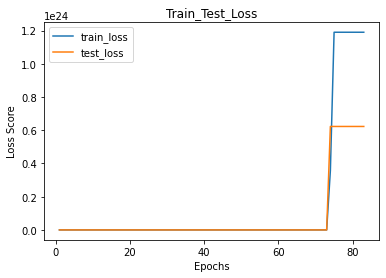

84
Train Epoch: 84 [0/7471 (0%)]	Loss: 21710092894208.000000
Train Epoch: 84 [160/7471 (2%)]	Loss: 63495034896384.000000
Train Epoch: 84 [320/7471 (4%)]	Loss: 13951114936320.000000
Train Epoch: 84 [480/7471 (6%)]	Loss: 4634941325312.000000
Train Epoch: 84 [640/7471 (9%)]	Loss: 10437490614926154221486080.000000
Train Epoch: 84 [800/7471 (11%)]	Loss: 8976118841344.000000
Train Epoch: 84 [960/7471 (13%)]	Loss: 979167947239280775004160.000000
Train Epoch: 84 [1120/7471 (15%)]	Loss: 704714113024.000000
Train Epoch: 84 [1280/7471 (17%)]	Loss: 10414495595516770658549760.000000
Train Epoch: 84 [1440/7471 (19%)]	Loss: 360185004032.000000
Train Epoch: 84 [1600/7471 (21%)]	Loss: 2404478353408.000000
Train Epoch: 84 [1760/7471 (24%)]	Loss: 7727522250752.000000
Train Epoch: 84 [1920/7471 (26%)]	Loss: 1291084759040.000000
Train Epoch: 84 [2080/7471 (28%)]	Loss: 858009894912.000000
Train Epoch: 84 [2240/7471 (30%)]	Loss: 1839057469440.000000
Train Epoch: 84 [2400/7471 (32%)]	Loss: 83501957251072.0000

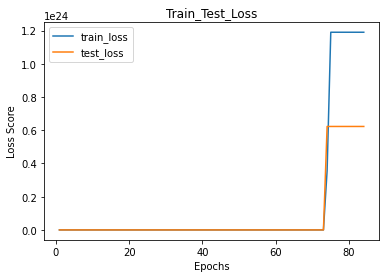

85
Train Epoch: 85 [0/7471 (0%)]	Loss: 124275499466752.000000
Train Epoch: 85 [160/7471 (2%)]	Loss: 705321566208.000000
Train Epoch: 85 [320/7471 (4%)]	Loss: 135054743306240.000000
Train Epoch: 85 [480/7471 (6%)]	Loss: 488793178112.000000
Train Epoch: 85 [640/7471 (9%)]	Loss: 10286417545569996027985920.000000
Train Epoch: 85 [800/7471 (11%)]	Loss: 35280371318784.000000
Train Epoch: 85 [960/7471 (13%)]	Loss: 84701494640640.000000
Train Epoch: 85 [1120/7471 (15%)]	Loss: 1690310279168.000000
Train Epoch: 85 [1280/7471 (17%)]	Loss: 7718783942656.000000
Train Epoch: 85 [1440/7471 (19%)]	Loss: 862069522432.000000
Train Epoch: 85 [1600/7471 (21%)]	Loss: 698864435200.000000
Train Epoch: 85 [1760/7471 (24%)]	Loss: 31297602846720.000000
Train Epoch: 85 [1920/7471 (26%)]	Loss: 74058397908992.000000
Train Epoch: 85 [2080/7471 (28%)]	Loss: 1535038062592.000000
Train Epoch: 85 [2240/7471 (30%)]	Loss: 99442359271424.000000
Train Epoch: 85 [2400/7471 (32%)]	Loss: 1703325798560591494774784.000000
Train

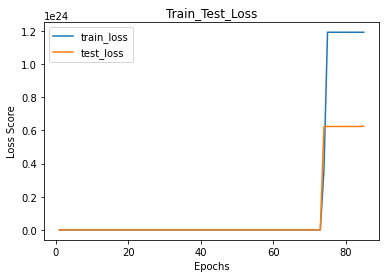

86
Train Epoch: 86 [0/7471 (0%)]	Loss: 40479113282060288.000000
Train Epoch: 86 [160/7471 (2%)]	Loss: 9596937627552220241199104.000000
Train Epoch: 86 [320/7471 (4%)]	Loss: 8796159594201088.000000
Train Epoch: 86 [480/7471 (6%)]	Loss: 22452908800388395847122944.000000
Train Epoch: 86 [640/7471 (9%)]	Loss: 4230233012043776.000000
Train Epoch: 86 [800/7471 (11%)]	Loss: 4932535863738368.000000
Train Epoch: 86 [960/7471 (13%)]	Loss: 3568573972742144.000000
Train Epoch: 86 [1120/7471 (15%)]	Loss: 5077320285028352.000000
Train Epoch: 86 [1280/7471 (17%)]	Loss: 10374049956213657859784704.000000
Train Epoch: 86 [1440/7471 (19%)]	Loss: 8473089920987796428816384.000000
Train Epoch: 86 [1600/7471 (21%)]	Loss: 5728950575693824.000000
Train Epoch: 86 [1760/7471 (24%)]	Loss: 10122531394551808.000000
Train Epoch: 86 [1920/7471 (26%)]	Loss: 2709485218955264.000000
Train Epoch: 86 [2080/7471 (28%)]	Loss: 2517561652543488.000000
Train Epoch: 86 [2240/7471 (30%)]	Loss: 3409664746192896.000000
Train Epoch

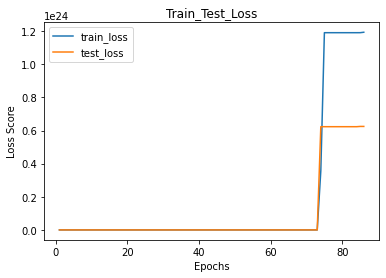

87
Train Epoch: 87 [0/7471 (0%)]	Loss: 857319227260928.000000
Train Epoch: 87 [160/7471 (2%)]	Loss: 1137716838268928.000000
Train Epoch: 87 [320/7471 (4%)]	Loss: 1256517646942208.000000
Train Epoch: 87 [480/7471 (6%)]	Loss: 835951697854464.000000
Train Epoch: 87 [640/7471 (9%)]	Loss: 760988412411904.000000
Train Epoch: 87 [800/7471 (11%)]	Loss: 1952689701257216.000000
Train Epoch: 87 [960/7471 (13%)]	Loss: 781218043920384.000000
Train Epoch: 87 [1120/7471 (15%)]	Loss: 1351964705161216.000000
Train Epoch: 87 [1280/7471 (17%)]	Loss: 1390073815760896.000000
Train Epoch: 87 [1440/7471 (19%)]	Loss: 1516343304126464.000000
Train Epoch: 87 [1600/7471 (21%)]	Loss: 1921305838354432.000000
Train Epoch: 87 [1760/7471 (24%)]	Loss: 973947453571072.000000
Train Epoch: 87 [1920/7471 (26%)]	Loss: 942733510311936.000000
Train Epoch: 87 [2080/7471 (28%)]	Loss: 1608591417016320.000000
Train Epoch: 87 [2240/7471 (30%)]	Loss: 1394009347981312.000000
Train Epoch: 87 [2400/7471 (32%)]	Loss: 1514653771366400.

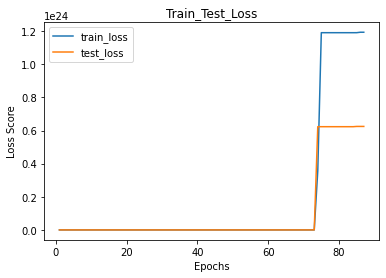

88
Train Epoch: 88 [0/7471 (0%)]	Loss: 520471250468864.000000
Train Epoch: 88 [160/7471 (2%)]	Loss: 351443483623424.000000
Train Epoch: 88 [320/7471 (4%)]	Loss: 1004243413503727393308672.000000
Train Epoch: 88 [480/7471 (6%)]	Loss: 812916378959872.000000
Train Epoch: 88 [640/7471 (9%)]	Loss: 661040161357824.000000
Train Epoch: 88 [800/7471 (11%)]	Loss: 548755422052352.000000
Train Epoch: 88 [960/7471 (13%)]	Loss: 917863367966720.000000
Train Epoch: 88 [1120/7471 (15%)]	Loss: 1121730231795712.000000
Train Epoch: 88 [1280/7471 (17%)]	Loss: 650118260850688.000000
Train Epoch: 88 [1440/7471 (19%)]	Loss: 619127320346624.000000
Train Epoch: 88 [1600/7471 (21%)]	Loss: 359973892653056.000000
Train Epoch: 88 [1760/7471 (24%)]	Loss: 511164593209344.000000
Train Epoch: 88 [1920/7471 (26%)]	Loss: 144799702783623168.000000
Train Epoch: 88 [2080/7471 (28%)]	Loss: 615548605956096.000000
Train Epoch: 88 [2240/7471 (30%)]	Loss: 504736570671104.000000
Train Epoch: 88 [2400/7471 (32%)]	Loss: 102267884453

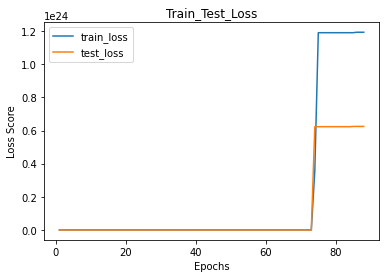

89
Train Epoch: 89 [0/7471 (0%)]	Loss: 414361768165376.000000
Train Epoch: 89 [160/7471 (2%)]	Loss: 16925170107154432.000000
Train Epoch: 89 [320/7471 (4%)]	Loss: 9721631276422221472464896.000000
Train Epoch: 89 [480/7471 (6%)]	Loss: 124174834192928150126592.000000
Train Epoch: 89 [640/7471 (9%)]	Loss: 62840328882167874584576.000000
Train Epoch: 89 [800/7471 (11%)]	Loss: 726711754817536.000000
Train Epoch: 89 [960/7471 (13%)]	Loss: 747027017236480.000000
Train Epoch: 89 [1120/7471 (15%)]	Loss: 455629659439104.000000
Train Epoch: 89 [1280/7471 (17%)]	Loss: 795429084069888.000000
Train Epoch: 89 [1440/7471 (19%)]	Loss: 511551475810304.000000
Train Epoch: 89 [1600/7471 (21%)]	Loss: 17207252821737472.000000
Train Epoch: 89 [1760/7471 (24%)]	Loss: 188900714741760.000000
Train Epoch: 89 [1920/7471 (26%)]	Loss: 674013177184256.000000
Train Epoch: 89 [2080/7471 (28%)]	Loss: 612175177580544.000000
Train Epoch: 89 [2240/7471 (30%)]	Loss: 281811158564864.000000
Train Epoch: 89 [2400/7471 (32%)]	L

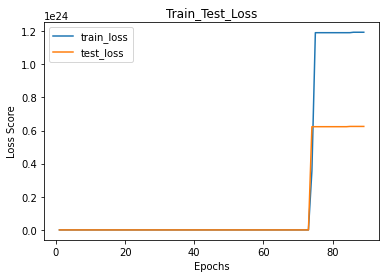

90
Train Epoch: 90 [0/7471 (0%)]	Loss: 500536159764480.000000
Train Epoch: 90 [160/7471 (2%)]	Loss: 685995129307136.000000
Train Epoch: 90 [320/7471 (4%)]	Loss: 874069197062144.000000
Train Epoch: 90 [480/7471 (6%)]	Loss: 259230837768192.000000
Train Epoch: 90 [640/7471 (9%)]	Loss: 236165688983552.000000
Train Epoch: 90 [800/7471 (11%)]	Loss: 441431369973760.000000
Train Epoch: 90 [960/7471 (13%)]	Loss: 2981724506315008130416640.000000
Train Epoch: 90 [1120/7471 (15%)]	Loss: 492300828409856.000000
Train Epoch: 90 [1280/7471 (17%)]	Loss: 99069326262272.000000
Train Epoch: 90 [1440/7471 (19%)]	Loss: 553873412456448.000000
Train Epoch: 90 [1600/7471 (21%)]	Loss: 1175369608593408.000000
Train Epoch: 90 [1760/7471 (24%)]	Loss: 176614964426812319334400.000000
Train Epoch: 90 [1920/7471 (26%)]	Loss: 234477364183040.000000
Train Epoch: 90 [2080/7471 (28%)]	Loss: 2239895466804618077405184.000000
Train Epoch: 90 [2240/7471 (30%)]	Loss: 140640851591168.000000
Train Epoch: 90 [2400/7471 (32%)]	Los

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


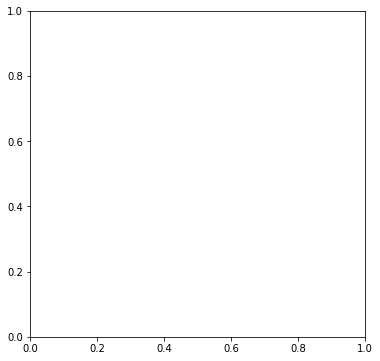

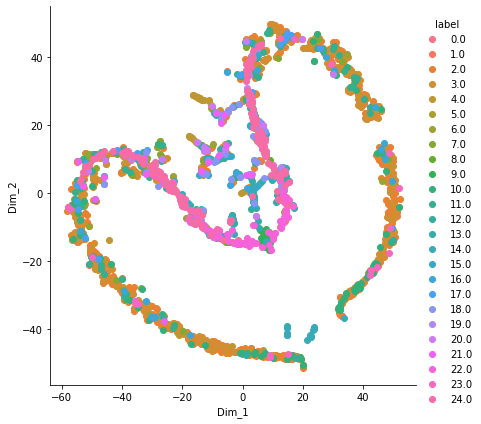

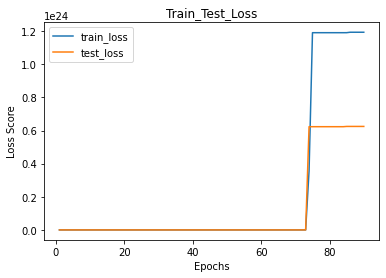

91
Train Epoch: 91 [0/7471 (0%)]	Loss: 94143804080128.000000
Train Epoch: 91 [160/7471 (2%)]	Loss: 460537129336832.000000
Train Epoch: 91 [320/7471 (4%)]	Loss: 126951364755456.000000
Train Epoch: 91 [480/7471 (6%)]	Loss: 534096765779968.000000
Train Epoch: 91 [640/7471 (9%)]	Loss: 739424925122560.000000
Train Epoch: 91 [800/7471 (11%)]	Loss: 254684816211968.000000
Train Epoch: 91 [960/7471 (13%)]	Loss: 10174866625391760548823040.000000
Train Epoch: 91 [1120/7471 (15%)]	Loss: 660696966627328.000000
Train Epoch: 91 [1280/7471 (17%)]	Loss: 1008649951551928800378880.000000
Train Epoch: 91 [1440/7471 (19%)]	Loss: 913492710478074230079488.000000
Train Epoch: 91 [1600/7471 (21%)]	Loss: 80392677752832.000000
Train Epoch: 91 [1760/7471 (24%)]	Loss: 648183176757248.000000
Train Epoch: 91 [1920/7471 (26%)]	Loss: 370011231223808.000000
Train Epoch: 91 [2080/7471 (28%)]	Loss: 270451372720128.000000
Train Epoch: 91 [2240/7471 (30%)]	Loss: 624221956866048.000000
Train Epoch: 91 [2400/7471 (32%)]	Loss

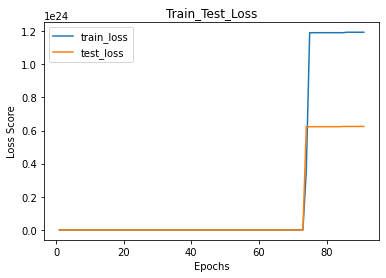

92
Train Epoch: 92 [0/7471 (0%)]	Loss: 1089359734374400.000000
Train Epoch: 92 [160/7471 (2%)]	Loss: 62972437200896.000000
Train Epoch: 92 [320/7471 (4%)]	Loss: 643313623367680.000000
Train Epoch: 92 [480/7471 (6%)]	Loss: 78355789512704.000000
Train Epoch: 92 [640/7471 (9%)]	Loss: 161851681800192.000000
Train Epoch: 92 [800/7471 (11%)]	Loss: 437872318480384.000000
Train Epoch: 92 [960/7471 (13%)]	Loss: 906391644536832.000000
Train Epoch: 92 [1120/7471 (15%)]	Loss: 241293762494464.000000
Train Epoch: 92 [1280/7471 (17%)]	Loss: 1013252486255913371435008.000000
Train Epoch: 92 [1440/7471 (19%)]	Loss: 90374307577856.000000
Train Epoch: 92 [1600/7471 (21%)]	Loss: 741137811767296.000000
Train Epoch: 92 [1760/7471 (24%)]	Loss: 314268226420736.000000
Train Epoch: 92 [1920/7471 (26%)]	Loss: 239140339712000.000000
Train Epoch: 92 [2080/7471 (28%)]	Loss: 526019744235520.000000
Train Epoch: 92 [2240/7471 (30%)]	Loss: 741936608575488.000000
Train Epoch: 92 [2400/7471 (32%)]	Loss: 981260370066472933

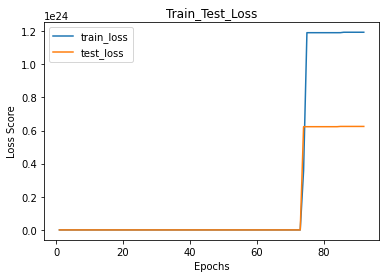

93
Train Epoch: 93 [0/7471 (0%)]	Loss: 378291961724928.000000
Train Epoch: 93 [160/7471 (2%)]	Loss: 51967703384064.000000
Train Epoch: 93 [320/7471 (4%)]	Loss: 84640064864256.000000
Train Epoch: 93 [480/7471 (6%)]	Loss: 10456090697559976483749888.000000
Train Epoch: 93 [640/7471 (9%)]	Loss: 57654097477632.000000
Train Epoch: 93 [800/7471 (11%)]	Loss: 74213025120256.000000
Train Epoch: 93 [960/7471 (13%)]	Loss: 749674529030144.000000
Train Epoch: 93 [1120/7471 (15%)]	Loss: 495640769462272.000000
Train Epoch: 93 [1280/7471 (17%)]	Loss: 10374049956213657859784704.000000
Train Epoch: 93 [1440/7471 (19%)]	Loss: 100586439573504.000000
Train Epoch: 93 [1600/7471 (21%)]	Loss: 124351315705856.000000
Train Epoch: 93 [1760/7471 (24%)]	Loss: 9558659480677768314748928.000000
Train Epoch: 93 [1920/7471 (26%)]	Loss: 166937459949568.000000
Train Epoch: 93 [2080/7471 (28%)]	Loss: 346367604031488.000000
Train Epoch: 93 [2240/7471 (30%)]	Loss: 48854024060928.000000
Train Epoch: 93 [2400/7471 (32%)]	Loss:

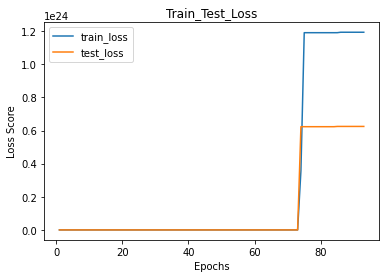

94
Train Epoch: 94 [0/7471 (0%)]	Loss: 186030451851264.000000
Train Epoch: 94 [160/7471 (2%)]	Loss: 285676092260352.000000
Train Epoch: 94 [320/7471 (4%)]	Loss: 626220458835968.000000
Train Epoch: 94 [480/7471 (6%)]	Loss: 35960813256704.000000
Train Epoch: 94 [640/7471 (9%)]	Loss: 1008649951551928800378880.000000
Train Epoch: 94 [800/7471 (11%)]	Loss: 340816392355840.000000
Train Epoch: 94 [960/7471 (13%)]	Loss: 819409698422784.000000
Train Epoch: 94 [1120/7471 (15%)]	Loss: 369521604952064.000000
Train Epoch: 94 [1280/7471 (17%)]	Loss: 268269881655296.000000
Train Epoch: 94 [1440/7471 (19%)]	Loss: 327524978524160.000000
Train Epoch: 94 [1600/7471 (21%)]	Loss: 1140062250490026432397312.000000
Train Epoch: 94 [1760/7471 (24%)]	Loss: 670483318046720.000000
Train Epoch: 94 [1920/7471 (26%)]	Loss: 149872414031872.000000
Train Epoch: 94 [2080/7471 (28%)]	Loss: 905920137658368.000000
Train Epoch: 94 [2240/7471 (30%)]	Loss: 265195003838464.000000
Train Epoch: 94 [2400/7471 (32%)]	Loss: 1246887

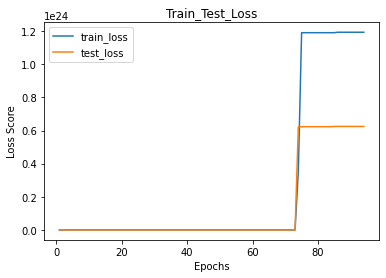

95
Train Epoch: 95 [0/7471 (0%)]	Loss: 40528464838656.000000
Train Epoch: 95 [160/7471 (2%)]	Loss: 38797966311424.000000
Train Epoch: 95 [320/7471 (4%)]	Loss: 245589501542400.000000
Train Epoch: 95 [480/7471 (6%)]	Loss: 1422271574966272.000000
Train Epoch: 95 [640/7471 (9%)]	Loss: 131668354531328.000000
Train Epoch: 95 [800/7471 (11%)]	Loss: 303047121043456.000000
Train Epoch: 95 [960/7471 (13%)]	Loss: 408170740580352.000000
Train Epoch: 95 [1120/7471 (15%)]	Loss: 298510259847168.000000
Train Epoch: 95 [1280/7471 (17%)]	Loss: 74451362250752.000000
Train Epoch: 95 [1440/7471 (19%)]	Loss: 457746004574208.000000
Train Epoch: 95 [1600/7471 (21%)]	Loss: 29825100152832.000000
Train Epoch: 95 [1760/7471 (24%)]	Loss: 365776192143360.000000
Train Epoch: 95 [1920/7471 (26%)]	Loss: 30932115390464.000000
Train Epoch: 95 [2080/7471 (28%)]	Loss: 241239085547520.000000
Train Epoch: 95 [2240/7471 (30%)]	Loss: 710669179551744.000000
Train Epoch: 95 [2400/7471 (32%)]	Loss: 20931804135424.000000
Train Ep

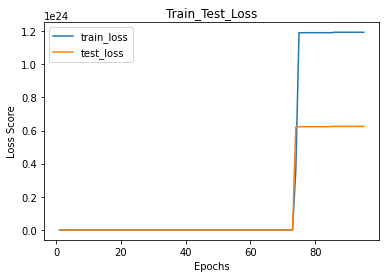

96
Train Epoch: 96 [0/7471 (0%)]	Loss: 142289531830272.000000
Train Epoch: 96 [160/7471 (2%)]	Loss: 115473886740480.000000
Train Epoch: 96 [320/7471 (4%)]	Loss: 2436021970372238409465856.000000
Train Epoch: 96 [480/7471 (6%)]	Loss: 10571648019966720756154368.000000
Train Epoch: 96 [640/7471 (9%)]	Loss: 6771220406402711457628160.000000
Train Epoch: 96 [800/7471 (11%)]	Loss: 13468198502400.000000
Train Epoch: 96 [960/7471 (13%)]	Loss: 759802196131840.000000
Train Epoch: 96 [1120/7471 (15%)]	Loss: 322843229290496.000000
Train Epoch: 96 [1280/7471 (17%)]	Loss: 12280323375104.000000
Train Epoch: 96 [1440/7471 (19%)]	Loss: 268719192276992.000000
Train Epoch: 96 [1600/7471 (21%)]	Loss: 58697447374848.000000
Train Epoch: 96 [1760/7471 (24%)]	Loss: 198675137560576.000000
Train Epoch: 96 [1920/7471 (26%)]	Loss: 77604947914937818152960.000000
Train Epoch: 96 [2080/7471 (28%)]	Loss: 127473505271808.000000
Train Epoch: 96 [2240/7471 (30%)]	Loss: 8473089920987796428816384.000000
Train Epoch: 96 [240

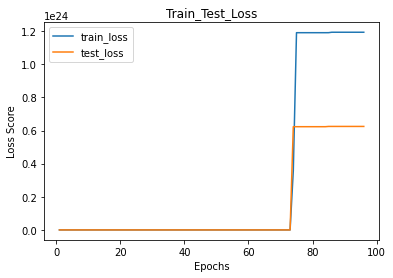

97
Train Epoch: 97 [0/7471 (0%)]	Loss: 9558659480677768314748928.000000
Train Epoch: 97 [160/7471 (2%)]	Loss: 9221325193216.000000
Train Epoch: 97 [320/7471 (4%)]	Loss: 160501736669184.000000
Train Epoch: 97 [480/7471 (6%)]	Loss: 139430903939072.000000
Train Epoch: 97 [640/7471 (9%)]	Loss: 145717939142656.000000
Train Epoch: 97 [800/7471 (11%)]	Loss: 21506899836928.000000
Train Epoch: 97 [960/7471 (13%)]	Loss: 9806092000006709868232704.000000
Train Epoch: 97 [1120/7471 (15%)]	Loss: 1959045661779835140177920.000000
Train Epoch: 97 [1280/7471 (17%)]	Loss: 139946182574080.000000
Train Epoch: 97 [1440/7471 (19%)]	Loss: 204151589961728.000000
Train Epoch: 97 [1600/7471 (21%)]	Loss: 16303307882496.000000
Train Epoch: 97 [1760/7471 (24%)]	Loss: 14585848397824.000000
Train Epoch: 97 [1920/7471 (26%)]	Loss: 3690765755271072138133504.000000
Train Epoch: 97 [2080/7471 (28%)]	Loss: 452433264246784.000000
Train Epoch: 97 [2240/7471 (30%)]	Loss: 1043307492556350999756800.000000
Train Epoch: 97 [2400

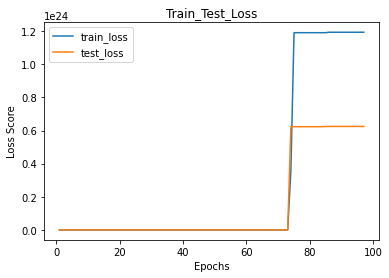

98
Train Epoch: 98 [0/7471 (0%)]	Loss: 9459765332777106801688576.000000
Train Epoch: 98 [160/7471 (2%)]	Loss: 121689162450593552269312.000000
Train Epoch: 98 [320/7471 (4%)]	Loss: 27255375921152.000000
Train Epoch: 98 [480/7471 (6%)]	Loss: 166775626924032.000000
Train Epoch: 98 [640/7471 (9%)]	Loss: 47544289722368.000000
Train Epoch: 98 [800/7471 (11%)]	Loss: 1887917466589808398696448.000000
Train Epoch: 98 [960/7471 (13%)]	Loss: 333201348231168.000000
Train Epoch: 98 [1120/7471 (15%)]	Loss: 258684152184832.000000
Train Epoch: 98 [1280/7471 (17%)]	Loss: 122628647944192.000000
Train Epoch: 98 [1440/7471 (19%)]	Loss: 199596693258240.000000
Train Epoch: 98 [1600/7471 (21%)]	Loss: 102104517574656.000000
Train Epoch: 98 [1760/7471 (24%)]	Loss: 319004065398784.000000
Train Epoch: 98 [1920/7471 (26%)]	Loss: 330778550468608.000000
Train Epoch: 98 [2080/7471 (28%)]	Loss: 23226753220608.000000
Train Epoch: 98 [2240/7471 (30%)]	Loss: 202749769678848.000000
Train Epoch: 98 [2400/7471 (32%)]	Loss: 

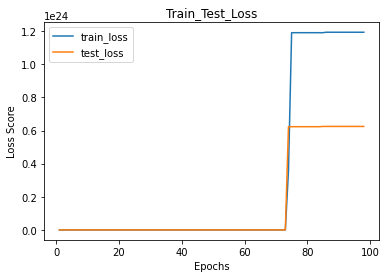

99
Train Epoch: 99 [0/7471 (0%)]	Loss: 126443308711936.000000
Train Epoch: 99 [160/7471 (2%)]	Loss: 543092574781440.000000
Train Epoch: 99 [320/7471 (4%)]	Loss: 82546285084672.000000
Train Epoch: 99 [480/7471 (6%)]	Loss: 17185111015424.000000
Train Epoch: 99 [640/7471 (9%)]	Loss: 55927201857536.000000
Train Epoch: 99 [800/7471 (11%)]	Loss: 7118176911360.000000
Train Epoch: 99 [960/7471 (13%)]	Loss: 143801863634944.000000
Train Epoch: 99 [1120/7471 (15%)]	Loss: 50225653743616.000000
Train Epoch: 99 [1280/7471 (17%)]	Loss: 212099225616384.000000
Train Epoch: 99 [1440/7471 (19%)]	Loss: 81590738747392.000000
Train Epoch: 99 [1600/7471 (21%)]	Loss: 11135431247405487354806272.000000
Train Epoch: 99 [1760/7471 (24%)]	Loss: 17405733502976.000000
Train Epoch: 99 [1920/7471 (26%)]	Loss: 16809872783835136.000000
Train Epoch: 99 [2080/7471 (28%)]	Loss: 68118927900672.000000
Train Epoch: 99 [2240/7471 (30%)]	Loss: 215656213512192.000000
Train Epoch: 99 [2400/7471 (32%)]	Loss: 137387304812544.000000

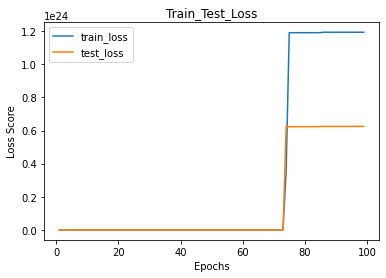

100
Train Epoch: 100 [0/7471 (0%)]	Loss: 7363672145920.000000
Train Epoch: 100 [160/7471 (2%)]	Loss: 104898611904512.000000
Train Epoch: 100 [320/7471 (4%)]	Loss: 22882992332623924829356032.000000
Train Epoch: 100 [480/7471 (6%)]	Loss: 92250721746944.000000
Train Epoch: 100 [640/7471 (9%)]	Loss: 200795811217408.000000
Train Epoch: 100 [800/7471 (11%)]	Loss: 28135762427904.000000
Train Epoch: 100 [960/7471 (13%)]	Loss: 71797584166912.000000
Train Epoch: 100 [1120/7471 (15%)]	Loss: 53629469851648.000000
Train Epoch: 100 [1280/7471 (17%)]	Loss: 125122916646912.000000
Train Epoch: 100 [1440/7471 (19%)]	Loss: 273301184184320.000000
Train Epoch: 100 [1600/7471 (21%)]	Loss: 9306383581184.000000
Train Epoch: 100 [1760/7471 (24%)]	Loss: 10252348715108863699845120.000000
Train Epoch: 100 [1920/7471 (26%)]	Loss: 65460217315328.000000
Train Epoch: 100 [2080/7471 (28%)]	Loss: 108921293373440.000000
Train Epoch: 100 [2240/7471 (30%)]	Loss: 9931370528768.000000
Train Epoch: 100 [2400/7471 (32%)]	Loss

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


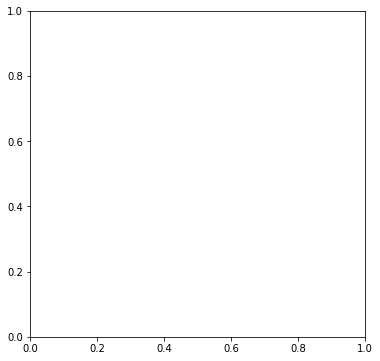

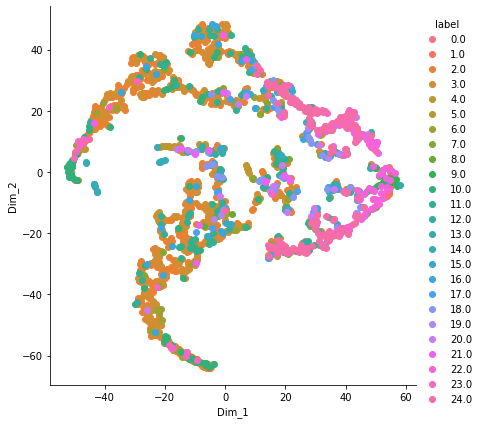

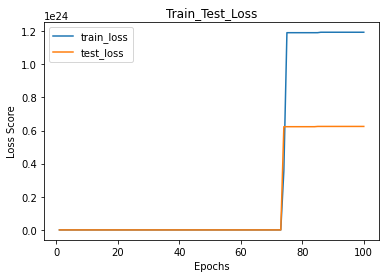

101
Train Epoch: 101 [0/7471 (0%)]	Loss: 1686524002304.000000
Train Epoch: 101 [160/7471 (2%)]	Loss: 31268607623168.000000
Train Epoch: 101 [320/7471 (4%)]	Loss: 183725497253888.000000
Train Epoch: 101 [480/7471 (6%)]	Loss: 146972304474112.000000
Train Epoch: 101 [640/7471 (9%)]	Loss: 16665693952933888.000000
Train Epoch: 101 [800/7471 (11%)]	Loss: 71672602296320.000000
Train Epoch: 101 [960/7471 (13%)]	Loss: 10313121398784.000000
Train Epoch: 101 [1120/7471 (15%)]	Loss: 642797623312384.000000
Train Epoch: 101 [1280/7471 (17%)]	Loss: 45977771704320.000000
Train Epoch: 101 [1440/7471 (19%)]	Loss: 117047992254464.000000
Train Epoch: 101 [1600/7471 (21%)]	Loss: 393209758875648.000000
Train Epoch: 101 [1760/7471 (24%)]	Loss: 13132918423552.000000
Train Epoch: 101 [1920/7471 (26%)]	Loss: 423743889342464.000000
Train Epoch: 101 [2080/7471 (28%)]	Loss: 100071160938496.000000
Train Epoch: 101 [2240/7471 (30%)]	Loss: 16453996088655872.000000
Train Epoch: 101 [2400/7471 (32%)]	Loss: 317253530681

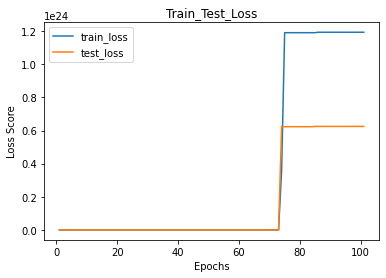

102
Train Epoch: 102 [0/7471 (0%)]	Loss: 1944800854016.000000
Train Epoch: 102 [160/7471 (2%)]	Loss: 34651211038720.000000
Train Epoch: 102 [320/7471 (4%)]	Loss: 8123440533981916429287424.000000
Train Epoch: 102 [480/7471 (6%)]	Loss: 95346780798976.000000
Train Epoch: 102 [640/7471 (9%)]	Loss: 42509061324800.000000
Train Epoch: 102 [800/7471 (11%)]	Loss: 168214692626432.000000
Train Epoch: 102 [960/7471 (13%)]	Loss: 21903393685504.000000
Train Epoch: 102 [1120/7471 (15%)]	Loss: 45720325324800.000000
Train Epoch: 102 [1280/7471 (17%)]	Loss: 14999048159232.000000
Train Epoch: 102 [1440/7471 (19%)]	Loss: 7263599198208.000000
Train Epoch: 102 [1600/7471 (21%)]	Loss: 913492710478074230079488.000000
Train Epoch: 102 [1760/7471 (24%)]	Loss: 21720912101376.000000
Train Epoch: 102 [1920/7471 (26%)]	Loss: 1307176468480.000000
Train Epoch: 102 [2080/7471 (28%)]	Loss: 2570083631104.000000
Train Epoch: 102 [2240/7471 (30%)]	Loss: 878649332938628214554624.000000
Train Epoch: 102 [2400/7471 (32%)]	Lo

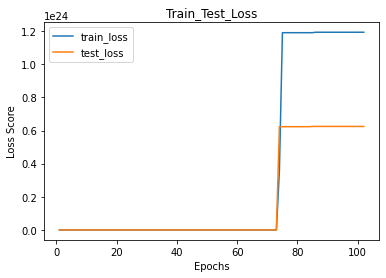

103
Train Epoch: 103 [0/7471 (0%)]	Loss: 18687006343168.000000
Train Epoch: 103 [160/7471 (2%)]	Loss: 69761287323648.000000
Train Epoch: 103 [320/7471 (4%)]	Loss: 16696005885952.000000
Train Epoch: 103 [480/7471 (6%)]	Loss: 123733247242265218252800.000000
Train Epoch: 103 [640/7471 (9%)]	Loss: 24483888889856.000000
Train Epoch: 103 [800/7471 (11%)]	Loss: 1331233292288.000000
Train Epoch: 103 [960/7471 (13%)]	Loss: 9501728216780282211074048.000000
Train Epoch: 103 [1120/7471 (15%)]	Loss: 16083006259200.000000
Train Epoch: 103 [1280/7471 (17%)]	Loss: 354362786316288.000000
Train Epoch: 103 [1440/7471 (19%)]	Loss: 12513984905216.000000
Train Epoch: 103 [1600/7471 (21%)]	Loss: 9894223675392.000000
Train Epoch: 103 [1760/7471 (24%)]	Loss: 65322933551104.000000
Train Epoch: 103 [1920/7471 (26%)]	Loss: 6771220406402711457628160.000000
Train Epoch: 103 [2080/7471 (28%)]	Loss: 10305349669597145062178816.000000
Train Epoch: 103 [2240/7471 (30%)]	Loss: 15511679139840.000000
Train Epoch: 103 [2400

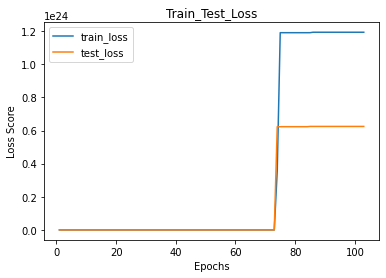

104
Train Epoch: 104 [0/7471 (0%)]	Loss: 13003873320960.000000
Train Epoch: 104 [160/7471 (2%)]	Loss: 13290817191936.000000
Train Epoch: 104 [320/7471 (4%)]	Loss: 69706702651392.000000
Train Epoch: 104 [480/7471 (6%)]	Loss: 2665925836800.000000
Train Epoch: 104 [640/7471 (9%)]	Loss: 15860422934528.000000
Train Epoch: 104 [800/7471 (11%)]	Loss: 1023597650916750609350656.000000
Train Epoch: 104 [960/7471 (13%)]	Loss: 115044918493184.000000
Train Epoch: 104 [1120/7471 (15%)]	Loss: 559305338126336.000000
Train Epoch: 104 [1280/7471 (17%)]	Loss: 7956616708096.000000
Train Epoch: 104 [1440/7471 (19%)]	Loss: 59603849052160.000000
Train Epoch: 104 [1600/7471 (21%)]	Loss: 95550288429056.000000
Train Epoch: 104 [1760/7471 (24%)]	Loss: 168511229919232.000000
Train Epoch: 104 [1920/7471 (26%)]	Loss: 1686783262720.000000
Train Epoch: 104 [2080/7471 (28%)]	Loss: 9739684544512.000000
Train Epoch: 104 [2240/7471 (30%)]	Loss: 1668724948992.000000
Train Epoch: 104 [2400/7471 (32%)]	Loss: 34706668126208.

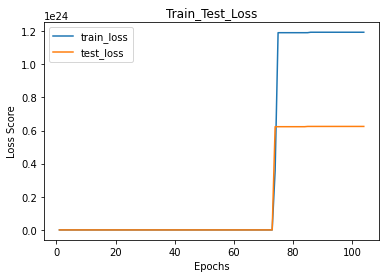

105
Train Epoch: 105 [0/7471 (0%)]	Loss: 99067656929280.000000
Train Epoch: 105 [160/7471 (2%)]	Loss: 45128030879744.000000
Train Epoch: 105 [320/7471 (4%)]	Loss: 96246861660160.000000
Train Epoch: 105 [480/7471 (6%)]	Loss: 41012743372800.000000
Train Epoch: 105 [640/7471 (9%)]	Loss: 6051978543104.000000
Train Epoch: 105 [800/7471 (11%)]	Loss: 521842655232.000000
Train Epoch: 105 [960/7471 (13%)]	Loss: 48049443307520.000000
Train Epoch: 105 [1120/7471 (15%)]	Loss: 895317245952.000000
Train Epoch: 105 [1280/7471 (17%)]	Loss: 65916188491776.000000
Train Epoch: 105 [1440/7471 (19%)]	Loss: 288664483528704.000000
Train Epoch: 105 [1600/7471 (21%)]	Loss: 135878630440960.000000
Train Epoch: 105 [1760/7471 (24%)]	Loss: 109265452793856.000000
Train Epoch: 105 [1920/7471 (26%)]	Loss: 16410536388329472.000000
Train Epoch: 105 [2080/7471 (28%)]	Loss: 26010552631296.000000
Train Epoch: 105 [2240/7471 (30%)]	Loss: 1426832883901717832269824.000000
Train Epoch: 105 [2400/7471 (32%)]	Loss: 139318871982

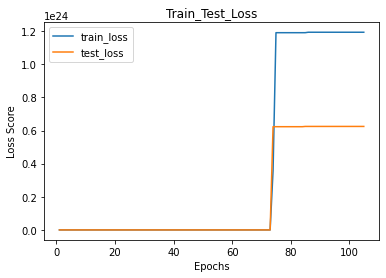

106
Train Epoch: 106 [0/7471 (0%)]	Loss: 107424287555584.000000
Train Epoch: 106 [160/7471 (2%)]	Loss: 65562642266922655154176.000000
Train Epoch: 106 [320/7471 (4%)]	Loss: 133688364892160.000000
Train Epoch: 106 [480/7471 (6%)]	Loss: 11838241636352.000000
Train Epoch: 106 [640/7471 (9%)]	Loss: 3343566766080.000000
Train Epoch: 106 [800/7471 (11%)]	Loss: 30634361749504.000000
Train Epoch: 106 [960/7471 (13%)]	Loss: 242342590152704.000000
Train Epoch: 106 [1120/7471 (15%)]	Loss: 16798535143915520.000000
Train Epoch: 106 [1280/7471 (17%)]	Loss: 54065186734080.000000
Train Epoch: 106 [1440/7471 (19%)]	Loss: 1947776188416.000000
Train Epoch: 106 [1600/7471 (21%)]	Loss: 42359458889728.000000
Train Epoch: 106 [1760/7471 (24%)]	Loss: 121202764683638283960320.000000
Train Epoch: 106 [1920/7471 (26%)]	Loss: 98671446196224.000000
Train Epoch: 106 [2080/7471 (28%)]	Loss: 57808640802816.000000
Train Epoch: 106 [2240/7471 (30%)]	Loss: 2896745201664.000000
Train Epoch: 106 [2400/7471 (32%)]	Loss: 17

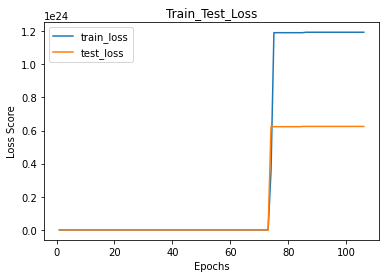

107
Train Epoch: 107 [0/7471 (0%)]	Loss: 235086610432.000000
Train Epoch: 107 [160/7471 (2%)]	Loss: 14046654889984.000000
Train Epoch: 107 [320/7471 (4%)]	Loss: 12342866739200.000000
Train Epoch: 107 [480/7471 (6%)]	Loss: 56921021218816.000000
Train Epoch: 107 [640/7471 (9%)]	Loss: 43215071739904.000000
Train Epoch: 107 [800/7471 (11%)]	Loss: 72655763931136.000000
Train Epoch: 107 [960/7471 (13%)]	Loss: 182201438175232.000000
Train Epoch: 107 [1120/7471 (15%)]	Loss: 36649358589952.000000
Train Epoch: 107 [1280/7471 (17%)]	Loss: 1455561113600.000000
Train Epoch: 107 [1440/7471 (19%)]	Loss: 9596937627552220241199104.000000
Train Epoch: 107 [1600/7471 (21%)]	Loss: 41874974834688.000000
Train Epoch: 107 [1760/7471 (24%)]	Loss: 13452207718400.000000
Train Epoch: 107 [1920/7471 (26%)]	Loss: 101671707344896.000000
Train Epoch: 107 [2080/7471 (28%)]	Loss: 33303482597376.000000
Train Epoch: 107 [2240/7471 (30%)]	Loss: 24268498796544.000000
Train Epoch: 107 [2400/7471 (32%)]	Loss: 22248818635642

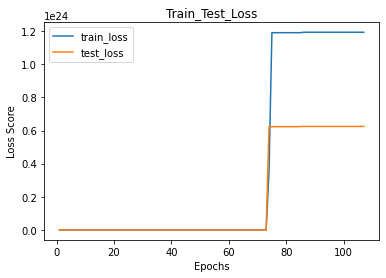

108
Train Epoch: 108 [0/7471 (0%)]	Loss: 9501728216780282211074048.000000
Train Epoch: 108 [160/7471 (2%)]	Loss: 26168625463296.000000
Train Epoch: 108 [320/7471 (4%)]	Loss: 4131986079744.000000
Train Epoch: 108 [480/7471 (6%)]	Loss: 91207120191488.000000
Train Epoch: 108 [640/7471 (9%)]	Loss: 1509929254912.000000
Train Epoch: 108 [800/7471 (11%)]	Loss: 67332793696256.000000
Train Epoch: 108 [960/7471 (13%)]	Loss: 85721809420288.000000
Train Epoch: 108 [1120/7471 (15%)]	Loss: 15585312243712.000000
Train Epoch: 108 [1280/7471 (17%)]	Loss: 10145595101311297310949376.000000
Train Epoch: 108 [1440/7471 (19%)]	Loss: 1013252486255913371435008.000000
Train Epoch: 108 [1600/7471 (21%)]	Loss: 10111834100891895010951168.000000
Train Epoch: 108 [1760/7471 (24%)]	Loss: 267536351232.000000
Train Epoch: 108 [1920/7471 (26%)]	Loss: 1751395467264.000000
Train Epoch: 108 [2080/7471 (28%)]	Loss: 49929556852736.000000
Train Epoch: 108 [2240/7471 (30%)]	Loss: 12708422352896.000000
Train Epoch: 108 [2400/7

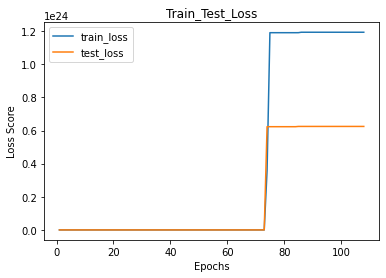

109
Train Epoch: 109 [0/7471 (0%)]	Loss: 59909798363136.000000
Train Epoch: 109 [160/7471 (2%)]	Loss: 8945983815680.000000
Train Epoch: 109 [320/7471 (4%)]	Loss: 22870163980288.000000
Train Epoch: 109 [480/7471 (6%)]	Loss: 538046234624.000000
Train Epoch: 109 [640/7471 (9%)]	Loss: 62811640168448.000000
Train Epoch: 109 [800/7471 (11%)]	Loss: 15112043757568.000000
Train Epoch: 109 [960/7471 (13%)]	Loss: 1002281501390856729395200.000000
Train Epoch: 109 [1120/7471 (15%)]	Loss: 105595319353344.000000
Train Epoch: 109 [1280/7471 (17%)]	Loss: 18913526022144.000000
Train Epoch: 109 [1440/7471 (19%)]	Loss: 680024735744.000000
Train Epoch: 109 [1600/7471 (21%)]	Loss: 121686127024444704555008.000000
Train Epoch: 109 [1760/7471 (24%)]	Loss: 2053523832087476277608448.000000
Train Epoch: 109 [1920/7471 (26%)]	Loss: 3846993346560.000000
Train Epoch: 109 [2080/7471 (28%)]	Loss: 2041318473728.000000
Train Epoch: 109 [2240/7471 (30%)]	Loss: 117034268491776.000000
Train Epoch: 109 [2400/7471 (32%)]	Los

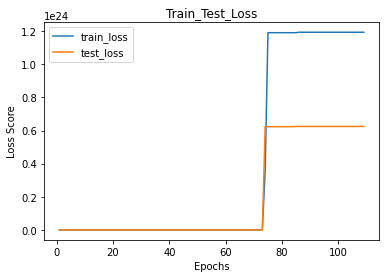

110
Train Epoch: 110 [0/7471 (0%)]	Loss: 105996630360064.000000
Train Epoch: 110 [160/7471 (2%)]	Loss: 2411841716224.000000
Train Epoch: 110 [320/7471 (4%)]	Loss: 1010216483646313353707520.000000
Train Epoch: 110 [480/7471 (6%)]	Loss: 26348363972608.000000
Train Epoch: 110 [640/7471 (9%)]	Loss: 121659816995421606117376.000000
Train Epoch: 110 [800/7471 (11%)]	Loss: 5703547070767999353880576.000000
Train Epoch: 110 [960/7471 (13%)]	Loss: 50161350868992.000000
Train Epoch: 110 [1120/7471 (15%)]	Loss: 53314414706688.000000
Train Epoch: 110 [1280/7471 (17%)]	Loss: 123514298368.000000
Train Epoch: 110 [1440/7471 (19%)]	Loss: 90641140809728.000000
Train Epoch: 110 [1600/7471 (21%)]	Loss: 873831202816.000000
Train Epoch: 110 [1760/7471 (24%)]	Loss: 49911978524672.000000
Train Epoch: 110 [1920/7471 (26%)]	Loss: 4709282742272.000000
Train Epoch: 110 [2080/7471 (28%)]	Loss: 144078405975932928.000000
Train Epoch: 110 [2240/7471 (30%)]	Loss: 559503441920.000000
Train Epoch: 110 [2400/7471 (32%)]	L

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


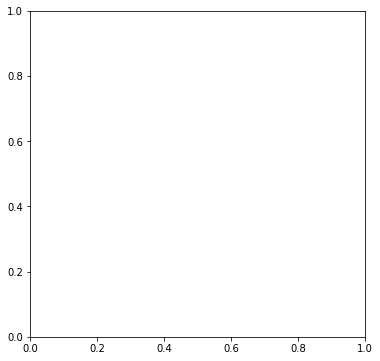

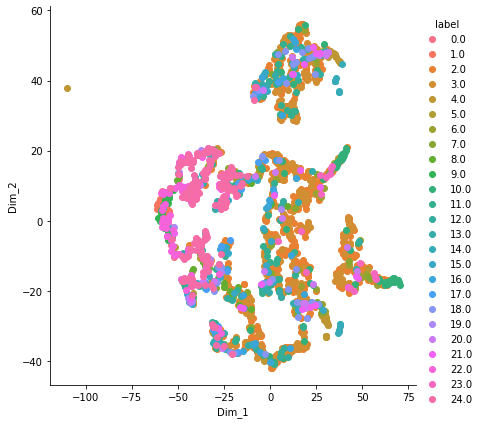

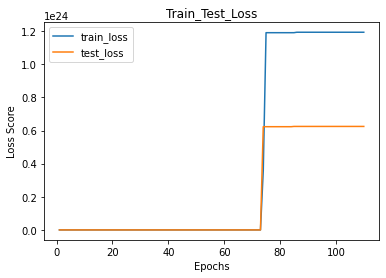

111
Train Epoch: 111 [0/7471 (0%)]	Loss: 4139944247296.000000
Train Epoch: 111 [160/7471 (2%)]	Loss: 9555606544533569383956480.000000
Train Epoch: 111 [320/7471 (4%)]	Loss: 97595758215168.000000
Train Epoch: 111 [480/7471 (6%)]	Loss: 40969760145408.000000
Train Epoch: 111 [640/7471 (9%)]	Loss: 9721631276422221472464896.000000
Train Epoch: 111 [800/7471 (11%)]	Loss: 200905500655616.000000
Train Epoch: 111 [960/7471 (13%)]	Loss: 75424826654720.000000
Train Epoch: 111 [1120/7471 (15%)]	Loss: 225318312869888.000000
Train Epoch: 111 [1280/7471 (17%)]	Loss: 269452066816.000000
Train Epoch: 111 [1440/7471 (19%)]	Loss: 9980628434944.000000
Train Epoch: 111 [1600/7471 (21%)]	Loss: 590243037184.000000
Train Epoch: 111 [1760/7471 (24%)]	Loss: 1173728657408.000000
Train Epoch: 111 [1920/7471 (26%)]	Loss: 10055368835072.000000
Train Epoch: 111 [2080/7471 (28%)]	Loss: 16800113544396800.000000
Train Epoch: 111 [2240/7471 (30%)]	Loss: 866957524992.000000
Train Epoch: 111 [2400/7471 (32%)]	Loss: 140029

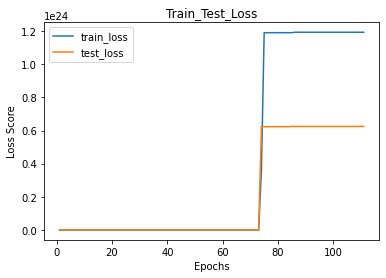

112
Train Epoch: 112 [0/7471 (0%)]	Loss: 142328020992.000000
Train Epoch: 112 [160/7471 (2%)]	Loss: 3060105478144.000000
Train Epoch: 112 [320/7471 (4%)]	Loss: 192947798671360.000000
Train Epoch: 112 [480/7471 (6%)]	Loss: 1888081902019402950246400.000000
Train Epoch: 112 [640/7471 (9%)]	Loss: 3346949734400.000000
Train Epoch: 112 [800/7471 (11%)]	Loss: 15738744078336.000000
Train Epoch: 112 [960/7471 (13%)]	Loss: 113971306496.000000
Train Epoch: 112 [1120/7471 (15%)]	Loss: 67359557550080.000000
Train Epoch: 112 [1280/7471 (17%)]	Loss: 159023848488960.000000
Train Epoch: 112 [1440/7471 (19%)]	Loss: 14141381148672.000000
Train Epoch: 112 [1600/7471 (21%)]	Loss: 101193246310400.000000
Train Epoch: 112 [1760/7471 (24%)]	Loss: 144170404175413248.000000
Train Epoch: 112 [1920/7471 (26%)]	Loss: 7142033063936.000000
Train Epoch: 112 [2080/7471 (28%)]	Loss: 339991461888.000000
Train Epoch: 112 [2240/7471 (30%)]	Loss: 22895742943232.000000
Train Epoch: 112 [2400/7471 (32%)]	Loss: 12411070316544.

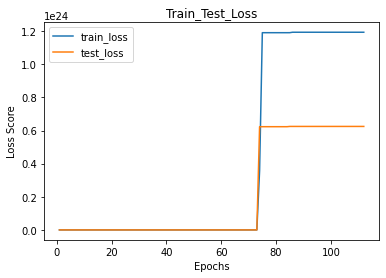

113
Train Epoch: 113 [0/7471 (0%)]	Loss: 878649332938628214554624.000000
Train Epoch: 113 [160/7471 (2%)]	Loss: 59998176542720.000000
Train Epoch: 113 [320/7471 (4%)]	Loss: 1024847850173308659040256.000000
Train Epoch: 113 [480/7471 (6%)]	Loss: 9596937627552220241199104.000000
Train Epoch: 113 [640/7471 (9%)]	Loss: 199944650752.000000
Train Epoch: 113 [800/7471 (11%)]	Loss: 96165047566336.000000
Train Epoch: 113 [960/7471 (13%)]	Loss: 108630149955584.000000
Train Epoch: 113 [1120/7471 (15%)]	Loss: 11345807140194107936210944.000000
Train Epoch: 113 [1280/7471 (17%)]	Loss: 3412695973888.000000
Train Epoch: 113 [1440/7471 (19%)]	Loss: 777146269696.000000
Train Epoch: 113 [1600/7471 (21%)]	Loss: 1918640230614195505201152.000000
Train Epoch: 113 [1760/7471 (24%)]	Loss: 11518488264389607655735296.000000
Train Epoch: 113 [1920/7471 (26%)]	Loss: 8351654608896.000000
Train Epoch: 113 [2080/7471 (28%)]	Loss: 9603390529213504763723776.000000
Train Epoch: 113 [2240/7471 (30%)]	Loss: 1298514837504.

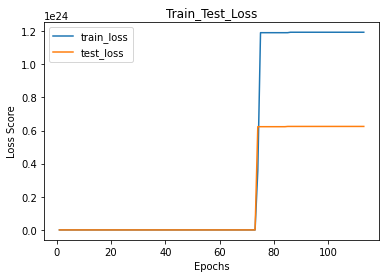

114
Train Epoch: 114 [0/7471 (0%)]	Loss: 56147981631488.000000
Train Epoch: 114 [160/7471 (2%)]	Loss: 1010216483646313353707520.000000
Train Epoch: 114 [320/7471 (4%)]	Loss: 224768425984.000000
Train Epoch: 114 [480/7471 (6%)]	Loss: 4462896218112.000000
Train Epoch: 114 [640/7471 (9%)]	Loss: 12456930836480.000000
Train Epoch: 114 [800/7471 (11%)]	Loss: 6045700718592.000000
Train Epoch: 114 [960/7471 (13%)]	Loss: 61247672320.000000
Train Epoch: 114 [1120/7471 (15%)]	Loss: 9806092000006709868232704.000000
Train Epoch: 114 [1280/7471 (17%)]	Loss: 77589602304.000000
Train Epoch: 114 [1440/7471 (19%)]	Loss: 9297885921280.000000
Train Epoch: 114 [1600/7471 (21%)]	Loss: 705796767744.000000
Train Epoch: 114 [1760/7471 (24%)]	Loss: 77318252920832.000000
Train Epoch: 114 [1920/7471 (26%)]	Loss: 850751717376.000000
Train Epoch: 114 [2080/7471 (28%)]	Loss: 34119194624.000000
Train Epoch: 114 [2240/7471 (30%)]	Loss: 23929867468800.000000
Train Epoch: 114 [2400/7471 (32%)]	Loss: 96222106877952.00000

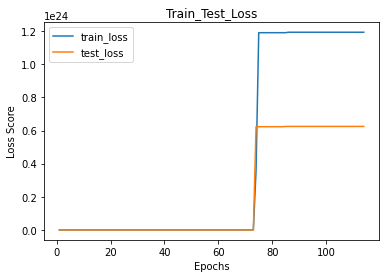

115
Train Epoch: 115 [0/7471 (0%)]	Loss: 31722638934016.000000
Train Epoch: 115 [160/7471 (2%)]	Loss: 3149783629824.000000
Train Epoch: 115 [320/7471 (4%)]	Loss: 1523952397376413256122368.000000
Train Epoch: 115 [480/7471 (6%)]	Loss: 10545191190528.000000
Train Epoch: 115 [640/7471 (9%)]	Loss: 9825111746068209022795776.000000
Train Epoch: 115 [800/7471 (11%)]	Loss: 53541234278400.000000
Train Epoch: 115 [960/7471 (13%)]	Loss: 121659339613861104844800.000000
Train Epoch: 115 [1120/7471 (15%)]	Loss: 352400637952.000000
Train Epoch: 115 [1280/7471 (17%)]	Loss: 123732022263166573477888.000000
Train Epoch: 115 [1440/7471 (19%)]	Loss: 12269872218112.000000
Train Epoch: 115 [1600/7471 (21%)]	Loss: 150793030205440.000000
Train Epoch: 115 [1760/7471 (24%)]	Loss: 7064998379520.000000
Train Epoch: 115 [1920/7471 (26%)]	Loss: 67148021760.000000
Train Epoch: 115 [2080/7471 (28%)]	Loss: 2209214627840.000000
Train Epoch: 115 [2240/7471 (30%)]	Loss: 1888081902019402950246400.000000
Train Epoch: 115 [2

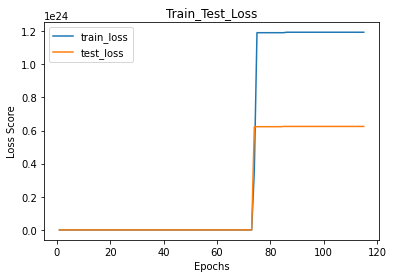

116
Train Epoch: 116 [0/7471 (0%)]	Loss: 21438954209280.000000
Train Epoch: 116 [160/7471 (2%)]	Loss: 14745847463936.000000
Train Epoch: 116 [320/7471 (4%)]	Loss: 2943526109184.000000
Train Epoch: 116 [480/7471 (6%)]	Loss: 150909866737664.000000
Train Epoch: 116 [640/7471 (9%)]	Loss: 83208020426752.000000
Train Epoch: 116 [800/7471 (11%)]	Loss: 1015980658823783361019904.000000
Train Epoch: 116 [960/7471 (13%)]	Loss: 16612316099379200.000000
Train Epoch: 116 [1120/7471 (15%)]	Loss: 97057670955008.000000
Train Epoch: 116 [1280/7471 (17%)]	Loss: 3844434034688.000000
Train Epoch: 116 [1440/7471 (19%)]	Loss: 84997980160.000000
Train Epoch: 116 [1600/7471 (21%)]	Loss: 13173631483904.000000
Train Epoch: 116 [1760/7471 (24%)]	Loss: 263888945152.000000
Train Epoch: 116 [1920/7471 (26%)]	Loss: 10145595101311297310949376.000000
Train Epoch: 116 [2080/7471 (28%)]	Loss: 22882992332623924829356032.000000
Train Epoch: 116 [2240/7471 (30%)]	Loss: 12106562797568.000000
Train Epoch: 116 [2400/7471 (32%)

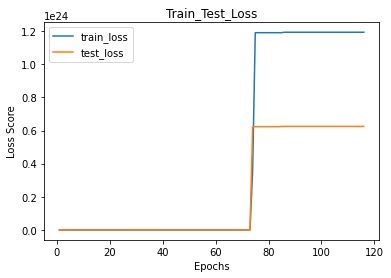

117
Train Epoch: 117 [0/7471 (0%)]	Loss: 26779502772224.000000
Train Epoch: 117 [160/7471 (2%)]	Loss: 11206507705242994864029696.000000
Train Epoch: 117 [320/7471 (4%)]	Loss: 8888618319872.000000
Train Epoch: 117 [480/7471 (6%)]	Loss: 10111834100891895010951168.000000
Train Epoch: 117 [640/7471 (9%)]	Loss: 11245717553152.000000
Train Epoch: 117 [800/7471 (11%)]	Loss: 17405075456.000000
Train Epoch: 117 [960/7471 (13%)]	Loss: 703257247744.000000
Train Epoch: 117 [1120/7471 (15%)]	Loss: 913492710478074230079488.000000
Train Epoch: 117 [1280/7471 (17%)]	Loss: 5703547070767999353880576.000000
Train Epoch: 117 [1440/7471 (19%)]	Loss: 101150028201984.000000
Train Epoch: 117 [1600/7471 (21%)]	Loss: 110149620465664.000000
Train Epoch: 117 [1760/7471 (24%)]	Loss: 97716352843776.000000
Train Epoch: 117 [1920/7471 (26%)]	Loss: 106346988961792.000000
Train Epoch: 117 [2080/7471 (28%)]	Loss: 1285265686528.000000
Train Epoch: 117 [2240/7471 (30%)]	Loss: 64402448384.000000
Train Epoch: 117 [2400/7471

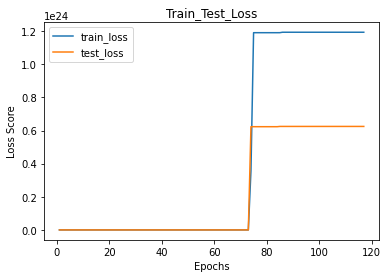

118
Train Epoch: 118 [0/7471 (0%)]	Loss: 56478652170240.000000
Train Epoch: 118 [160/7471 (2%)]	Loss: 47185508958208.000000
Train Epoch: 118 [320/7471 (4%)]	Loss: 18022563577856.000000
Train Epoch: 118 [480/7471 (6%)]	Loss: 14285347487744.000000
Train Epoch: 118 [640/7471 (9%)]	Loss: 136656866770944.000000
Train Epoch: 118 [800/7471 (11%)]	Loss: 4859740291072.000000
Train Epoch: 118 [960/7471 (13%)]	Loss: 18221705216.000000
Train Epoch: 118 [1120/7471 (15%)]	Loss: 1110325854208.000000
Train Epoch: 118 [1280/7471 (17%)]	Loss: 37286502727680.000000
Train Epoch: 118 [1440/7471 (19%)]	Loss: 22874790449040151719968768.000000
Train Epoch: 118 [1600/7471 (21%)]	Loss: 38129142595584.000000
Train Epoch: 118 [1760/7471 (24%)]	Loss: 49486445412352.000000
Train Epoch: 118 [1920/7471 (26%)]	Loss: 984807964672.000000
Train Epoch: 118 [2080/7471 (28%)]	Loss: 26262231842816.000000
Train Epoch: 118 [2240/7471 (30%)]	Loss: 153644250955776.000000
Train Epoch: 118 [2400/7471 (32%)]	Loss: 110346240000.0000

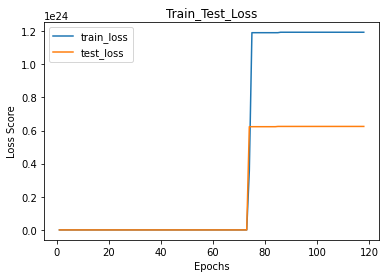

119
Train Epoch: 119 [0/7471 (0%)]	Loss: 152344754913280.000000
Train Epoch: 119 [160/7471 (2%)]	Loss: 24030872600576.000000
Train Epoch: 119 [320/7471 (4%)]	Loss: 140226166784.000000
Train Epoch: 119 [480/7471 (6%)]	Loss: 549313937408.000000
Train Epoch: 119 [640/7471 (9%)]	Loss: 163881877504.000000
Train Epoch: 119 [800/7471 (11%)]	Loss: 56543898763264.000000
Train Epoch: 119 [960/7471 (13%)]	Loss: 189377003520.000000
Train Epoch: 119 [1120/7471 (15%)]	Loss: 7658873028608.000000
Train Epoch: 119 [1280/7471 (17%)]	Loss: 49314426880.000000
Train Epoch: 119 [1440/7471 (19%)]	Loss: 331065196544.000000
Train Epoch: 119 [1600/7471 (21%)]	Loss: 163795154501632.000000
Train Epoch: 119 [1760/7471 (24%)]	Loss: 39561161867264.000000
Train Epoch: 119 [1920/7471 (26%)]	Loss: 39262489673728.000000
Train Epoch: 119 [2080/7471 (28%)]	Loss: 18784393216.000000
Train Epoch: 119 [2240/7471 (30%)]	Loss: 305350867681280.000000
Train Epoch: 119 [2400/7471 (32%)]	Loss: 459893833728.000000
Train Epoch: 119 [

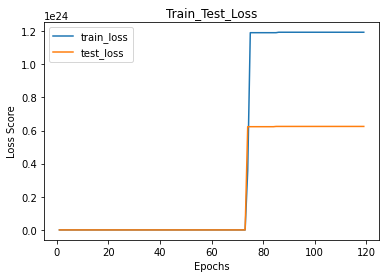

120
Train Epoch: 120 [0/7471 (0%)]	Loss: 693355937792.000000
Train Epoch: 120 [160/7471 (2%)]	Loss: 743733723136.000000
Train Epoch: 120 [320/7471 (4%)]	Loss: 16561359533637632.000000
Train Epoch: 120 [480/7471 (6%)]	Loss: 31288081776640.000000
Train Epoch: 120 [640/7471 (9%)]	Loss: 6093689847808.000000
Train Epoch: 120 [800/7471 (11%)]	Loss: 146955091050496.000000
Train Epoch: 120 [960/7471 (13%)]	Loss: 786785632256.000000
Train Epoch: 120 [1120/7471 (15%)]	Loss: 1886977259102801514987520.000000
Train Epoch: 120 [1280/7471 (17%)]	Loss: 103030410182656.000000
Train Epoch: 120 [1440/7471 (19%)]	Loss: 2147578019840.000000
Train Epoch: 120 [1600/7471 (21%)]	Loss: 1712382429324842505338880.000000
Train Epoch: 120 [1760/7471 (24%)]	Loss: 1405631725568.000000
Train Epoch: 120 [1920/7471 (26%)]	Loss: 51185918672896.000000
Train Epoch: 120 [2080/7471 (28%)]	Loss: 1819451850752.000000
Train Epoch: 120 [2240/7471 (30%)]	Loss: 8955747328.000000
Train Epoch: 120 [2400/7471 (32%)]	Loss: 93398884352

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


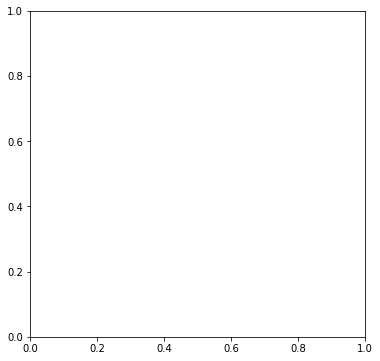

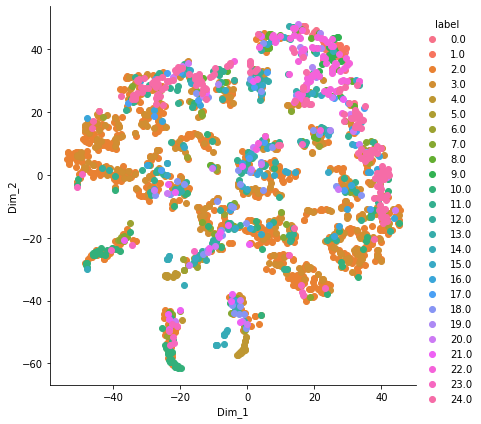

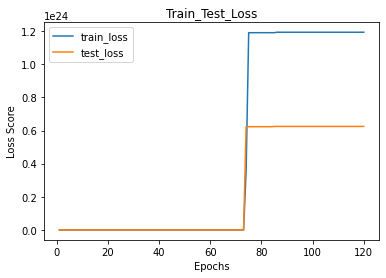

121
Train Epoch: 121 [0/7471 (0%)]	Loss: 219771142144.000000
Train Epoch: 121 [160/7471 (2%)]	Loss: 5630463574016.000000
Train Epoch: 121 [320/7471 (4%)]	Loss: 5422317568000.000000
Train Epoch: 121 [480/7471 (6%)]	Loss: 395546198016.000000
Train Epoch: 121 [640/7471 (9%)]	Loss: 49094815744.000000
Train Epoch: 121 [800/7471 (11%)]	Loss: 37714082660352.000000
Train Epoch: 121 [960/7471 (13%)]	Loss: 1918640230614195505201152.000000
Train Epoch: 121 [1120/7471 (15%)]	Loss: 73122841624576.000000
Train Epoch: 121 [1280/7471 (17%)]	Loss: 65832688287744.000000
Train Epoch: 121 [1440/7471 (19%)]	Loss: 7638817964032.000000
Train Epoch: 121 [1600/7471 (21%)]	Loss: 173165397409792.000000
Train Epoch: 121 [1760/7471 (24%)]	Loss: 50536409726976.000000
Train Epoch: 121 [1920/7471 (26%)]	Loss: 12301867417600.000000
Train Epoch: 121 [2080/7471 (28%)]	Loss: 16688195286597632.000000
Train Epoch: 121 [2240/7471 (30%)]	Loss: 10800671490048.000000
Train Epoch: 121 [2400/7471 (32%)]	Loss: 6965656289280.00000

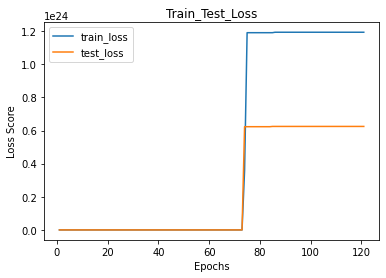

122
Train Epoch: 122 [0/7471 (0%)]	Loss: 1886977259102801514987520.000000
Train Epoch: 122 [160/7471 (2%)]	Loss: 384828538880.000000
Train Epoch: 122 [320/7471 (4%)]	Loss: 116715149066240.000000
Train Epoch: 122 [480/7471 (6%)]	Loss: 315451998208.000000
Train Epoch: 122 [640/7471 (9%)]	Loss: 622963392512.000000
Train Epoch: 122 [800/7471 (11%)]	Loss: 51902465179648.000000
Train Epoch: 122 [960/7471 (13%)]	Loss: 208811159715840.000000
Train Epoch: 122 [1120/7471 (15%)]	Loss: 4843649368064.000000
Train Epoch: 122 [1280/7471 (17%)]	Loss: 223710920704.000000
Train Epoch: 122 [1440/7471 (19%)]	Loss: 648547729408.000000
Train Epoch: 122 [1600/7471 (21%)]	Loss: 303202140160.000000
Train Epoch: 122 [1760/7471 (24%)]	Loss: 33715147243520.000000
Train Epoch: 122 [1920/7471 (26%)]	Loss: 70777655263232.000000
Train Epoch: 122 [2080/7471 (28%)]	Loss: 11212067700736.000000
Train Epoch: 122 [2240/7471 (30%)]	Loss: 5681462116352.000000
Train Epoch: 122 [2400/7471 (32%)]	Loss: 1732887969792.000000
Trai

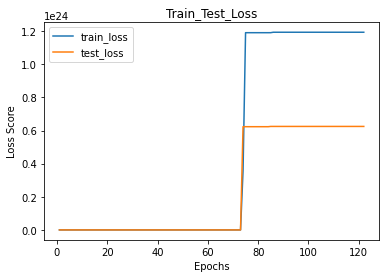

123
Train Epoch: 123 [0/7471 (0%)]	Loss: 75768416015693148848128.000000
Train Epoch: 123 [160/7471 (2%)]	Loss: 143275377819648.000000
Train Epoch: 123 [320/7471 (4%)]	Loss: 52728495603712.000000
Train Epoch: 123 [480/7471 (6%)]	Loss: 23174859194368.000000
Train Epoch: 123 [640/7471 (9%)]	Loss: 121683280749480206401536.000000
Train Epoch: 123 [800/7471 (11%)]	Loss: 204374794043392.000000
Train Epoch: 123 [960/7471 (13%)]	Loss: 5345036992512.000000
Train Epoch: 123 [1120/7471 (15%)]	Loss: 21753814319104.000000
Train Epoch: 123 [1280/7471 (17%)]	Loss: 6336353927168.000000
Train Epoch: 123 [1440/7471 (19%)]	Loss: 13815308615680.000000
Train Epoch: 123 [1600/7471 (21%)]	Loss: 90495164416.000000
Train Epoch: 123 [1760/7471 (24%)]	Loss: 90945722777600.000000
Train Epoch: 123 [1920/7471 (26%)]	Loss: 2197864316928.000000
Train Epoch: 123 [2080/7471 (28%)]	Loss: 27966660673536.000000
Train Epoch: 123 [2240/7471 (30%)]	Loss: 4535200251904.000000
Train Epoch: 123 [2400/7471 (32%)]	Loss: 1097643130

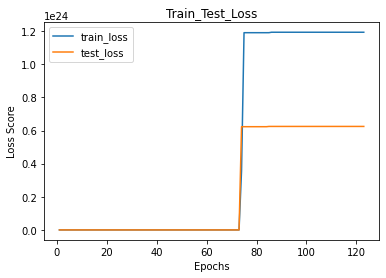

124
Train Epoch: 124 [0/7471 (0%)]	Loss: 17700126457856.000000
Train Epoch: 124 [160/7471 (2%)]	Loss: 164844535808000.000000
Train Epoch: 124 [320/7471 (4%)]	Loss: 2046842634240.000000
Train Epoch: 124 [480/7471 (6%)]	Loss: 15732469399552.000000
Train Epoch: 124 [640/7471 (9%)]	Loss: 165418844160.000000
Train Epoch: 124 [800/7471 (11%)]	Loss: 285093789696.000000
Train Epoch: 124 [960/7471 (13%)]	Loss: 1268307853312.000000
Train Epoch: 124 [1120/7471 (15%)]	Loss: 1959734676494025807101952.000000
Train Epoch: 124 [1280/7471 (17%)]	Loss: 81121253523456.000000
Train Epoch: 124 [1440/7471 (19%)]	Loss: 2061356236800.000000
Train Epoch: 124 [1600/7471 (21%)]	Loss: 69667003564032.000000
Train Epoch: 124 [1760/7471 (24%)]	Loss: 1262066728960.000000
Train Epoch: 124 [1920/7471 (26%)]	Loss: 10374051109135162466631680.000000
Train Epoch: 124 [2080/7471 (28%)]	Loss: 90104760738298667728896.000000
Train Epoch: 124 [2240/7471 (30%)]	Loss: 1009251488346957422788608.000000
Train Epoch: 124 [2400/7471 (

KeyboardInterrupt: ignored

In [23]:
epochs = 200

for epoch in range(1, epochs + 1):
        print(epoch)
        train(epoch)
        test(epoch)
        # https://stackoverflow.com/questions/40766909/suggestions-to-plot-overlapping-lines-in-matplotlib
        plt.plot(Epoch_Loss['train_epoch'],Epoch_Loss['train_loss'], label="train_loss", alpha=0.7)
        plt.plot(Epoch_Loss['test_epoch'],Epoch_Loss['test_loss'], label="test_loss", alpha=0.5)
        plt.xlabel('Epochs')
        plt.ylabel('Loss Score')
        plt.title('Train_Test_Loss')
        plt.legend()
        plt.savefig('./Exp04_results/plot_train_test_loss/'+str(epoch)+'_epoch.png', dpi=300)
        plt.show()

        with torch.no_grad():
            sample = torch.randn(64, 100).to(device)
            sample = model.decode(sample).cpu()
            save_image(sample.view(64, 1, 224, 224),
                       './Exp04_results/recon_sampling/sampling_' + str(epoch) + '.png')

### Training 일지


1. 생각보다 한 Epoch도는데 시간이 오래걸린다...하하

* Training이 중간에 꺼지는 것을 방지하기위해... 15분 단위로 text를 하나씩 작성해야 하나...
* 좋은 결과가 있었으면 좋겠다... 우주의 기운아...!!
* 1Epoch 이후로는 속사포다!
* 돌고돈다 조금 긴장되는 순간 조큼!
* Epoch 1에서 계속해서 작업이 진행중이다.
    * pros: training 하느라 고생이 많군!
    * cons: 흠... 긴장된다... error 아냐??
* Error가 발생하더라도 다시 간다!
* 아직까지도 1 Epoch이 돌지 않았다는건 뭔가 잘못됬다는 증거...?!

오... 1 Epoch을 도는데 30분정도 걸린거 같은데 다행히 Error는 없었다!
* 5Epoch까지 순항중

--- 
가즈아

10 Epoch만 무사히 넘기면 계속 학습 가능

* 과연 10 Epoch 후 환상의 manifold를 볼 수 있을 것인가

---
2. 환상의 manifold를 뽑아줬다!! 그런데....!reconstruction 결과를 보면 영 아니지 않는가...?!

200 Epoch까지 갔을 때의 결과가 너무 궁금하다<br><br>

*1Epoch당 1분정도의 시간이 소요되는 것 같다*
<br>
* 20 Epoch: 
    * reconstruction 결과가 좋지 않다. 
    * 우선 학습이 진행됨에 따라 경과를 지켜보자 
* 30 Epoch
* 40 Epoch

---
3. linear layer만으로는 학습을 시키는데 한계가 있지 않을까?
* 이번 학습을 마지막으로 200Epoch까지 결과를 보고 추후 연구에 대한 방향을 재설정할 필요가 있다고 생각한다.

1. Linear Layer를 변경한다.
2. CNN Layer를 사용하면 조금 달라질까?

다행인것은 test_loss가 train loss보다 계속해서 작다는 것이다. 정말 다행인지는 잘 모르겠지만!



---
중간중간 결과 해석을 어떻게 해야할지 모르겠다...
그리고 이 실험이 지금 어디로 가는지도...하하

<br>
최종 결과는 학습이 끝난 뒤에 판단하는걸로 하자.<br>
결과가 좋든 나쁘든 간에 Epoch 단위로 결과를 보는 것도 상당히 흥미롭다.